In [1]:
import pandas as pd
#import imblearn
#import seaborn as sns
import BayesLib as bl
#import os

from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, chi2

#from collections import Counter
#from numpy import where
#from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC
#from imblearn.over_sampling import BorderlineSMOTE 
#from imblearn.over_sampling import SVMSMOTE
#from imblearn.over_sampling import ADASYN 
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
from time import time

In [2]:
#abriendo el conjunto de datos desde un archivo CSV y asignandolo los datos al DataFrame "df"
df = pd.read_csv('dataset_a.csv', sep=';', error_bad_lines=False)

In [3]:
%%capture
#Eliminando variables que no aportan al análisis
df = df.drop([
    'rut', 'usuario', 'correo', 'nombre', 'profesor', 
    'i1', 'f1', 's1', 
    'i2', 'f2', 's2',
    'i3', 'f3', 's3', 
    'i4', 'f4', 's4', 
    'i5', 'f5', 's5', 
    'i6', 'f6', 's6',
    'sol1', 'sol2', 'sol3', 'sol4',
    'tarea1', 'tarea2',
    'controles', 'np', 'examen'], axis=1)

In [4]:
#Estadísticas de la variable "programa"
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

#Transformación numérica de la variable "programa"
for i in range(len(serie)):
    df["programa"] = df["programa"].str.replace(serie.index[i], str(i+1))
  
serie = df['programa'].value_counts(normalize=True, ascending=True)*100
print(serie)

df['programa'] = df['programa'].astype('int')

BACHILLERATO EN CIENCIAS                    0.428266
INGENIERIA INDUSTRIAL                       6.638116
INGENIERIA CIVIL INFORMATICA               23.340471
INGENIERIA EN COMPUTACION E INFORMATICA    29.336188
INGENIERIA CIVIL INDUSTRIAL                40.256959
Name: programa, dtype: float64
1     0.428266
2     6.638116
3    23.340471
4    29.336188
5    40.256959
Name: programa, dtype: float64


In [5]:
#Estadísticas de la variable "estado"
serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

#Transformacíon numérica de la variable "estado"
for i in range(len(serie)):
    df["estado"] = df["estado"].str.replace(serie.index[i], str(i))

serie = df['estado'].value_counts(normalize=True, ascending=False)*100
print(serie)

df['estado'] = df['estado'].astype('int')

A    89.507495
R    10.492505
Name: estado, dtype: float64
0    89.507495
1    10.492505
Name: estado, dtype: float64


In [6]:
df = df.loc[:, ['lt', 'tt', 'pt', 'game_score', 
                'op1','op2', 'op3', 'op4', 'op5', 'op6',
                'sv1','sv2','sv3','sv4','sv5','sv6',
                'score', 'score_a', 'score_p', 'score_d', 'score_s',
                'programa', 'final', 'estado']]

In [7]:
binsNotas = 7
binsOtros = 5

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['lt']])
df[['lt']] = valor_discreto

valor_discreto = KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['tt']])
df[['tt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['pt']])
df[['pt']] = valor_discreto

puntaje_juego =  KBinsDiscretizer(n_bins=binsOtros, encode='ordinal', strategy = "kmeans").fit_transform(df[['game_score']])
df[['game_score']] = valor_discreto

nota_final =  KBinsDiscretizer(n_bins=binsNotas, encode='ordinal', strategy = "kmeans").fit_transform(df[['final']])
df[['final']] = valor_discreto

INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  1
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


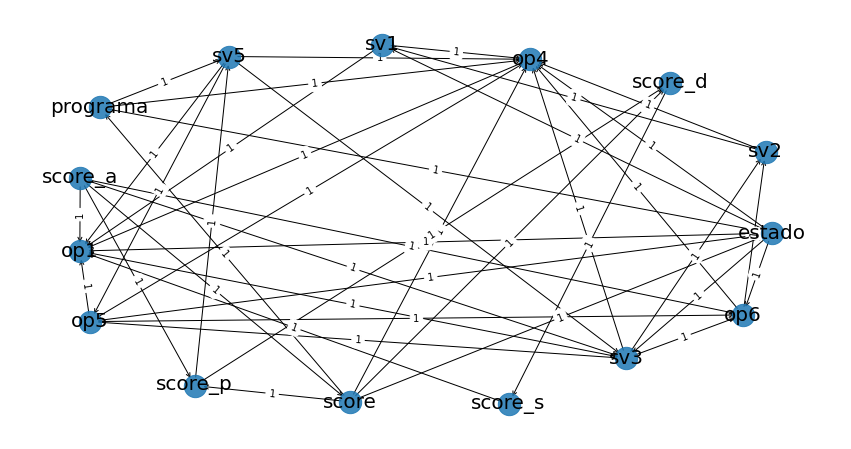

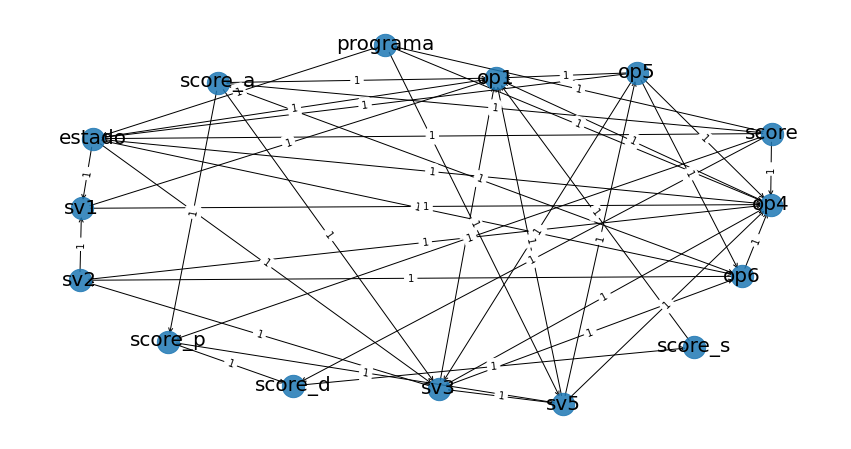

FILA N°: 1 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0151 |
+-----------+---------------+
| estado(1) |        0.9849 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6337 |
+-----------+---------------+
| estado(1) |        0.3663 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1962 |
+-----------+---------------+
| estado(1) |        0.8038 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4488 |
+-----------+---------------+
| estado(1) |        0.5512 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0214 |
+-----------+---------------+
| estado(1) |        0.9786 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4293 |
+-----------+---------------+
| estado(1) |        0.5707 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6401 |
+-----------+---------------+
| estado(1) |        0.3599 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4661 |
+-----------+---------------+
| estado(1) |        0.5339 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0382 |
+-----------+---------------+
| estado(1) |        0.9618 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0422 |
+-----------+---------------+
| estado(1) |        0.9578 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0191 |
+-----------+---------------+
| estado(1) |        0.9809 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0130 |
+-----------+---------------+
| estado(1) |        0.9870 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0092 |
+-----------+---------------+
| estado(1) |        0.9908 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0058 |
+-----------+---------------+
| estado(1) |        0.9942 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0476 |
+-----------+---------------+
| estado(1) |        0.9524 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0369 |
+-----------+---------------+
| estado(1) |        0.9631 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1016 |
+-----------+---------------+
| estado(1) |        0.8984 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4777 |
+-----------+---------------+
| estado(1) |        0.5223 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2655 |
+-----------+---------------+
| estado(1) |        0.7345 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0542 |
+-----------+---------------+
| estado(1) |        0.9458 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0091 |
+-----------+---------------+
| estado(1) |        0.9909 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3349 |
+-----------+---------------+
| estado(1) |        0.6651 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1465 |
+-----------+---------------+
| estado(1) |        0.8535 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3017 |
+-----------+---------------+
| estado(1) |        0.6983 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2137 |
+-----------+---------------+
| estado(1) |        0.7863 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0205 |
+-----------+---------------+
| estado(1) |        0.9795 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1083 |
+-----------+---------------+
| estado(1) |        0.8917 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0233 |
+-----------+---------------+
| estado(1) |        0.9767 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0245 |
+-----------+---------------+
| estado(1) |        0.9755 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3155 |
+-----------+---------------+
| estado(1) |        0.6845 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1754 |
+-----------+---------------+
| estado(1) |        0.8246 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2277 |
+-----------+---------------+
| estado(1) |        0.7723 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1083 |
+-----------+---------------+
| estado(1) |        0.8917 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0060 |
+-----------+---------------+
| estado(1) |        0.9940 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3993 |
+-----------+---------------+
| estado(1) |        0.6007 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0947 |
+-----------+---------------+
| estado(1) |        0.9053 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5221 |
+-----------+---------------+
| estado(1) |        0.4779 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9738 |
+-----------+---------------+
| estado(1) |        0.0262 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6889 |
+-----------+---------------+
| estado(1) |        0.3111 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9756 |
+-----------+---------------+
| estado(1) |        0.0244 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8745 |
+-----------+---------------+
| estado(1) |        0.1255 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9481 |
+-----------+---------------+
| estado(1) |        0.0519 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9898 |
+-----------+---------------+
| estado(1) |        0.0102 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8427 |
+-----------+---------------+
| estado(1) |        0.1573 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9505 |
+-----------+---------------+
| estado(1) |        0.0495 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8523 |
+-----------+---------------+
| estado(1) |        0.1477 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7269 |
+-----------+---------------+
| estado(1) |        0.2731 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4158 |
+-----------+---------------+
| estado(1) |        0.5842 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2867 |
+-----------+---------------+
| estado(1) |        0.7133 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9945 |
+-----------+---------------+
| estado(1) |        0.0055 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9341 |
+-----------+---------------+
| estado(1) |        0.0659 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8412 |
+-----------+---------------+
| estado(1) |        0.1588 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9008 |
+-----------+---------------+
| estado(1) |        0.0992 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8053 |
+-----------+---------------+
| estado(1) |        0.1947 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7121 |
+-----------+---------------+
| estado(1) |        0.2879 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9877 |
+-----------+---------------+
| estado(1) |        0.0123 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8881 |
+-----------+---------------+
| estado(1) |        0.1119 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8662 |
+-----------+---------------+
| estado(1) |        0.1338 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7271 |
+-----------+---------------+
| estado(1) |        0.2729 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5273 |
+-----------+---------------+
| estado(1) |        0.4727 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9063 |
+-----------+---------------+
| estado(1) |        0.0937 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7057 |
+-----------+---------------+
| estado(1) |        0.2943 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8918 |
+-----------+---------------+
| estado(1) |        0.1082 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6546 |
+-----------+---------------+
| estado(1) |        0.3454 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9802 |
+-----------+---------------+
| estado(1) |        0.0198 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9114 |
+-----------+---------------+
| estado(1) |        0.0886 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7944 |
+-----------+---------------+
| estado(1) |        0.2056 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4241 |
+-----------+---------------+
| estado(1) |        0.5759 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8781 |
+-----------+---------------+
| estado(1) |        0.1219 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5482 |
+-----------+---------------+
| estado(1) |        0.4518 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9806 |
+-----------+---------------+
| estado(1) |        0.0194 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5221 |
+-----------+---------------+
| estado(1) |        0.4779 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9801 |
+-----------+---------------+
| estado(1) |        0.0199 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7770 |
+-----------+---------------+
| estado(1) |        0.2230 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9908 |
+-----------+---------------+
| estado(1) |        0.0092 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9289 |
+-----------+---------------+
| estado(1) |        0.0711 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9470 |
+-----------+---------------+
| estado(1) |        0.0530 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7269 |
+-----------+---------------+
| estado(1) |        0.2731 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7957 |
+-----------+---------------+
| estado(1) |        0.2043 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9958 |
+-----------+---------------+
| estado(1) |        0.0042 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9820 |
+-----------+---------------+
| estado(1) |        0.0180 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9289 |
+-----------+---------------+
| estado(1) |        0.0711 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4893 |
+-----------+---------------+
| estado(1) |        0.5107 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5746 |
+-----------+---------------+
| estado(1) |        0.4254 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8580 |
+-----------+---------------+
| estado(1) |        0.1420 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8953 |
+-----------+---------------+
| estado(1) |        0.1047 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8198 |
+-----------+---------------+
| estado(1) |        0.1802 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8186 |
+-----------+---------------+
| estado(1) |        0.1814 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9269 |
+-----------+---------------+
| estado(1) |        0.0731 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8737 |
+-----------+---------------+
| estado(1) |        0.1263 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8098 |
+-----------+---------------+
| estado(1) |        0.1902 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8747 |
+-----------+---------------+
| estado(1) |        0.1253 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9017 |
+-----------+---------------+
| estado(1) |        0.0983 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4104 |
+-----------+---------------+
| estado(1) |        0.5896 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6106 |
+-----------+---------------+
| estado(1) |        0.3894 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9107 |
+-----------+---------------+
| estado(1) |        0.0893 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9928 |
+-----------+---------------+
| estado(1) |        0.0072 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9916 |
+-----------+---------------+
| estado(1) |        0.0084 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8962 |
+-----------+---------------+
| estado(1) |        0.1038 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8831 |
+-----------+---------------+
| estado(1) |        0.1169 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9578 |
+-----------+---------------+
| estado(1) |        0.0422 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8907 |
+-----------+---------------+
| estado(1) |        0.1093 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2230 |
+-----------+---------------+
| estado(1) |        0.7770 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8743 |
+-----------+---------------+
| estado(1) |        0.1257 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2566 |
+-----------+---------------+
| estado(1) |        0.7434 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6959 |
+-----------+---------------+
| estado(1) |        0.3041 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8625 |
+-----------+---------------+
| estado(1) |        0.1375 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9797 |
+-----------+---------------+
| estado(1) |        0.0203 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9344 |
+-----------+---------------+
| estado(1) |        0.0656 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8840 |
+-----------+---------------+
| estado(1) |        0.1160 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4191 |
+-----------+---------------+
| estado(1) |        0.5809 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8015 |
+-----------+---------------+
| estado(1) |        0.1985 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9456 |
+-----------+---------------+
| estado(1) |        0.0544 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8986 |
+-----------+---------------+
| estado(1) |        0.1014 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9008 |
+-----------+---------------+
| estado(1) |        0.0992 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":0, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8037 |
+-----------+---------------+
| estado(1) |        0.1963 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6871 |
+-----------+---------------+
| estado(1) |        0.3129 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8674 |
+-----------+---------------+
| estado(1) |        0.1326 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9772 |
+-----------+---------------+
| estado(1) |        0.0228 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9108 |
+-----------+---------------+
| estado(1) |        0.0892 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8523 |
+-----------+---------------+
| estado(1) |        0.1477 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9996 |
+-----------+---------------+
| estado(1) |        0.0004 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9801 |
+-----------+---------------+
| estado(1) |        0.0199 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9892 |
+-----------+---------------+
| estado(1) |        0.0108 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9163 |
+-----------+---------------+
| estado(1) |        0.0837 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9955 |
+-----------+---------------+
| estado(1) |        0.0045 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7980 |
+-----------+---------------+
| estado(1) |        0.2020 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9967 |
+-----------+---------------+
| estado(1) |        0.0033 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9300 |
+-----------+---------------+
| estado(1) |        0.0700 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4377 |
+-----------+---------------+
| estado(1) |        0.5623 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7413 |
+-----------+---------------+
| estado(1) |        0.2587 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2234 |
+-----------+---------------+
| estado(1) |        0.7766 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5948 |
+-----------+---------------+
| estado(1) |        0.4052 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9014 |
+-----------+---------------+
| estado(1) |        0.0986 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5588 |
+-----------+---------------+
| estado(1) |        0.4412 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6578 |
+-----------+---------------+
| estado(1) |        0.3422 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8123 |
+-----------+---------------+
| estado(1) |        0.1877 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8624 |
+-----------+---------------+
| estado(1) |        0.1376 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7560 |
+-----------+---------------+
| estado(1) |        0.2440 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8781 |
+-----------+---------------+
| estado(1) |        0.1219 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9544 |
+-----------+---------------+
| estado(1) |        0.0456 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8110 |
+-----------+---------------+
| estado(1) |        0.1890 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5826 |
+-----------+---------------+
| estado(1) |        0.4174 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4718 |
+-----------+---------------+
| estado(1) |        0.5282 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7230 |
+-----------+---------------+
| estado(1) |        0.2770 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4040 |
+-----------+---------------+
| estado(1) |        0.5960 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8437 |
+-----------+---------------+
| estado(1) |        0.1563 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9691 |
+-----------+---------------+
| estado(1) |        0.0309 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9538 |
+-----------+---------------+
| estado(1) |        0.0462 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8042 |
+-----------+---------------+
| estado(1) |        0.1958 |
+-----------+---------------+
FILA N°: 155 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9187 |
+-----------+---------------+
| estado(1) |        0.0813 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8743 |
+-----------+---------------+
| estado(1) |        0.1257 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9917 |
+-----------+---------------+
| estado(1) |        0.0083 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9704 |
+-----------+---------------+
| estado(1) |        0.0296 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5565 |
+-----------+---------------+
| estado(1) |        0.4435 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8637 |
+-----------+---------------+
| estado(1) |        0.1363 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8317 |
+-----------+---------------+
| estado(1) |        0.1683 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8390 |
+-----------+---------------+
| estado(1) |        0.1610 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7754 |
+-----------+---------------+
| estado(1) |        0.2246 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9326 |
+-----------+---------------+
| estado(1) |        0.0674 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9563 |
+-----------+---------------+
| estado(1) |        0.0437 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9467 |
+-----------+---------------+
| estado(1) |        0.0533 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9244 |
+-----------+---------------+
| estado(1) |        0.0756 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3804 |
+-----------+---------------+
| estado(1) |        0.6196 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5766 |
+-----------+---------------+
| estado(1) |        0.4234 |
+-----------+---------------+
FILA N°: 172 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9996 |
+-----------+---------------+
| estado(1) |        0.0004 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9962 |
+-----------+---------------+
| estado(1) |        0.0038 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9154 |
+-----------+---------------+
| estado(1) |        0.0846 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4693 |
+-----------+---------------+
| estado(1) |        0.5307 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9207 |
+-----------+---------------+
| estado(1) |        0.0793 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8625 |
+-----------+---------------+
| estado(1) |        0.1375 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9301 |
+-----------+---------------+
| estado(1) |        0.0699 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8087 |
+-----------+---------------+
| estado(1) |        0.1913 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8117 |
+-----------+---------------+
| estado(1) |        0.1883 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9532 |
+-----------+---------------+
| estado(1) |        0.0468 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7586 |
+-----------+---------------+
| estado(1) |        0.2414 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9958 |
+-----------+---------------+
| estado(1) |        0.0042 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6634 |
+-----------+---------------+
| estado(1) |        0.3366 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8137 |
+-----------+---------------+
| estado(1) |        0.1863 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9426 |
+-----------+---------------+
| estado(1) |        0.0574 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9584 |
+-----------+---------------+
| estado(1) |        0.0416 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7388 |
+-----------+---------------+
| estado(1) |        0.2612 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9056 |
+-----------+---------------+
| estado(1) |        0.0944 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9727 |
+-----------+---------------+
| estado(1) |        0.0273 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9327 |
+-----------+---------------+
| estado(1) |        0.0673 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9988 |
+-----------+---------------+
| estado(1) |        0.0012 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9877 |
+-----------+---------------+
| estado(1) |        0.0123 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9874 |
+-----------+---------------+
| estado(1) |        0.0126 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1586 |
+-----------+---------------+
| estado(1) |        0.8414 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9484 |
+-----------+---------------+
| estado(1) |        0.0516 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7718 |
+-----------+---------------+
| estado(1) |        0.2282 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8881 |
+-----------+---------------+
| estado(1) |        0.1119 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9942 |
+-----------+---------------+
| estado(1) |        0.0058 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4981 |
+-----------+---------------+
| estado(1) |        0.5019 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8953 |
+-----------+---------------+
| estado(1) |        0.1047 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9803 |
+-----------+---------------+
| estado(1) |        0.0197 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8271 |
+-----------+---------------+
| estado(1) |        0.1729 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5749 |
+-----------+---------------+
| estado(1) |        0.4251 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8175 |
+-----------+---------------+
| estado(1) |        0.1825 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9314 |
+-----------+---------------+
| estado(1) |        0.0686 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9954 |
+-----------+---------------+
| estado(1) |        0.0046 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8183 |
+-----------+---------------+
| estado(1) |        0.1817 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8002 |
+-----------+---------------+
| estado(1) |        0.1998 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9004 |
+-----------+---------------+
| estado(1) |        0.0996 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9353 |
+-----------+---------------+
| estado(1) |        0.0647 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8977 |
+-----------+---------------+
| estado(1) |        0.1023 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9514 |
+-----------+---------------+
| estado(1) |        0.0486 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4654 |
+-----------+---------------+
| estado(1) |        0.5346 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7727 |
+-----------+---------------+
| estado(1) |        0.2273 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8023 |
+-----------+---------------+
| estado(1) |        0.1977 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8654 |
+-----------+---------------+
| estado(1) |        0.1346 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7601 |
+-----------+---------------+
| estado(1) |        0.2399 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9336 |
+-----------+---------------+
| estado(1) |        0.0664 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9459 |
+-----------+---------------+
| estado(1) |        0.0541 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9915 |
+-----------+---------------+
| estado(1) |        0.0085 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9456 |
+-----------+---------------+
| estado(1) |        0.0544 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5113 |
+-----------+---------------+
| estado(1) |        0.4887 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9799 |
+-----------+---------------+
| estado(1) |        0.0201 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6459 |
+-----------+---------------+
| estado(1) |        0.3541 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5575 |
+-----------+---------------+
| estado(1) |        0.4425 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6975 |
+-----------+---------------+
| estado(1) |        0.3025 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8132 |
+-----------+---------------+
| estado(1) |        0.1868 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5155 |
+-----------+---------------+
| estado(1) |        0.4845 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8034 |
+-----------+---------------+
| estado(1) |        0.1966 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4289 |
+-----------+---------------+
| estado(1) |        0.5711 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6819 |
+-----------+---------------+
| estado(1) |        0.3181 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8137 |
+-----------+---------------+
| estado(1) |        0.1863 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8462 |
+-----------+---------------+
| estado(1) |        0.1538 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1395 |
+-----------+---------------+
| estado(1) |        0.8605 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9360 |
+-----------+---------------+
| estado(1) |        0.0640 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6463 |
+-----------+---------------+
| estado(1) |        0.3537 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8583 |
+-----------+---------------+
| estado(1) |        0.1417 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7560 |
+-----------+---------------+
| estado(1) |        0.2440 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9836 |
+-----------+---------------+
| estado(1) |        0.0164 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9614 |
+-----------+---------------+
| estado(1) |        0.0386 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7188 |
+-----------+---------------+
| estado(1) |        0.2812 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9113 |
+-----------+---------------+
| estado(1) |        0.0887 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5911 |
+-----------+---------------+
| estado(1) |        0.4089 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9569 |
+-----------+---------------+
| estado(1) |        0.0431 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7757 |
+-----------+---------------+
| estado(1) |        0.2243 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7153 |
+-----------+---------------+
| estado(1) |        0.2847 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6891 |
+-----------+---------------+
| estado(1) |        0.3109 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9632 |
+-----------+---------------+
| estado(1) |        0.0368 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7733 |
+-----------+---------------+
| estado(1) |        0.2267 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7941 |
+-----------+---------------+
| estado(1) |        0.2059 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7236 |
+-----------+---------------+
| estado(1) |        0.2764 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9991 |
+-----------+---------------+
| estado(1) |        0.0009 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6888 |
+-----------+---------------+
| estado(1) |        0.3112 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8061 |
+-----------+---------------+
| estado(1) |        0.1939 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9152 |
+-----------+---------------+
| estado(1) |        0.0848 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9113 |
+-----------+---------------+
| estado(1) |        0.0887 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5905 |
+-----------+---------------+
| estado(1) |        0.4095 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9910 |
+-----------+---------------+
| estado(1) |        0.0090 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9942 |
+-----------+---------------+
| estado(1) |        0.0058 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2502 |
+-----------+---------------+
| estado(1) |        0.7498 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5893 |
+-----------+---------------+
| estado(1) |        0.4107 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8098 |
+-----------+---------------+
| estado(1) |        0.1902 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6629 |
+-----------+---------------+
| estado(1) |        0.3371 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9183 |
+-----------+---------------+
| estado(1) |        0.0817 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1488 |
+-----------+---------------+
| estado(1) |        0.8512 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9531 |
+-----------+---------------+
| estado(1) |        0.0469 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6180 |
+-----------+---------------+
| estado(1) |        0.3820 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9283 |
+-----------+---------------+
| estado(1) |        0.0717 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9305 |
+-----------+---------------+
| estado(1) |        0.0695 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9879 |
+-----------+---------------+
| estado(1) |        0.0121 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8737 |
+-----------+---------------+
| estado(1) |        0.1263 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9612 |
+-----------+---------------+
| estado(1) |        0.0388 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9678 |
+-----------+---------------+
| estado(1) |        0.0322 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5311 |
+-----------+---------------+
| estado(1) |        0.4689 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7916 |
+-----------+---------------+
| estado(1) |        0.2084 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3006 |
+-----------+---------------+
| estado(1) |        0.6994 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9538 |
+-----------+---------------+
| estado(1) |        0.0462 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9997 |
+-----------+---------------+
| estado(1) |        0.0003 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8055 |
+-----------+---------------+
| estado(1) |        0.1945 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9875 |
+-----------+---------------+
| estado(1) |        0.0125 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6191 |
+-----------+---------------+
| estado(1) |        0.3809 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7592 |
+-----------+---------------+
| estado(1) |        0.2408 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7122 |
+-----------+---------------+
| estado(1) |        0.2878 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9989 |
+-----------+---------------+
| estado(1) |        0.0011 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8462 |
+-----------+---------------+
| estado(1) |        0.1538 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6813 |
+-----------+---------------+
| estado(1) |        0.3187 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9690 |
+-----------+---------------+
| estado(1) |        0.0310 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2965 |
+-----------+---------------+
| estado(1) |        0.7035 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9500 |
+-----------+---------------+
| estado(1) |        0.0500 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7411 |
+-----------+---------------+
| estado(1) |        0.2589 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9929 |
+-----------+---------------+
| estado(1) |        0.0071 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8778 |
+-----------+---------------+
| estado(1) |        0.1222 |
+-----------+---------------+
FILA N°: 295 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7461 |
+-----------+---------------+
| estado(1) |        0.2539 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8136 |
+-----------+---------------+
| estado(1) |        0.1864 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9767 |
+-----------+---------------+
| estado(1) |        0.0233 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9141 |
+-----------+---------------+
| estado(1) |        0.0859 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8228 |
+-----------+---------------+
| estado(1) |        0.1772 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1733 |
+-----------+---------------+
| estado(1) |        0.8267 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5221 |
+-----------+---------------+
| estado(1) |        0.4779 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9868 |
+-----------+---------------+
| estado(1) |        0.0132 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5264 |
+-----------+---------------+
| estado(1) |        0.4736 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9213 |
+-----------+---------------+
| estado(1) |        0.0787 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4812 |
+-----------+---------------+
| estado(1) |        0.5188 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9582 |
+-----------+---------------+
| estado(1) |        0.0418 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3803 |
+-----------+---------------+
| estado(1) |        0.6197 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9872 |
+-----------+---------------+
| estado(1) |        0.0128 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9293 |
+-----------+---------------+
| estado(1) |        0.0707 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9126 |
+-----------+---------------+
| estado(1) |        0.0874 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9473 |
+-----------+---------------+
| estado(1) |        0.0527 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9346 |
+-----------+---------------+
| estado(1) |        0.0654 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9898 |
+-----------+---------------+
| estado(1) |        0.0102 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9310 |
+-----------+---------------+
| estado(1) |        0.0690 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9614 |
+-----------+---------------+
| estado(1) |        0.0386 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6990 |
+-----------+---------------+
| estado(1) |        0.3010 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9192 |
+-----------+---------------+
| estado(1) |        0.0808 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8048 |
+-----------+---------------+
| estado(1) |        0.1952 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9459 |
+-----------+---------------+
| estado(1) |        0.0541 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3345 |
+-----------+---------------+
| estado(1) |        0.6655 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4859 |
+-----------+---------------+
| estado(1) |        0.5141 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9254 |
+-----------+---------------+
| estado(1) |        0.0746 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6959 |
+-----------+---------------+
| estado(1) |        0.3041 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8656 |
+-----------+---------------+
| estado(1) |        0.1344 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7042 |
+-----------+---------------+
| estado(1) |        0.2958 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6321 |
+-----------+---------------+
| estado(1) |        0.3679 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8511 |
+-----------+---------------+
| estado(1) |        0.1489 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7433 |
+-----------+---------------+
| estado(1) |        0.2567 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5245 |
+-----------+---------------+
| estado(1) |        0.4755 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9560 |
+-----------+---------------+
| estado(1) |        0.0440 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8198 |
+-----------+---------------+
| estado(1) |        0.1802 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8593 |
+-----------+---------------+
| estado(1) |        0.1407 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8711 |
+-----------+---------------+
| estado(1) |        0.1289 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8051 |
+-----------+---------------+
| estado(1) |        0.1949 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5255 |
+-----------+---------------+
| estado(1) |        0.4745 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9424 |
+-----------+---------------+
| estado(1) |        0.0576 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9130 |
+-----------+---------------+
| estado(1) |        0.0870 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9374 |
+-----------+---------------+
| estado(1) |        0.0626 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4981 |
+-----------+---------------+
| estado(1) |        0.5019 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9213 |
+-----------+---------------+
| estado(1) |        0.0787 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9255 |
+-----------+---------------+
| estado(1) |        0.0745 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9089 |
+-----------+---------------+
| estado(1) |        0.0911 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7328 |
+-----------+---------------+
| estado(1) |        0.2672 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6546 |
+-----------+---------------+
| estado(1) |        0.3454 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8240 |
+-----------+---------------+
| estado(1) |        0.1760 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6462 |
+-----------+---------------+
| estado(1) |        0.3538 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7599 |
+-----------+---------------+
| estado(1) |        0.2401 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9242 |
+-----------+---------------+
| estado(1) |        0.0758 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8684 |
+-----------+---------------+
| estado(1) |        0.1316 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8639 |
+-----------+---------------+
| estado(1) |        0.1361 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5433 |
+-----------+---------------+
| estado(1) |        0.4567 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9945 |
+-----------+---------------+
| estado(1) |        0.0055 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8313 |
+-----------+---------------+
| estado(1) |        0.1687 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7630 |
+-----------+---------------+
| estado(1) |        0.2370 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9966 |
+-----------+---------------+
| estado(1) |        0.0034 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8202 |
+-----------+---------------+
| estado(1) |        0.1798 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8188 |
+-----------+---------------+
| estado(1) |        0.1812 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9399 |
+-----------+---------------+
| estado(1) |        0.0601 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9958 |
+-----------+---------------+
| estado(1) |        0.0042 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9259 |
+-----------+---------------+
| estado(1) |        0.0741 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8973 |
+-----------+---------------+
| estado(1) |        0.1027 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6589 |
+-----------+---------------+
| estado(1) |        0.3411 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5679 |
+-----------+---------------+
| estado(1) |        0.4321 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7259 |
+-----------+---------------+
| estado(1) |        0.2741 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8759 |
+-----------+---------------+
| estado(1) |        0.1241 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9243 |
+-----------+---------------+
| estado(1) |        0.0757 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8959 |
+-----------+---------------+
| estado(1) |        0.1041 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8476 |
+-----------+---------------+
| estado(1) |        0.1524 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8367 |
+-----------+---------------+
| estado(1) |        0.1633 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6996 |
+-----------+---------------+
| estado(1) |        0.3004 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7575 |
+-----------+---------------+
| estado(1) |        0.2425 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9288 |
+-----------+---------------+
| estado(1) |        0.0712 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8123 |
+-----------+---------------+
| estado(1) |        0.1877 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0304 |
+-----------+---------------+
| estado(1) |        0.9696 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0622 |
+-----------+---------------+
| estado(1) |        0.9378 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4036 |
+-----------+---------------+
| estado(1) |        0.5964 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1060 |
+-----------+---------------+
| estado(1) |        0.8940 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0179 |
+-----------+---------------+
| estado(1) |        0.9821 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0255 |
+-----------+---------------+
| estado(1) |        0.9745 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0016 |
+-----------+---------------+
| estado(1) |        0.9984 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5917 |
+-----------+---------------+
| estado(1) |        0.4083 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0468 |
+-----------+---------------+
| estado(1) |        0.9532 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1060 |
+-----------+---------------+
| estado(1) |        0.8940 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1913 |
+-----------+---------------+
| estado(1) |        0.8087 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1618 |
+-----------+---------------+
| estado(1) |        0.8382 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1913 |
+-----------+---------------+
| estado(1) |        0.8087 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0214 |
+-----------+---------------+
| estado(1) |        0.9786 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0589 |
+-----------+---------------+
| estado(1) |        0.9411 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4371 |
+-----------+---------------+
| estado(1) |        0.5629 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0551 |
+-----------+---------------+
| estado(1) |        0.9449 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0441 |
+-----------+---------------+
| estado(1) |        0.9559 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4286 |
+-----------+---------------+
| estado(1) |        0.5714 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0263 |
+-----------+---------------+
| estado(1) |        0.9737 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0289 |
+-----------+---------------+
| estado(1) |        0.9711 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0419 |
+-----------+---------------+
| estado(1) |        0.9581 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0542 |
+-----------+---------------+
| estado(1) |        0.9458 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0068 |
+-----------+---------------+
| estado(1) |        0.9932 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1155 |
+-----------+---------------+
| estado(1) |        0.8845 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0304 |
+-----------+---------------+
| estado(1) |        0.9696 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0065 |
+-----------+---------------+
| estado(1) |        0.9935 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0468 |
+-----------+---------------+
| estado(1) |        0.9532 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0289 |
+-----------+---------------+
| estado(1) |        0.9711 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1134 |
+-----------+---------------+
| estado(1) |        0.8866 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0091 |
+-----------+---------------+
| estado(1) |        0.9909 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0003 |
+-----------+---------------+
| estado(1) |        0.9997 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1830 |
+-----------+---------------+
| estado(1) |        0.8170 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0307 |
+-----------+---------------+
| estado(1) |        0.9693 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1267 |
+-----------+---------------+
| estado(1) |        0.8733 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0191 |
+-----------+---------------+
| estado(1) |        0.9809 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5248 |
+-----------+---------------+
| estado(1) |        0.4752 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1830 |
+-----------+---------------+
| estado(1) |        0.8170 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0196 |
+-----------+---------------+
| estado(1) |        0.9804 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0289 |
+-----------+---------------+
| estado(1) |        0.9711 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1799 |
+-----------+---------------+
| estado(1) |        0.8201 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0016 |
+-----------+---------------+
| estado(1) |        0.9984 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0003 |
+-----------+---------------+
| estado(1) |        0.9997 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0358 |
+-----------+---------------+
| estado(1) |        0.9642 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0327 |
+-----------+---------------+
| estado(1) |        0.9673 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0214 |
+-----------+---------------+
| estado(1) |        0.9786 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2225 |
+-----------+---------------+
| estado(1) |        0.7775 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0467 |
+-----------+---------------+
| estado(1) |        0.9533 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0245 |
+-----------+---------------+
| estado(1) |        0.9755 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0703 |
+-----------+---------------+
| estado(1) |        0.9297 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3385 |
+-----------+---------------+
| estado(1) |        0.6615 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0307 |
+-----------+---------------+
| estado(1) |        0.9693 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0091 |
+-----------+---------------+
| estado(1) |        0.9909 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2903 |
+-----------+---------------+
| estado(1) |        0.7097 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0186 |
+-----------+---------------+
| estado(1) |        0.9814 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0205 |
+-----------+---------------+
| estado(1) |        0.9795 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0237 |
+-----------+---------------+
| estado(1) |        0.9763 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0017 |
+-----------+---------------+
| estado(1) |        0.9983 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0441 |
+-----------+---------------+
| estado(1) |        0.9559 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0227 |
+-----------+---------------+
| estado(1) |        0.9773 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0806 |
+-----------+---------------+
| estado(1) |        0.9194 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2538 |
+-----------+---------------+
| estado(1) |        0.7462 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1155 |
+-----------+---------------+
| estado(1) |        0.8845 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2538 |
+-----------+---------------+
| estado(1) |        0.7462 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1315 |
+-----------+---------------+
| estado(1) |        0.8685 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0391 |
+-----------+---------------+
| estado(1) |        0.9609 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1155 |
+-----------+---------------+
| estado(1) |        0.8845 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2572 |
+-----------+---------------+
| estado(1) |        0.7428 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0341 |
+-----------+---------------+
| estado(1) |        0.9659 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0704 |
+-----------+---------------+
| estado(1) |        0.9296 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0589 |
+-----------+---------------+
| estado(1) |        0.9411 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0542 |
+-----------+---------------+
| estado(1) |        0.9458 |
+-----------+---------------+
FILA N°: 467 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0091 |
+-----------+---------------+
| estado(1) |        0.9909 |
+-----------+---------------+
FILA N°: 468 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 469 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
FILA N°: 470 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0467 |
+-----------+---------------+
| estado(1) |        0.9533 |
+-----------+---------------+
FILA N°: 471 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0704 |
+-----------+---------------+
| estado(1) |        0.9296 |
+-----------+---------------+
FILA N°: 472 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7005 |
+-----------+---------------+
| estado(1) |        0.2995 |
+-----------+---------------+
FILA N°: 473 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 474 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1585 |
+-----------+---------------+
| estado(1) |        0.8415 |
+-----------+---------------+
FILA N°: 475 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
FILA N°: 476 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0391 |
+-----------+---------------+
| estado(1) |        0.9609 |
+-----------+---------------+
FILA N°: 477 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1225 |
+-----------+---------------+
| estado(1) |        0.8775 |
+-----------+---------------+
FILA N°: 478 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0068 |
+-----------+---------------+
| estado(1) |        0.9932 |
+-----------+---------------+
FILA N°: 479 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0607 |
+-----------+---------------+
| estado(1) |        0.9393 |
+-----------+---------------+
FILA N°: 480 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0836 |
+-----------+---------------+
| estado(1) |        0.9164 |
+-----------+---------------+
FILA N°: 481 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 482 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 483 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0712 |
+-----------+---------------+
| estado(1) |        0.9288 |
+-----------+---------------+
FILA N°: 484 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0186 |
+-----------+---------------+
| estado(1) |        0.9814 |
+-----------+---------------+
FILA N°: 485 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 486 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0118 |
+-----------+---------------+
| estado(1) |        0.9882 |
+-----------+---------------+
FILA N°: 487 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1225 |
+-----------+---------------+
| estado(1) |        0.8775 |
+-----------+---------------+
FILA N°: 488 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2423 |
+-----------+---------------+
| estado(1) |        0.7577 |
+-----------+---------------+
FILA N°: 489 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0068 |
+-----------+---------------+
| estado(1) |        0.9932 |
+-----------+---------------+
FILA N°: 490 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 491 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 492 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 493 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 494 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2538 |
+-----------+---------------+
| estado(1) |        0.7462 |
+-----------+---------------+
FILA N°: 495 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 496 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0704 |
+-----------+---------------+
| estado(1) |        0.9296 |
+-----------+---------------+
FILA N°: 497 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":1, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0740 |
+-----------+---------------+
| estado(1) |        0.9260 |
+-----------+---------------+
FILA N°: 498 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0274 |
+-----------+---------------+
| estado(1) |        0.9726 |
+-----------+---------------+
FILA N°: 499 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0274 |
+-----------+---------------+
| estado(1) |        0.9726 |
+-----------+---------------+
FILA N°: 500 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0060 |
+-----------+---------------+
| estado(1) |        0.9940 |
+-----------+---------------+
FILA N°: 501 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2423 |
+-----------+---------------+
| estado(1) |        0.7577 |
+-----------+---------------+
FILA N°: 502 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 503 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0589 |
+-----------+---------------+
| estado(1) |        0.9411 |
+-----------+---------------+
FILA N°: 504 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 505 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 506 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0118 |
+-----------+---------------+
| estado(1) |        0.9882 |
+-----------+---------------+
FILA N°: 507 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2423 |
+-----------+---------------+
| estado(1) |        0.7577 |
+-----------+---------------+
FILA N°: 508 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0704 |
+-----------+---------------+
| estado(1) |        0.9296 |
+-----------+---------------+
FILA N°: 509 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 510 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0391 |
+-----------+---------------+
| estado(1) |        0.9609 |
+-----------+---------------+
FILA N°: 511 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0782 |
+-----------+---------------+
| estado(1) |        0.9218 |
+-----------+---------------+
FILA N°: 512 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0191 |
+-----------+---------------+
| estado(1) |        0.9809 |
+-----------+---------------+
FILA N°: 513 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0391 |
+-----------+---------------+
| estado(1) |        0.9609 |
+-----------+---------------+
FILA N°: 514 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0307 |
+-----------+---------------+
| estado(1) |        0.9693 |
+-----------+---------------+
FILA N°: 515 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 516 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
FILA N°: 517 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1400 |
+-----------+---------------+
| estado(1) |        0.8600 |
+-----------+---------------+
FILA N°: 518 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 519 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 520 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 521 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2538 |
+-----------+---------------+
| estado(1) |        0.7462 |
+-----------+---------------+
FILA N°: 522 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4024 |
+-----------+---------------+
| estado(1) |        0.5976 |
+-----------+---------------+
FILA N°: 523 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 524 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
FILA N°: 525 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0191 |
+-----------+---------------+
| estado(1) |        0.9809 |
+-----------+---------------+
FILA N°: 526 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1465 |
+-----------+---------------+
| estado(1) |        0.8535 |
+-----------+---------------+
FILA N°: 527 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3477 |
+-----------+---------------+
| estado(1) |        0.6523 |
+-----------+---------------+
FILA N°: 528 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 529 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0704 |
+-----------+---------------+
| estado(1) |        0.9296 |
+-----------+---------------+
FILA N°: 530 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0205 |
+-----------+---------------+
| estado(1) |        0.9795 |
+-----------+---------------+
FILA N°: 531 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0304 |
+-----------+---------------+
| estado(1) |        0.9696 |
+-----------+---------------+
FILA N°: 532 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0274 |
+-----------+---------------+
| estado(1) |        0.9726 |
+-----------+---------------+
FILA N°: 533 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3448 |
+-----------+---------------+
| estado(1) |        0.6552 |
+-----------+---------------+
FILA N°: 534 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 535 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0589 |
+-----------+---------------+
| estado(1) |        0.9411 |
+-----------+---------------+
FILA N°: 536 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0268 |
+-----------+---------------+
| estado(1) |        0.9732 |
+-----------+---------------+
FILA N°: 537 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0274 |
+-----------+---------------+
| estado(1) |        0.9726 |
+-----------+---------------+
FILA N°: 538 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2990 |
+-----------+---------------+
| estado(1) |        0.7010 |
+-----------+---------------+
FILA N°: 539 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3385 |
+-----------+---------------+
| estado(1) |        0.6615 |
+-----------+---------------+
FILA N°: 540 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0304 |
+-----------+---------------+
| estado(1) |        0.9696 |
+-----------+---------------+
FILA N°: 541 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0017 |
+-----------+---------------+
| estado(1) |        0.9983 |
+-----------+---------------+
FILA N°: 542 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 543 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0118 |
+-----------+---------------+
| estado(1) |        0.9882 |
+-----------+---------------+
FILA N°: 544 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 545 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 546 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1395 |
+-----------+---------------+
| estado(1) |        0.8605 |
+-----------+---------------+
FILA N°: 547 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0068 |
+-----------+---------------+
| estado(1) |        0.9932 |
+-----------+---------------+
FILA N°: 548 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0060 |
+-----------+---------------+
| estado(1) |        0.9940 |
+-----------+---------------+
FILA N°: 549 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0944 |
+-----------+---------------+
| estado(1) |        0.9056 |
+-----------+---------------+
FILA N°: 550 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0091 |
+-----------+---------------+
| estado(1) |        0.9909 |
+-----------+---------------+
FILA N°: 551 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0622 |
+-----------+---------------+
| estado(1) |        0.9378 |
+-----------+---------------+
FILA N°: 552 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0307 |
+-----------+---------------+
| estado(1) |        0.9693 |
+-----------+---------------+
FILA N°: 553 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0944 |
+-----------+---------------+
| estado(1) |        0.9056 |
+-----------+---------------+
FILA N°: 554 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0441 |
+-----------+---------------+
| estado(1) |        0.9559 |
+-----------+---------------+
FILA N°: 555 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0077 |
+-----------+---------------+
| estado(1) |        0.9923 |
+-----------+---------------+
FILA N°: 556 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0589 |
+-----------+---------------+
| estado(1) |        0.9411 |
+-----------+---------------+
FILA N°: 557 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 558 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0007 |
+-----------+---------------+
| estado(1) |        0.9993 |
+-----------+---------------+
FILA N°: 559 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0268 |
+-----------+---------------+
| estado(1) |        0.9732 |
+-----------+---------------+
FILA N°: 560 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1400 |
+-----------+---------------+
| estado(1) |        0.8600 |
+-----------+---------------+
FILA N°: 561 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0542 |
+-----------+---------------+
| estado(1) |        0.9458 |
+-----------+---------------+
FILA N°: 562 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 563 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0623 |
+-----------+---------------+
| estado(1) |        0.9377 |
+-----------+---------------+
FILA N°: 564 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1913 |
+-----------+---------------+
| estado(1) |        0.8087 |
+-----------+---------------+
FILA N°: 565 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0304 |
+-----------+---------------+
| estado(1) |        0.9696 |
+-----------+---------------+
FILA N°: 566 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 567 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0607 |
+-----------+---------------+
| estado(1) |        0.9393 |
+-----------+---------------+
FILA N°: 568 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0118 |
+-----------+---------------+
| estado(1) |        0.9882 |
+-----------+---------------+
FILA N°: 569 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0419 |
+-----------+---------------+
| estado(1) |        0.9581 |
+-----------+---------------+
FILA N°: 570 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0341 |
+-----------+---------------+
| estado(1) |        0.9659 |
+-----------+---------------+
FILA N°: 571 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0806 |
+-----------+---------------+
| estado(1) |        0.9194 |
+-----------+---------------+
FILA N°: 572 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0186 |
+-----------+---------------+
| estado(1) |        0.9814 |
+-----------+---------------+
FILA N°: 573 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0169 |
+-----------+---------------+
| estado(1) |        0.9831 |
+-----------+---------------+
FILA N°: 574 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 575 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0782 |
+-----------+---------------+
| estado(1) |        0.9218 |
+-----------+---------------+
FILA N°: 576 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3385 |
+-----------+---------------+
| estado(1) |        0.6615 |
+-----------+---------------+
FILA N°: 577 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0622 |
+-----------+---------------+
| estado(1) |        0.9378 |
+-----------+---------------+
FILA N°: 578 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1618 |
+-----------+---------------+
| estado(1) |        0.8382 |
+-----------+---------------+
FILA N°: 579 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0435 |
+-----------+---------------+
| estado(1) |        0.9565 |
+-----------+---------------+
FILA N°: 580 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4286 |
+-----------+---------------+
| estado(1) |        0.5714 |
+-----------+---------------+
FILA N°: 581 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0307 |
+-----------+---------------+
| estado(1) |        0.9693 |
+-----------+---------------+
FILA N°: 582 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2423 |
+-----------+---------------+
| estado(1) |        0.7577 |
+-----------+---------------+
FILA N°: 583 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 584 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3984 |
+-----------+---------------+
| estado(1) |        0.6016 |
+-----------+---------------+
FILA N°: 585 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1913 |
+-----------+---------------+
| estado(1) |        0.8087 |
+-----------+---------------+
FILA N°: 586 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3179 |
+-----------+---------------+
| estado(1) |        0.6821 |
+-----------+---------------+
FILA N°: 587 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0091 |
+-----------+---------------+
| estado(1) |        0.9909 |
+-----------+---------------+
FILA N°: 588 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2538 |
+-----------+---------------+
| estado(1) |        0.7462 |
+-----------+---------------+
FILA N°: 589 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0128 |
+-----------+---------------+
| estado(1) |        0.9872 |
+-----------+---------------+
FILA N°: 590 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":2, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0058 |
+-----------+---------------+
| estado(1) |        0.9942 |
+-----------+---------------+
FILA N°: 591 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0623 |
+-----------+---------------+
| estado(1) |        0.9377 |
+-----------+---------------+
FILA N°: 592 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 593 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2538 |
+-----------+---------------+
| estado(1) |        0.7462 |
+-----------+---------------+
FILA N°: 594 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 595 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
FILA N°: 596 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 597 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0517 |
+-----------+---------------+
| estado(1) |        0.9483 |
+-----------+---------------+
FILA N°: 598 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0289 |
+-----------+---------------+
| estado(1) |        0.9711 |
+-----------+---------------+
FILA N°: 599 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
FILA N°: 600 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4036 |
+-----------+---------------+
| estado(1) |        0.5964 |
+-----------+---------------+
FILA N°: 601 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0268 |
+-----------+---------------+
| estado(1) |        0.9732 |
+-----------+---------------+
FILA N°: 602 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 603 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0622 |
+-----------+---------------+
| estado(1) |        0.9378 |
+-----------+---------------+
FILA N°: 604 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0623 |
+-----------+---------------+
| estado(1) |        0.9377 |
+-----------+---------------+
FILA N°: 605 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 606 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1225 |
+-----------+---------------+
| estado(1) |        0.8775 |
+-----------+---------------+
FILA N°: 607 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0233 |
+-----------+---------------+
| estado(1) |        0.9767 |
+-----------+---------------+
FILA N°: 608 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 609 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0205 |
+-----------+---------------+
| estado(1) |        0.9795 |
+-----------+---------------+
FILA N°: 610 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0995 |
+-----------+---------------+
| estado(1) |        0.9005 |
+-----------+---------------+
FILA N°: 611 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0305 |
+-----------+---------------+
| estado(1) |        0.9695 |
+-----------+---------------+
FILA N°: 612 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0304 |
+-----------+---------------+
| estado(1) |        0.9696 |
+-----------+---------------+
FILA N°: 613 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1979 |
+-----------+---------------+
| estado(1) |        0.8021 |
+-----------+---------------+
FILA N°: 614 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 615 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0205 |
+-----------+---------------+
| estado(1) |        0.9795 |
+-----------+---------------+
FILA N°: 616 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0542 |
+-----------+---------------+
| estado(1) |        0.9458 |
+-----------+---------------+
FILA N°: 617 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0196 |
+-----------+---------------+
| estado(1) |        0.9804 |
+-----------+---------------+
FILA N°: 618 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0327 |
+-----------+---------------+
| estado(1) |        0.9673 |
+-----------+---------------+
FILA N°: 619 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0071 |
+-----------+---------------+
| estado(1) |        0.9929 |
+-----------+---------------+
FILA N°: 620 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0003 |
+-----------+---------------+
| estado(1) |        0.9997 |
+-----------+---------------+
FILA N°: 621 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0205 |
+-----------+---------------+
| estado(1) |        0.9795 |
+-----------+---------------+
FILA N°: 622 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 623 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0169 |
+-----------+---------------+
| estado(1) |        0.9831 |
+-----------+---------------+
FILA N°: 624 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0068 |
+-----------+---------------+
| estado(1) |        0.9932 |
+-----------+---------------+
FILA N°: 625 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1830 |
+-----------+---------------+
| estado(1) |        0.8170 |
+-----------+---------------+
FILA N°: 626 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0542 |
+-----------+---------------+
| estado(1) |        0.9458 |
+-----------+---------------+
FILA N°: 627 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0274 |
+-----------+---------------+
| estado(1) |        0.9726 |
+-----------+---------------+
FILA N°: 628 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0782 |
+-----------+---------------+
| estado(1) |        0.9218 |
+-----------+---------------+
FILA N°: 629 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0268 |
+-----------+---------------+
| estado(1) |        0.9732 |
+-----------+---------------+
FILA N°: 630 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0358 |
+-----------+---------------+
| estado(1) |        0.9642 |
+-----------+---------------+
FILA N°: 631 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0517 |
+-----------+---------------+
| estado(1) |        0.9483 |
+-----------+---------------+
FILA N°: 632 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 633 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 634 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0441 |
+-----------+---------------+
| estado(1) |        0.9559 |
+-----------+---------------+
FILA N°: 635 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0551 |
+-----------+---------------+
| estado(1) |        0.9449 |
+-----------+---------------+
FILA N°: 636 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1083 |
+-----------+---------------+
| estado(1) |        0.8917 |
+-----------+---------------+
FILA N°: 637 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0435 |
+-----------+---------------+
| estado(1) |        0.9565 |
+-----------+---------------+
FILA N°: 638 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 639 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0105 |
+-----------+---------------+
| estado(1) |        0.9895 |
+-----------+---------------+
FILA N°: 640 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0263 |
+-----------+---------------+
| estado(1) |        0.9737 |
+-----------+---------------+
FILA N°: 641 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0179 |
+-----------+---------------+
| estado(1) |        0.9821 |
+-----------+---------------+
FILA N°: 642 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0205 |
+-----------+---------------+
| estado(1) |        0.9795 |
+-----------+---------------+
FILA N°: 643 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1315 |
+-----------+---------------+
| estado(1) |        0.8685 |
+-----------+---------------+
FILA N°: 644 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 645 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0623 |
+-----------+---------------+
| estado(1) |        0.9377 |
+-----------+---------------+
FILA N°: 646 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0227 |
+-----------+---------------+
| estado(1) |        0.9773 |
+-----------+---------------+
FILA N°: 647 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0186 |
+-----------+---------------+
| estado(1) |        0.9814 |
+-----------+---------------+
FILA N°: 648 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 649 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1083 |
+-----------+---------------+
| estado(1) |        0.8917 |
+-----------+---------------+
FILA N°: 650 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0623 |
+-----------+---------------+
| estado(1) |        0.9377 |
+-----------+---------------+
FILA N°: 651 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4371 |
+-----------+---------------+
| estado(1) |        0.5629 |
+-----------+---------------+
FILA N°: 652 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
FILA N°: 653 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0551 |
+-----------+---------------+
| estado(1) |        0.9449 |
+-----------+---------------+
FILA N°: 654 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0305 |
+-----------+---------------+
| estado(1) |        0.9695 |
+-----------+---------------+
FILA N°: 655 -> P("Estado" | [{"op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0068 |
+-----------+---------------+
| estado(1) |        0.9932 |
+-----------+---------------+
FILA N°: 656 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5909 |
+-----------+---------------+
| estado(1) |        0.4091 |
+-----------+---------------+
FILA N°: 657 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0186 |
+-----------+---------------+
| estado(1) |        0.9814 |
+-----------+---------------+
FILA N°: 658 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1521 |
+-----------+---------------+
| estado(1) |        0.8479 |
+-----------+---------------+
FILA N°: 659 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0324 |
+-----------+---------------+
| estado(1) |        0.9676 |
+-----------+---------------+
FILA N°: 660 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0045 |
+-----------+---------------+
| estado(1) |        0.9955 |
+-----------+---------------+
FILA N°: 661 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0369 |
+-----------+---------------+
| estado(1) |        0.9631 |
+-----------+---------------+
FILA N°: 662 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3448 |
+-----------+---------------+
| estado(1) |        0.6552 |
+-----------+---------------+
FILA N°: 663 -> P("Estado" | [{"op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1585 |
+-----------+---------------+
| estado(1) |        0.8415 |
+-----------+---------------+
FILA N°: 664 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7192 |
+-----------+---------------+
| estado(1) |        0.2808 |
+-----------+---------------+
FILA N°: 665 -> P("Estado" | [{"op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0619 |
+-----------+---------------+
| estado(1) |        0.9381 |
+-----------+---------------+
FILA N°: 666 -> P("Estado" | [{"op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0517 |
+-----------+---------------+
| estado(1) |        0.9483 |
+-----------+---------------+
FILA N°: 667 -> P("Estado" | [{"op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1083 |
+-----------+---------------+
| estado(1) |        0.8917 |
+-----------+---------------+
FILA N°: 668 -> P("Estado" | [{"op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0340 |
+-----------+---------------+
| estado(1) |        0.9660 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TRAIN) Fold 1 Accuracy          : 0.9401197604790419
(TRAIN) Fold 1 Balanced Accuracy : 0.9424040367633808
(TRAIN) Fold 1 Precision Score   : 0.942701423500305
(TRAIN) Fold 1 Recall Score      : 0.9401197604790419
(TRAIN) Fold 1 ROC AUC           : 0.940119760479042
(TRAIN) Fold 1 Class Ratio       : 0.5
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  1
INICIO DE SECCION DE PRUEBAS, FOLD:  1
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


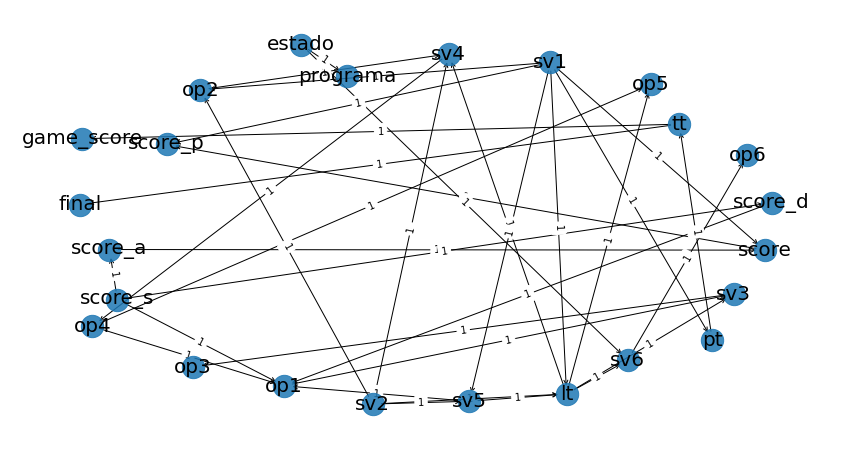

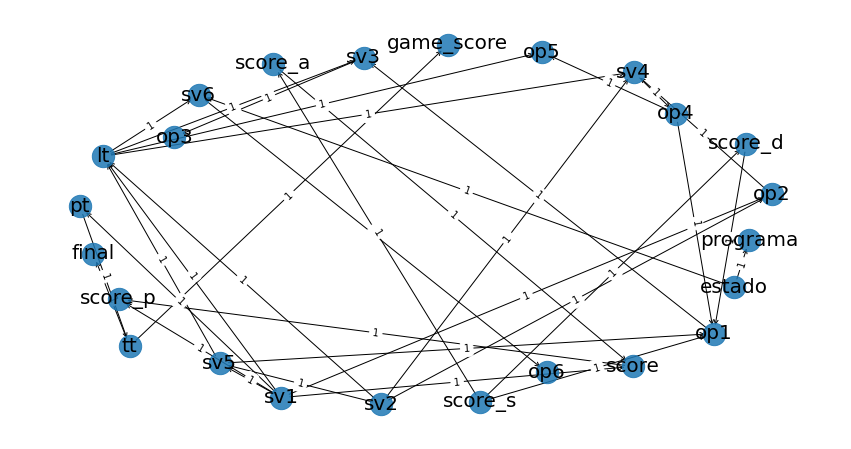

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

FILA N°: 5 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |       




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fina


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4924 |
+-----------+---------------+
| estado(1) |        0.5076 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa":5, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..


0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5487 |
+-----------+---------------+
| estado(1) |        0.4513 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4726 |
+-----------+---------------+
| estado(1) |        0.5274 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":3.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fina





0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5678 |
+-----------+---------------+
| estado(1) |        0.4322 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "programa":5, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5306 |
+-----------+---------------+
| estado(1) |        0.4694 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fi

0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5748 |
+-----------+---------------+
| estado(1) |        0.4252 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5748 |
+-----------+---------------+
| estado(1) |        0.4252 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "fin

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5748 |
+-----------+---------------+
| estado(1) |        0.4252 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5517 |
+-----------+---------------+
| estado(1) |        0.4483 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5678 |
+-----------+---------------+
| estado(1) |        0.4322 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5497 |
+-----------+---------------+
| estado(1) |        0.4503 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:20, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5458 |
+-----------+---------------+
| estado(1) |        0.4542 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fin










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5001 |
+-----------+---------------+
| estado(1) |        0.4999 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5458 |
+-----------+---------------+
| estado(1) |        0.4542 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5748 |
+-----------+---------------+
| estado(1) |        0.4252 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5517 |
+-----------+---------------+
| estado(1) |        0.4483 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":3.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5328 |
+-----------+---------------+
| estado(1) |        0.4672 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":0, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5, "fi

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5863 |
+-----------+---------------+
| estado(1) |        0.4137 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5497 |
+-----------+---------------+
| estado(1) |        0.4503 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5, "fin














0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5306 |
+-----------+---------------+
| estado(1) |        0.4694 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4, "fi

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5517 |
+-----------+---------------+
| estado(1) |        0.4483 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "fi

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "fi

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5748 |
+-----------+---------------+
| estado(1) |        0.4252 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5667 |
+-----------+---------------+
| estado(1) |        0.4333 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "fi


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4823 |
+-----------+---------------+
| estado(1) |        0.5177 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5763 |
+-----------+---------------+
| estado(1) |        0.4237 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5613 |
+-----------+---------------+
| estado(1) |        0.4387 |
+-----------+---------------+
FILA N°: 467 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "fi
















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]

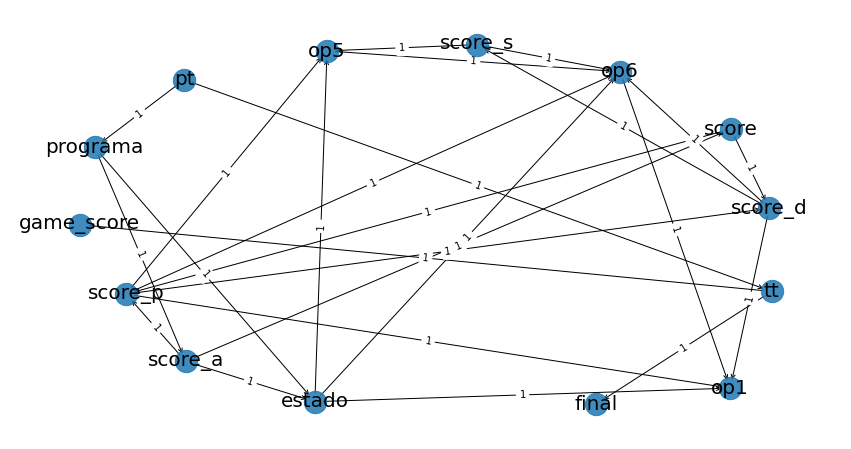


Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6010 |
+-----------+---------------+
| estado(1) |        0.3990 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TEST) Fold 1 Accuracy          : 0.8829787234042553
(TEST) Fold 1 Balanced Accuracy : 0.6172161172161172
(TEST) Fold 1 Precision Score   : 0.9482269503546098
(TEST) Fold 1 Recall Score      : 0.8829787234042553
(TEST) Fold 1 ROC AUC           : 0.5380952380952381
(TEST) Fold 1 Class Ratio       : 0.10638297872340426
FIN DE SECCION DE PRUEBAS, FOLD:  1
Elapsed time: 4860.7696967125 seconds.
INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  2
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]



Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


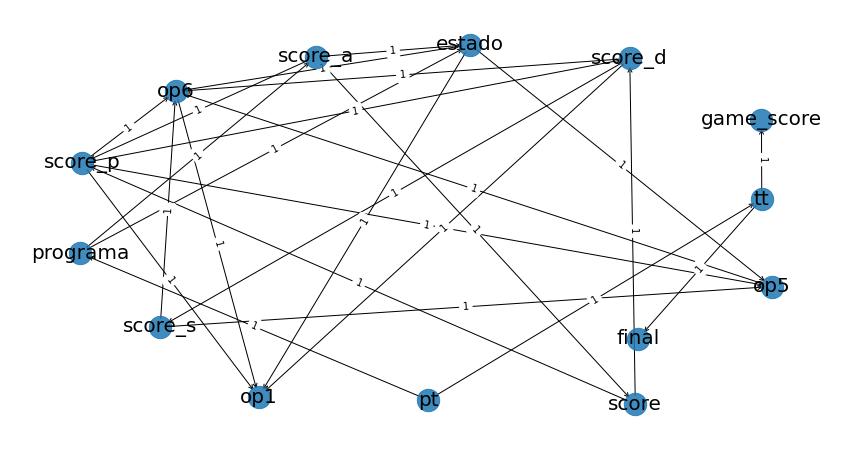

Finding Elimination Order: : : 0it [25:18, ?it/s]
Finding Elimination Order: : : 0it [24:17, ?it/s]
Finding Elimination Order: : : 0it [22:27, ?it/s]
Finding Elimination Order: : : 0it [20:26, ?it/s]
Finding Elimination Order: : : 0it [18:15, ?it/s]
Finding Elimination Order: : : 0it [16:15, ?it/s]
Finding Elimination Order: : : 0it [14:14, ?it/s]
Finding Elimination Order: : : 0it [12:13, ?it/s]
Finding Elimination Order: : : 0it [10:13, ?it/s]
Finding Elimination Order: : : 0it [08:02, ?it/s]
Finding Elimination Order: : : 0it [05:31, ?it/s]
Finding Elimination Order: : : 0it [03:31, ?it/s]
Finding Elimination Order: : : 0it [01:30, ?it/s]


COLUMNA ELIMINADA DE LA INFERENCIA:  lt
FILA N°: 1 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7742 |
+-----------+---------------+
| estado(1) |        0.2258 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2880 |
+-----------+---------------+
| estado(1) |        0.7120 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1769 |
+-----------+---------------+
| estado(1) |        0.8231 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3606 |
+-----------+---------------+
| estado(1) |        0.6394 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8629 |
+-----------+---------------+
| estado(1) |        0.1371 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5032 |
+-----------+---------------+
| estado(1) |        0.4968 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0831 |
+-----------+---------------+
| estado(1) |        0.9169 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4820 |
+-----------+---------------+
| estado(1) |        0.5180 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4550 |
+-----------+---------------+
| estado(1) |        0.5450 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1006 |
+-----------+---------------+
| estado(1) |        0.8994 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2044 |
+-----------+---------------+
| estado(1) |        0.7956 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0626 |
+-----------+---------------+
| estado(1) |        0.9374 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1574 |
+-----------+---------------+
| estado(1) |        0.8426 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2145 |
+-----------+---------------+
| estado(1) |        0.7855 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1530 |
+-----------+---------------+
| estado(1) |        0.8470 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0774 |
+-----------+---------------+
| estado(1) |        0.9226 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1456 |
+-----------+---------------+
| estado(1) |        0.8544 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1651 |
+-----------+---------------+
| estado(1) |        0.8349 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7229 |
+-----------+---------------+
| estado(1) |        0.2771 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1605 |
+-----------+---------------+
| estado(1) |        0.8395 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8231 |
+-----------+---------------+
| estado(1) |        0.1769 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3212 |
+-----------+---------------+
| estado(1) |        0.6788 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5270 |
+-----------+---------------+
| estado(1) |        0.4730 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1549 |
+-----------+---------------+
| estado(1) |        0.8451 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3728 |
+-----------+---------------+
| estado(1) |        0.6272 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4494 |
+-----------+---------------+
| estado(1) |        0.5506 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4706 |
+-----------+---------------+
| estado(1) |        0.5294 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5596 |
+-----------+---------------+
| estado(1) |        0.4404 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1847 |
+-----------+---------------+
| estado(1) |        0.8153 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2513 |
+-----------+---------------+
| estado(1) |        0.7487 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1169 |
+-----------+---------------+
| estado(1) |        0.8831 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5175 |
+-----------+---------------+
| estado(1) |        0.4825 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0600 |
+-----------+---------------+
| estado(1) |        0.9400 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1675 |
+-----------+---------------+
| estado(1) |        0.8325 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6905 |
+-----------+---------------+
| estado(1) |        0.3095 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2584 |
+-----------+---------------+
| estado(1) |        0.7416 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1170 |
+-----------+---------------+
| estado(1) |        0.8830 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7319 |
+-----------+---------------+
| estado(1) |        0.2681 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8007 |
+-----------+---------------+
| estado(1) |        0.1993 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8062 |
+-----------+---------------+
| estado(1) |        0.1938 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8548 |
+-----------+---------------+
| estado(1) |        0.1452 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9701 |
+-----------+---------------+
| estado(1) |        0.0299 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8902 |
+-----------+---------------+
| estado(1) |        0.1098 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:32, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1844 |
+-----------+---------------+
| estado(1) |        0.8156 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9459 |
+-----------+---------------+
| estado(1) |        0.0541 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7325 |
+-----------+---------------+
| estado(1) |        0.2675 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5272 |
+-----------+---------------+
| estado(1) |        0.4728 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9495 |
+-----------+---------------+
| estado(1) |        0.0505 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8305 |
+-----------+---------------+
| estado(1) |        0.1695 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5611 |
+-----------+---------------+
| estado(1) |        0.4389 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4721 |
+-----------+---------------+
| estado(1) |        0.5279 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7204 |
+-----------+---------------+
| estado(1) |        0.2796 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1327 |
+-----------+---------------+
| estado(1) |        0.8673 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op5":1, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6847 |
+-----------+---------------+
| estado(1) |        0.3153 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9281 |
+-----------+---------------+
| estado(1) |        0.0719 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7545 |
+-----------+---------------+
| estado(1) |        0.2455 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:33, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6945 |
+-----------+---------------+
| estado(1) |        0.3055 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5069 |
+-----------+---------------+
| estado(1) |        0.4931 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8474 |
+-----------+---------------+
| estado(1) |        0.1526 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8944 |
+-----------+---------------+
| estado(1) |        0.1056 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5005 |
+-----------+---------------+
| estado(1) |        0.4995 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7732 |
+-----------+---------------+
| estado(1) |        0.2268 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4738 |
+-----------+---------------+
| estado(1) |        0.5262 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7410 |
+-----------+---------------+
| estado(1) |        0.2590 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8313 |
+-----------+---------------+
| estado(1) |        0.1687 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8070 |
+-----------+---------------+
| estado(1) |        0.1930 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6832 |
+-----------+---------------+
| estado(1) |        0.3168 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7035 |
+-----------+---------------+
| estado(1) |        0.2965 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6688 |
+-----------+---------------+
| estado(1) |        0.3312 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2199 |
+-----------+---------------+
| estado(1) |        0.7801 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8111 |
+-----------+---------------+
| estado(1) |        0.1889 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6515 |
+-----------+---------------+
| estado(1) |        0.3485 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4172 |
+-----------+---------------+
| estado(1) |        0.5828 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6941 |
+-----------+---------------+
| estado(1) |        0.3059 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6001 |
+-----------+---------------+
| estado(1) |        0.3999 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5710 |
+-----------+---------------+
| estado(1) |        0.4290 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9545 |
+-----------+---------------+
| estado(1) |        0.0455 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4157 |
+-----------+---------------+
| estado(1) |        0.5843 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9389 |
+-----------+---------------+
| estado(1) |        0.0611 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5682 |
+-----------+---------------+
| estado(1) |        0.4318 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8221 |
+-----------+---------------+
| estado(1) |        0.1779 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9701 |
+-----------+---------------+
| estado(1) |        0.0299 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9430 |
+-----------+---------------+
| estado(1) |        0.0570 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9117 |
+-----------+---------------+
| estado(1) |        0.0883 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6213 |
+-----------+---------------+
| estado(1) |        0.3787 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4950 |
+-----------+---------------+
| estado(1) |        0.5050 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8182 |
+-----------+---------------+
| estado(1) |        0.1818 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6465 |
+-----------+---------------+
| estado(1) |        0.3535 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8458 |
+-----------+---------------+
| estado(1) |        0.1542 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8978 |
+-----------+---------------+
| estado(1) |        0.1022 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4784 |
+-----------+---------------+
| estado(1) |        0.5216 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8239 |
+-----------+---------------+
| estado(1) |        0.1761 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5380 |
+-----------+---------------+
| estado(1) |        0.4620 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6439 |
+-----------+---------------+
| estado(1) |        0.3561 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3376 |
+-----------+---------------+
| estado(1) |        0.6624 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7152 |
+-----------+---------------+
| estado(1) |        0.2848 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7218 |
+-----------+---------------+
| estado(1) |        0.2782 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7314 |
+-----------+---------------+
| estado(1) |        0.2686 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6867 |
+-----------+---------------+
| estado(1) |        0.3133 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5353 |
+-----------+---------------+
| estado(1) |        0.4647 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6953 |
+-----------+---------------+
| estado(1) |        0.3047 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6551 |
+-----------+---------------+
| estado(1) |        0.3449 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6856 |
+-----------+---------------+
| estado(1) |        0.3144 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2617 |
+-----------+---------------+
| estado(1) |        0.7383 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5960 |
+-----------+---------------+
| estado(1) |        0.4040 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7889 |
+-----------+---------------+
| estado(1) |        0.2111 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3805 |
+-----------+---------------+
| estado(1) |        0.6195 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6822 |
+-----------+---------------+
| estado(1) |        0.3178 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7517 |
+-----------+---------------+
| estado(1) |        0.2483 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6189 |
+-----------+---------------+
| estado(1) |        0.3811 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8824 |
+-----------+---------------+
| estado(1) |        0.1176 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3763 |
+-----------+---------------+
| estado(1) |        0.6237 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4646 |
+-----------+---------------+
| estado(1) |        0.5354 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6686 |
+-----------+---------------+
| estado(1) |        0.3314 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7922 |
+-----------+---------------+
| estado(1) |        0.2078 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8124 |
+-----------+---------------+
| estado(1) |        0.1876 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8675 |
+-----------+---------------+
| estado(1) |        0.1325 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7293 |
+-----------+---------------+
| estado(1) |        0.2707 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8202 |
+-----------+---------------+
| estado(1) |        0.1798 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6424 |
+-----------+---------------+
| estado(1) |        0.3576 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8127 |
+-----------+---------------+
| estado(1) |        0.1873 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8198 |
+-----------+---------------+
| estado(1) |        0.1802 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7903 |
+-----------+---------------+
| estado(1) |        0.2097 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5526 |
+-----------+---------------+
| estado(1) |        0.4474 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5823 |
+-----------+---------------+
| estado(1) |        0.4177 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7064 |
+-----------+---------------+
| estado(1) |        0.2936 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7466 |
+-----------+---------------+
| estado(1) |        0.2534 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8682 |
+-----------+---------------+
| estado(1) |        0.1318 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5000 |
+-----------+---------------+
| estado(1) |        0.5000 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9420 |
+-----------+---------------+
| estado(1) |        0.0580 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6099 |
+-----------+---------------+
| estado(1) |        0.3901 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8313 |
+-----------+---------------+
| estado(1) |        0.1687 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7758 |
+-----------+---------------+
| estado(1) |        0.2242 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:42, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9007 |
+-----------+---------------+
| estado(1) |        0.0993 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9209 |
+-----------+---------------+
| estado(1) |        0.0791 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7709 |
+-----------+---------------+
| estado(1) |        0.2291 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4648 |
+-----------+---------------+
| estado(1) |        0.5352 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8051 |
+-----------+---------------+
| estado(1) |        0.1949 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3789 |
+-----------+---------------+
| estado(1) |        0.6211 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4088 |
+-----------+---------------+
| estado(1) |        0.5912 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8333 |
+-----------+---------------+
| estado(1) |        0.1667 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7324 |
+-----------+---------------+
| estado(1) |        0.2676 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4718 |
+-----------+---------------+
| estado(1) |        0.5282 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3606 |
+-----------+---------------+
| estado(1) |        0.6394 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3630 |
+-----------+---------------+
| estado(1) |        0.6370 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6603 |
+-----------+---------------+
| estado(1) |        0.3397 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6440 |
+-----------+---------------+
| estado(1) |        0.3560 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2138 |
+-----------+---------------+
| estado(1) |        0.7862 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6533 |
+-----------+---------------+
| estado(1) |        0.3467 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5283 |
+-----------+---------------+
| estado(1) |        0.4717 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6355 |
+-----------+---------------+
| estado(1) |        0.3645 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6359 |
+-----------+---------------+
| estado(1) |        0.3641 |
+-----------+---------------+
FILA N°: 155 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3564 |
+-----------+---------------+
| estado(1) |        0.6436 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8771 |
+-----------+---------------+
| estado(1) |        0.1229 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4970 |
+-----------+---------------+
| estado(1) |        0.5030 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":4.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3244 |
+-----------+---------------+
| estado(1) |        0.6756 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6647 |
+-----------+---------------+
| estado(1) |        0.3353 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7063 |
+-----------+---------------+
| estado(1) |        0.2937 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6105 |
+-----------+---------------+
| estado(1) |        0.3895 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8491 |
+-----------+---------------+
| estado(1) |        0.1509 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8649 |
+-----------+---------------+
| estado(1) |        0.1351 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7912 |
+-----------+---------------+
| estado(1) |        0.2088 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6916 |
+-----------+---------------+
| estado(1) |        0.3084 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1753 |
+-----------+---------------+
| estado(1) |        0.8247 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2774 |
+-----------+---------------+
| estado(1) |        0.7226 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1113 |
+-----------+---------------+
| estado(1) |        0.8887 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6555 |
+-----------+---------------+
| estado(1) |        0.3445 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7298 |
+-----------+---------------+
| estado(1) |        0.2702 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9231 |
+-----------+---------------+
| estado(1) |        0.0769 |
+-----------+---------------+
FILA N°: 172 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6072 |
+-----------+---------------+
| estado(1) |        0.3928 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6636 |
+-----------+---------------+
| estado(1) |        0.3364 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7974 |
+-----------+---------------+
| estado(1) |        0.2026 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8620 |
+-----------+---------------+
| estado(1) |        0.1380 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0517 |
+-----------+---------------+
| estado(1) |        0.9483 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5372 |
+-----------+---------------+
| estado(1) |        0.4628 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7066 |
+-----------+---------------+
| estado(1) |        0.2934 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7989 |
+-----------+---------------+
| estado(1) |        0.2011 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7530 |
+-----------+---------------+
| estado(1) |        0.2470 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8381 |
+-----------+---------------+
| estado(1) |        0.1619 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8165 |
+-----------+---------------+
| estado(1) |        0.1835 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6640 |
+-----------+---------------+
| estado(1) |        0.3360 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8991 |
+-----------+---------------+
| estado(1) |        0.1009 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7738 |
+-----------+---------------+
| estado(1) |        0.2262 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8438 |
+-----------+---------------+
| estado(1) |        0.1562 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7689 |
+-----------+---------------+
| estado(1) |        0.2311 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3978 |
+-----------+---------------+
| estado(1) |        0.6022 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7226 |
+-----------+---------------+
| estado(1) |        0.2774 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8158 |
+-----------+---------------+
| estado(1) |        0.1842 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7564 |
+-----------+---------------+
| estado(1) |        0.2436 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6733 |
+-----------+---------------+
| estado(1) |        0.3267 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8945 |
+-----------+---------------+
| estado(1) |        0.1055 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3681 |
+-----------+---------------+
| estado(1) |        0.6319 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8202 |
+-----------+---------------+
| estado(1) |        0.1798 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9697 |
+-----------+---------------+
| estado(1) |        0.0303 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9014 |
+-----------+---------------+
| estado(1) |        0.0986 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8895 |
+-----------+---------------+
| estado(1) |        0.1105 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4850 |
+-----------+---------------+
| estado(1) |        0.5150 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8486 |
+-----------+---------------+
| estado(1) |        0.1514 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8809 |
+-----------+---------------+
| estado(1) |        0.1191 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5904 |
+-----------+---------------+
| estado(1) |        0.4096 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9525 |
+-----------+---------------+
| estado(1) |        0.0475 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7005 |
+-----------+---------------+
| estado(1) |        0.2995 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6703 |
+-----------+---------------+
| estado(1) |        0.3297 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3878 |
+-----------+---------------+
| estado(1) |        0.6122 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5090 |
+-----------+---------------+
| estado(1) |        0.4910 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5782 |
+-----------+---------------+
| estado(1) |        0.4218 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7306 |
+-----------+---------------+
| estado(1) |        0.2694 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7043 |
+-----------+---------------+
| estado(1) |        0.2957 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1170 |
+-----------+---------------+
| estado(1) |        0.8830 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8340 |
+-----------+---------------+
| estado(1) |        0.1660 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9035 |
+-----------+---------------+
| estado(1) |        0.0965 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6252 |
+-----------+---------------+
| estado(1) |        0.3748 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4097 |
+-----------+---------------+
| estado(1) |        0.5903 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6882 |
+-----------+---------------+
| estado(1) |        0.3118 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5645 |
+-----------+---------------+
| estado(1) |        0.4355 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4649 |
+-----------+---------------+
| estado(1) |        0.5351 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4547 |
+-----------+---------------+
| estado(1) |        0.5453 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5742 |
+-----------+---------------+
| estado(1) |        0.4258 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8401 |
+-----------+---------------+
| estado(1) |        0.1599 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8675 |
+-----------+---------------+
| estado(1) |        0.1325 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7437 |
+-----------+---------------+
| estado(1) |        0.2563 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7832 |
+-----------+---------------+
| estado(1) |        0.2168 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3038 |
+-----------+---------------+
| estado(1) |        0.6962 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3480 |
+-----------+---------------+
| estado(1) |        0.6520 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2006 |
+-----------+---------------+
| estado(1) |        0.7994 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:11, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7708 |
+-----------+---------------+
| estado(1) |        0.2292 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7594 |
+-----------+---------------+
| estado(1) |        0.2406 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8200 |
+-----------+---------------+
| estado(1) |        0.1800 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2979 |
+-----------+---------------+
| estado(1) |        0.7021 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8627 |
+-----------+---------------+
| estado(1) |        0.1373 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5778 |
+-----------+---------------+
| estado(1) |        0.4222 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2580 |
+-----------+---------------+
| estado(1) |        0.7420 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8178 |
+-----------+---------------+
| estado(1) |        0.1822 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7250 |
+-----------+---------------+
| estado(1) |        0.2750 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3880 |
+-----------+---------------+
| estado(1) |        0.6120 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3818 |
+-----------+---------------+
| estado(1) |        0.6182 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7512 |
+-----------+---------------+
| estado(1) |        0.2488 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8927 |
+-----------+---------------+
| estado(1) |        0.1073 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7957 |
+-----------+---------------+
| estado(1) |        0.2043 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9630 |
+-----------+---------------+
| estado(1) |        0.0370 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6779 |
+-----------+---------------+
| estado(1) |        0.3221 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9153 |
+-----------+---------------+
| estado(1) |        0.0847 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7577 |
+-----------+---------------+
| estado(1) |        0.2423 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:03, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7379 |
+-----------+---------------+
| estado(1) |        0.2621 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8768 |
+-----------+---------------+
| estado(1) |        0.1232 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7526 |
+-----------+---------------+
| estado(1) |        0.2474 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6440 |
+-----------+---------------+
| estado(1) |        0.3560 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5779 |
+-----------+---------------+
| estado(1) |        0.4221 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5850 |
+-----------+---------------+
| estado(1) |        0.4150 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6439 |
+-----------+---------------+
| estado(1) |        0.3561 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3442 |
+-----------+---------------+
| estado(1) |        0.6558 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8814 |
+-----------+---------------+
| estado(1) |        0.1186 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8809 |
+-----------+---------------+
| estado(1) |        0.1191 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3681 |
+-----------+---------------+
| estado(1) |        0.6319 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6999 |
+-----------+---------------+
| estado(1) |        0.3001 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4945 |
+-----------+---------------+
| estado(1) |        0.5055 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8869 |
+-----------+---------------+
| estado(1) |        0.1131 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9337 |
+-----------+---------------+
| estado(1) |        0.0663 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5054 |
+-----------+---------------+
| estado(1) |        0.4946 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5325 |
+-----------+---------------+
| estado(1) |        0.4675 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4993 |
+-----------+---------------+
| estado(1) |        0.5007 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8173 |
+-----------+---------------+
| estado(1) |        0.1827 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4035 |
+-----------+---------------+
| estado(1) |        0.5965 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8434 |
+-----------+---------------+
| estado(1) |        0.1566 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6648 |
+-----------+---------------+
| estado(1) |        0.3352 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8118 |
+-----------+---------------+
| estado(1) |        0.1882 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6915 |
+-----------+---------------+
| estado(1) |        0.3085 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5327 |
+-----------+---------------+
| estado(1) |        0.4673 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7493 |
+-----------+---------------+
| estado(1) |        0.2507 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5380 |
+-----------+---------------+
| estado(1) |        0.4620 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7758 |
+-----------+---------------+
| estado(1) |        0.2242 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5758 |
+-----------+---------------+
| estado(1) |        0.4242 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7093 |
+-----------+---------------+
| estado(1) |        0.2907 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5309 |
+-----------+---------------+
| estado(1) |        0.4691 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8197 |
+-----------+---------------+
| estado(1) |        0.1803 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9109 |
+-----------+---------------+
| estado(1) |        0.0891 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5809 |
+-----------+---------------+
| estado(1) |        0.4191 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8683 |
+-----------+---------------+
| estado(1) |        0.1317 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7501 |
+-----------+---------------+
| estado(1) |        0.2499 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4309 |
+-----------+---------------+
| estado(1) |        0.5691 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8438 |
+-----------+---------------+
| estado(1) |        0.1562 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7339 |
+-----------+---------------+
| estado(1) |        0.2661 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"tt":4.0, "pt":4.0, "game_score":4.0, "op1":1, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6099 |
+-----------+---------------+
| estado(1) |        0.3901 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5478 |
+-----------+---------------+
| estado(1) |        0.4522 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":1, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6815 |
+-----------+---------------+
| estado(1) |        0.3185 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5691 |
+-----------+---------------+
| estado(1) |        0.4309 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3992 |
+-----------+---------------+
| estado(1) |        0.6008 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3948 |
+-----------+---------------+
| estado(1) |        0.6052 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7262 |
+-----------+---------------+
| estado(1) |        0.2738 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5487 |
+-----------+---------------+
| estado(1) |        0.4513 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7733 |
+-----------+---------------+
| estado(1) |        0.2267 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3983 |
+-----------+---------------+
| estado(1) |        0.6017 |
+-----------+---------------+
FILA N°: 295 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7250 |
+-----------+---------------+
| estado(1) |        0.2750 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8479 |
+-----------+---------------+
| estado(1) |        0.1521 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4996 |
+-----------+---------------+
| estado(1) |        0.5004 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5466 |
+-----------+---------------+
| estado(1) |        0.4534 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5372 |
+-----------+---------------+
| estado(1) |        0.4628 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2291 |
+-----------+---------------+
| estado(1) |        0.7709 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5569 |
+-----------+---------------+
| estado(1) |        0.4431 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8759 |
+-----------+---------------+
| estado(1) |        0.1241 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8491 |
+-----------+---------------+
| estado(1) |        0.1509 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9038 |
+-----------+---------------+
| estado(1) |        0.0962 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3991 |
+-----------+---------------+
| estado(1) |        0.6009 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8407 |
+-----------+---------------+
| estado(1) |        0.1593 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7925 |
+-----------+---------------+
| estado(1) |        0.2075 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9228 |
+-----------+---------------+
| estado(1) |        0.0772 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:23, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3212 |
+-----------+---------------+
| estado(1) |        0.6788 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5474 |
+-----------+---------------+
| estado(1) |        0.4526 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9320 |
+-----------+---------------+
| estado(1) |        0.0680 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1716 |
+-----------+---------------+
| estado(1) |        0.8284 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5327 |
+-----------+---------------+
| estado(1) |        0.4673 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9461 |
+-----------+---------------+
| estado(1) |        0.0539 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6443 |
+-----------+---------------+
| estado(1) |        0.3557 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4249 |
+-----------+---------------+
| estado(1) |        0.5751 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8520 |
+-----------+---------------+
| estado(1) |        0.1480 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6822 |
+-----------+---------------+
| estado(1) |        0.3178 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8122 |
+-----------+---------------+
| estado(1) |        0.1878 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8221 |
+-----------+---------------+
| estado(1) |        0.1779 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4561 |
+-----------+---------------+
| estado(1) |        0.5439 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8605 |
+-----------+---------------+
| estado(1) |        0.1395 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:42, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3999 |
+-----------+---------------+
| estado(1) |        0.6001 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7063 |
+-----------+---------------+
| estado(1) |        0.2937 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6187 |
+-----------+---------------+
| estado(1) |        0.3813 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4773 |
+-----------+---------------+
| estado(1) |        0.5227 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9443 |
+-----------+---------------+
| estado(1) |        0.0557 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7227 |
+-----------+---------------+
| estado(1) |        0.2773 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8458 |
+-----------+---------------+
| estado(1) |        0.1542 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6694 |
+-----------+---------------+
| estado(1) |        0.3306 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9120 |
+-----------+---------------+
| estado(1) |        0.0880 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8746 |
+-----------+---------------+
| estado(1) |        0.1254 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4755 |
+-----------+---------------+
| estado(1) |        0.5245 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4898 |
+-----------+---------------+
| estado(1) |        0.5102 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9128 |
+-----------+---------------+
| estado(1) |        0.0872 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7009 |
+-----------+---------------+
| estado(1) |        0.2991 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3267 |
+-----------+---------------+
| estado(1) |        0.6733 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5315 |
+-----------+---------------+
| estado(1) |        0.4685 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9639 |
+-----------+---------------+
| estado(1) |        0.0361 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8430 |
+-----------+---------------+
| estado(1) |        0.1570 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4399 |
+-----------+---------------+
| estado(1) |        0.5601 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7538 |
+-----------+---------------+
| estado(1) |        0.2462 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4612 |
+-----------+---------------+
| estado(1) |        0.5388 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5100 |
+-----------+---------------+
| estado(1) |        0.4900 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7152 |
+-----------+---------------+
| estado(1) |        0.2848 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9611 |
+-----------+---------------+
| estado(1) |        0.0389 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5496 |
+-----------+---------------+
| estado(1) |        0.4504 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7332 |
+-----------+---------------+
| estado(1) |        0.2668 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6717 |
+-----------+---------------+
| estado(1) |        0.3283 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9183 |
+-----------+---------------+
| estado(1) |        0.0817 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6798 |
+-----------+---------------+
| estado(1) |        0.3202 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7660 |
+-----------+---------------+
| estado(1) |        0.2340 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7708 |
+-----------+---------------+
| estado(1) |        0.2292 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9381 |
+-----------+---------------+
| estado(1) |        0.0619 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7209 |
+-----------+---------------+
| estado(1) |        0.2791 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9291 |
+-----------+---------------+
| estado(1) |        0.0709 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6315 |
+-----------+---------------+
| estado(1) |        0.3685 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8158 |
+-----------+---------------+
| estado(1) |        0.1842 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7519 |
+-----------+---------------+
| estado(1) |        0.2481 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9420 |
+-----------+---------------+
| estado(1) |        0.0580 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8239 |
+-----------+---------------+
| estado(1) |        0.1761 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3354 |
+-----------+---------------+
| estado(1) |        0.6646 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6047 |
+-----------+---------------+
| estado(1) |        0.3953 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8809 |
+-----------+---------------+
| estado(1) |        0.1191 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9036 |
+-----------+---------------+
| estado(1) |        0.0964 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9296 |
+-----------+---------------+
| estado(1) |        0.0704 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op5":0, "op6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9449 |
+-----------+---------------+
| estado(1) |        0.0551 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4786 |
+-----------+---------------+
| estado(1) |        0.5214 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5865 |
+-----------+---------------+
| estado(1) |        0.4135 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4648 |
+-----------+---------------+
| estado(1) |        0.5352 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7424 |
+-----------+---------------+
| estado(1) |        0.2576 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6105 |
+-----------+---------------+
| estado(1) |        0.3895 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8197 |
+-----------+---------------+
| estado(1) |        0.1803 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0710 |
+-----------+---------------+
| estado(1) |        0.9290 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1305 |
+-----------+---------------+
| estado(1) |        0.8695 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"tt":1.968537142865257, "pt":1.968537142865257, "game_score":1.968537142865257, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.968537142865257}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0600 |
+-----------+---------------+
| estado(1) |        0.9400 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0645 |
+-----------+---------------+
| estado(1) |        0.9355 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"tt":1.647908393657438, "pt":1.647908393657438, "game_score":1.647908393657438, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":0, "score_d":2, "score_s":1, "programa":5, "final":1.647908393657438}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4384 |
+-----------+---------------+
| estado(1) |        0.5616 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"tt":0.5208074883588122, "pt":0.5208074883588122, "game_score":0.5208074883588122, "op1":1, "op5":0, "op6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":0.5208074883588122}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2044 |
+-----------+---------------+
| estado(1) |        0.7956 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1508 |
+-----------+---------------+
| estado(1) |        0.8492 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"tt":1.0181783428938933, "pt":1.0181783428938933, "game_score":1.0181783428938933, "op1":0, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":1.0181783428938933}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4820 |
+-----------+---------------+
| estado(1) |        0.5180 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6356 |
+-----------+---------------+
| estado(1) |        0.3644 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0446 |
+-----------+---------------+
| estado(1) |        0.9554 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1715 |
+-----------+---------------+
| estado(1) |        0.8285 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1114 |
+-----------+---------------+
| estado(1) |        0.8886 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0766 |
+-----------+---------------+
| estado(1) |        0.9234 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"tt":1.682296066231216, "pt":1.682296066231216, "game_score":1.682296066231216, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.682296066231216}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4032 |
+-----------+---------------+
| estado(1) |        0.5968 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"tt":0.7296283359037018, "pt":0.7296283359037018, "game_score":0.7296283359037018, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.7296283359037018}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2264 |
+-----------+---------------+
| estado(1) |        0.7736 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"tt":1.779264404331406, "pt":1.779264404331406, "game_score":1.779264404331406, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":1.779264404331406}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1592 |
+-----------+---------------+
| estado(1) |        0.8408 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1138 |
+-----------+---------------+
| estado(1) |        0.8862 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"tt":1.7408393240288578, "pt":1.7408393240288578, "game_score":1.7408393240288578, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":1.7408393240288578}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1592 |
+-----------+---------------+
| estado(1) |        0.8408 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2249 |
+-----------+---------------+
| estado(1) |        0.7751 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1715 |
+-----------+---------------+
| estado(1) |        0.8285 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0600 |
+-----------+---------------+
| estado(1) |        0.9400 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1574 |
+-----------+---------------+
| estado(1) |        0.8426 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2217 |
+-----------+---------------+
| estado(1) |        0.7783 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6440 |
+-----------+---------------+
| estado(1) |        0.3560 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"tt":0.5572695953490796, "pt":0.5572695953490796, "game_score":0.5572695953490796, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.5572695953490796}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0543 |
+-----------+---------------+
| estado(1) |        0.9457 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0446 |
+-----------+---------------+
| estado(1) |        0.9554 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6501 |
+-----------+---------------+
| estado(1) |        0.3499 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2264 |
+-----------+---------------+
| estado(1) |        0.7736 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"tt":0.31989529944853534, "pt":0.31989529944853534, "game_score":0.31989529944853534, "op1":0, "op5":1, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.31989529944853534}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [01:02, ?it/s]
Finding Elimination Order: : : 0it [00:41, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3248 |
+-----------+---------------+
| estado(1) |        0.6752 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4993 |
+-----------+---------------+
| estado(1) |        0.5007 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2617 |
+-----------+---------------+
| estado(1) |        0.7383 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"tt":2.14962227718387, "pt":2.14962227718387, "game_score":2.14962227718387, "op1":0, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":2.14962227718387}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4820 |
+-----------+---------------+
| estado(1) |        0.5180 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2138 |
+-----------+---------------+
| estado(1) |        0.7862 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0591 |
+-----------+---------------+
| estado(1) |        0.9409 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0782 |
+-----------+---------------+
| estado(1) |        0.9218 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2264 |
+-----------+---------------+
| estado(1) |        0.7736 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"tt":1.076225705330033, "pt":1.076225705330033, "game_score":1.076225705330033, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.076225705330033}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"tt":1.4404626259061293, "pt":1.4404626259061293, "game_score":1.4404626259061293, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.4404626259061293}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2095 |
+-----------+---------------+
| estado(1) |        0.7905 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"tt":2.7233588830394244, "pt":2.7233588830394244, "game_score":2.7233588830394244, "op1":0, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":2.7233588830394244}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4270 |
+-----------+---------------+
| estado(1) |        0.5730 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1425 |
+-----------+---------------+
| estado(1) |        0.8575 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0914 |
+-----------+---------------+
| estado(1) |        0.9086 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0914 |
+-----------+---------------+
| estado(1) |        0.9086 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1114 |
+-----------+---------------+
| estado(1) |        0.8886 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0914 |
+-----------+---------------+
| estado(1) |        0.9086 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2644 |
+-----------+---------------+
| estado(1) |        0.7356 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1508 |
+-----------+---------------+
| estado(1) |        0.8492 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1802 |
+-----------+---------------+
| estado(1) |        0.8198 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0710 |
+-----------+---------------+
| estado(1) |        0.9290 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4178 |
+-----------+---------------+
| estado(1) |        0.5822 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"tt":0.1725092905962905, "pt":0.1725092905962905, "game_score":0.1725092905962905, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.1725092905962905}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4230 |
+-----------+---------------+
| estado(1) |        0.5770 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"tt":0.10380708776713299, "pt":0.10380708776713299, "game_score":0.10380708776713299, "op1":0, "op5":1, "op6":1, "score":7, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.10380708776713299}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3248 |
+-----------+---------------+
| estado(1) |        0.6752 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0914 |
+-----------+---------------+
| estado(1) |        0.9086 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"tt":1.2865436386129303, "pt":1.2865436386129303, "game_score":1.2865436386129303, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":3, "final":1.2865436386129303}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3484 |
+-----------+---------------+
| estado(1) |        0.6516 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1880 |
+-----------+---------------+
| estado(1) |        0.8120 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1305 |
+-----------+---------------+
| estado(1) |        0.8695 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"tt":0.10585889586615549, "pt":0.10585889586615549, "game_score":0.10585889586615549, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.10585889586615549}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2145 |
+-----------+---------------+
| estado(1) |        0.7855 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"tt":1.7727617085168443, "pt":1.7727617085168443, "game_score":1.7727617085168443, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.7727617085168443}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3845 |
+-----------+---------------+
| estado(1) |        0.6155 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0941 |
+-----------+---------------+
| estado(1) |        0.9059 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1908 |
+-----------+---------------+
| estado(1) |        0.8092 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4035 |
+-----------+---------------+
| estado(1) |        0.5965 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"tt":1.9362178175010623, "pt":1.9362178175010623, "game_score":1.9362178175010623, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.9362178175010623}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0759 |
+-----------+---------------+
| estado(1) |        0.9241 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0766 |
+-----------+---------------+
| estado(1) |        0.9234 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1170 |
+-----------+---------------+
| estado(1) |        0.8830 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3080 |
+-----------+---------------+
| estado(1) |        0.6920 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:23, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3416 |
+-----------+---------------+
| estado(1) |        0.6584 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1514 |
+-----------+---------------+
| estado(1) |        0.8486 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2544 |
+-----------+---------------+
| estado(1) |        0.7456 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3748 |
+-----------+---------------+
| estado(1) |        0.6252 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1327 |
+-----------+---------------+
| estado(1) |        0.8673 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0626 |
+-----------+---------------+
| estado(1) |        0.9374 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1698 |
+-----------+---------------+
| estado(1) |        0.8302 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0543 |
+-----------+---------------+
| estado(1) |        0.9457 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"tt":1.22872728957383, "pt":1.22872728957383, "game_score":1.22872728957383, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.22872728957383}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1332 |
+-----------+---------------+
| estado(1) |        0.8668 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0989 |
+-----------+---------------+
| estado(1) |        0.9011 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1425 |
+-----------+---------------+
| estado(1) |        0.8575 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1880 |
+-----------+---------------+
| estado(1) |        0.8120 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1715 |
+-----------+---------------+
| estado(1) |        0.8285 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0626 |
+-----------+---------------+
| estado(1) |        0.9374 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0626 |
+-----------+---------------+
| estado(1) |        0.9374 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0766 |
+-----------+---------------+
| estado(1) |        0.9234 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"tt":0.8890998060370662, "pt":0.8890998060370662, "game_score":0.8890998060370662, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.8890998060370662}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1549 |
+-----------+---------------+
| estado(1) |        0.8451 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1802 |
+-----------+---------------+
| estado(1) |        0.8198 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4020 |
+-----------+---------------+
| estado(1) |        0.5980 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1908 |
+-----------+---------------+
| estado(1) |        0.8092 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5657 |
+-----------+---------------+
| estado(1) |        0.4343 |
+-----------+---------------+
FILA N°: 467 -> P("Estado" | [{"tt":0.4022529125208283, "pt":0.4022529125208283, "game_score":0.4022529125208283, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.4022529125208283}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0808 |
+-----------+---------------+
| estado(1) |        0.9192 |
+-----------+---------------+
FILA N°: 468 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5657 |
+-----------+---------------+
| estado(1) |        0.4343 |
+-----------+---------------+
FILA N°: 469 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0766 |
+-----------+---------------+
| estado(1) |        0.9234 |
+-----------+---------------+
FILA N°: 470 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0782 |
+-----------+---------------+
| estado(1) |        0.9218 |
+-----------+---------------+
FILA N°: 471 -> P("Estado" | [{"tt":1.2201207867264552, "pt":1.2201207867264552, "game_score":1.2201207867264552, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.2201207867264552}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0831 |
+-----------+---------------+
| estado(1) |        0.9169 |
+-----------+---------------+
FILA N°: 472 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 473 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:03, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0914 |
+-----------+---------------+
| estado(1) |        0.9086 |
+-----------+---------------+
FILA N°: 474 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3092 |
+-----------+---------------+
| estado(1) |        0.6908 |
+-----------+---------------+
FILA N°: 475 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1280 |
+-----------+---------------+
| estado(1) |        0.8720 |
+-----------+---------------+
FILA N°: 476 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1442 |
+-----------+---------------+
| estado(1) |        0.8558 |
+-----------+---------------+
FILA N°: 477 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4730 |
+-----------+---------------+
| estado(1) |        0.5270 |
+-----------+---------------+
FILA N°: 478 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2544 |
+-----------+---------------+
| estado(1) |        0.7456 |
+-----------+---------------+
FILA N°: 479 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0762 |
+-----------+---------------+
| estado(1) |        0.9238 |
+-----------+---------------+
FILA N°: 480 -> P("Estado" | [{"tt":0.9023331557560105, "pt":0.9023331557560105, "game_score":0.9023331557560105, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.9023331557560105}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1636 |
+-----------+---------------+
| estado(1) |        0.8364 |
+-----------+---------------+
FILA N°: 481 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5175 |
+-----------+---------------+
| estado(1) |        0.4825 |
+-----------+---------------+
FILA N°: 482 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 483 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1425 |
+-----------+---------------+
| estado(1) |        0.8575 |
+-----------+---------------+
FILA N°: 484 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5226 |
+-----------+---------------+
| estado(1) |        0.4774 |
+-----------+---------------+
FILA N°: 485 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1170 |
+-----------+---------------+
| estado(1) |        0.8830 |
+-----------+---------------+
FILA N°: 486 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 487 -> P("Estado" | [{"tt":0.381025806560524, "pt":0.381025806560524, "game_score":0.381025806560524, "op1":0, "op5":1, "op6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.381025806560524}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0848 |
+-----------+---------------+
| estado(1) |        0.9152 |
+-----------+---------------+
FILA N°: 488 -> P("Estado" | [{"tt":1.208462958264545, "pt":1.208462958264545, "game_score":1.208462958264545, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.208462958264545}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 489 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6213 |
+-----------+---------------+
| estado(1) |        0.3787 |
+-----------+---------------+
FILA N°: 490 -> P("Estado" | [{"tt":1.3608944774584852, "pt":1.3608944774584852, "game_score":1.3608944774584852, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.3608944774584852}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5540 |
+-----------+---------------+
| estado(1) |        0.4460 |
+-----------+---------------+
FILA N°: 491 -> P("Estado" | [{"tt":0.4347671687037019, "pt":0.4347671687037019, "game_score":0.4347671687037019, "op1":0, "op5":1, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.4347671687037019}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1427 |
+-----------+---------------+
| estado(1) |        0.8573 |
+-----------+---------------+
FILA N°: 492 -> P("Estado" | [{"tt":0.04003667419739687, "pt":0.04003667419739687, "game_score":0.04003667419739687, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.04003667419739687}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2742 |
+-----------+---------------+
| estado(1) |        0.7258 |
+-----------+---------------+
FILA N°: 493 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0941 |
+-----------+---------------+
| estado(1) |        0.9059 |
+-----------+---------------+
FILA N°: 494 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1574 |
+-----------+---------------+
| estado(1) |        0.8426 |
+-----------+---------------+
FILA N°: 495 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2478 |
+-----------+---------------+
| estado(1) |        0.7522 |
+-----------+---------------+
FILA N°: 496 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4109 |
+-----------+---------------+
| estado(1) |        0.5891 |
+-----------+---------------+
FILA N°: 497 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5226 |
+-----------+---------------+
| estado(1) |        0.4774 |
+-----------+---------------+
FILA N°: 498 -> P("Estado" | [{"tt":1.6108500152146061, "pt":1.6108500152146061, "game_score":1.6108500152146061, "op1":0, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":1.6108500152146061}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1793 |
+-----------+---------------+
| estado(1) |        0.8207 |
+-----------+---------------+
FILA N°: 499 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2128 |
+-----------+---------------+
| estado(1) |        0.7872 |
+-----------+---------------+
FILA N°: 500 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0591 |
+-----------+---------------+
| estado(1) |        0.9409 |
+-----------+---------------+
FILA N°: 501 -> P("Estado" | [{"tt":1.1640995802742804, "pt":1.1640995802742804, "game_score":1.1640995802742804, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.1640995802742804}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 502 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0837 |
+-----------+---------------+
| estado(1) |        0.9163 |
+-----------+---------------+
FILA N°: 503 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0710 |
+-----------+---------------+
| estado(1) |        0.9290 |
+-----------+---------------+
FILA N°: 504 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0718 |
+-----------+---------------+
| estado(1) |        0.9282 |
+-----------+---------------+
FILA N°: 505 -> P("Estado" | [{"tt":0.7560351117996463, "pt":0.7560351117996463, "game_score":0.7560351117996463, "op1":0, "op5":0, "op6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.7560351117996463}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3845 |
+-----------+---------------+
| estado(1) |        0.6155 |
+-----------+---------------+
FILA N°: 506 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1170 |
+-----------+---------------+
| estado(1) |        0.8830 |
+-----------+---------------+
FILA N°: 507 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 508 -> P("Estado" | [{"tt":0.8232800382258144, "pt":0.8232800382258144, "game_score":0.8232800382258144, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":0.8232800382258144}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1781 |
+-----------+---------------+
| estado(1) |        0.8219 |
+-----------+---------------+
FILA N°: 509 -> P("Estado" | [{"tt":1.914706857479111, "pt":1.914706857479111, "game_score":1.914706857479111, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.914706857479111}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 510 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2644 |
+-----------+---------------+
| estado(1) |        0.7356 |
+-----------+---------------+
FILA N°: 511 -> P("Estado" | [{"tt":0.20098707285427964, "pt":0.20098707285427964, "game_score":0.20098707285427964, "op1":1, "op5":0, "op6":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":2, "final":0.20098707285427964}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1209 |
+-----------+---------------+
| estado(1) |        0.8791 |
+-----------+---------------+
FILA N°: 512 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 513 -> P("Estado" | [{"tt":1.1986947169224895, "pt":1.1986947169224895, "game_score":1.1986947169224895, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.1986947169224895}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5540 |
+-----------+---------------+
| estado(1) |        0.4460 |
+-----------+---------------+
FILA N°: 514 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1090 |
+-----------+---------------+
| estado(1) |        0.8910 |
+-----------+---------------+
FILA N°: 515 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0941 |
+-----------+---------------+
| estado(1) |        0.9059 |
+-----------+---------------+
FILA N°: 516 -> P("Estado" | [{"tt":1.1682973443277245, "pt":1.1682973443277245, "game_score":1.1682973443277245, "op1":0, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.1682973443277245}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:41, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3434 |
+-----------+---------------+
| estado(1) |        0.6566 |
+-----------+---------------+
FILA N°: 517 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:41, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0914 |
+-----------+---------------+
| estado(1) |        0.9086 |
+-----------+---------------+
FILA N°: 518 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4993 |
+-----------+---------------+
| estado(1) |        0.5007 |
+-----------+---------------+
FILA N°: 519 -> P("Estado" | [{"tt":0.26047616378201854, "pt":0.26047616378201854, "game_score":0.26047616378201854, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.26047616378201854}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1549 |
+-----------+---------------+
| estado(1) |        0.8451 |
+-----------+---------------+
FILA N°: 520 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2259 |
+-----------+---------------+
| estado(1) |        0.7741 |
+-----------+---------------+
FILA N°: 521 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0591 |
+-----------+---------------+
| estado(1) |        0.9409 |
+-----------+---------------+
FILA N°: 522 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0645 |
+-----------+---------------+
| estado(1) |        0.9355 |
+-----------+---------------+
FILA N°: 523 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3062 |
+-----------+---------------+
| estado(1) |        0.6938 |
+-----------+---------------+
FILA N°: 524 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0774 |
+-----------+---------------+
| estado(1) |        0.9226 |
+-----------+---------------+
FILA N°: 525 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2215 |
+-----------+---------------+
| estado(1) |        0.7785 |
+-----------+---------------+
FILA N°: 526 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1847 |
+-----------+---------------+
| estado(1) |        0.8153 |
+-----------+---------------+
FILA N°: 527 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1058 |
+-----------+---------------+
| estado(1) |        0.8942 |
+-----------+---------------+
FILA N°: 528 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2544 |
+-----------+---------------+
| estado(1) |        0.7456 |
+-----------+---------------+
FILA N°: 529 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 530 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3980 |
+-----------+---------------+
| estado(1) |        0.6020 |
+-----------+---------------+
FILA N°: 531 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0774 |
+-----------+---------------+
| estado(1) |        0.9226 |
+-----------+---------------+
FILA N°: 532 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2617 |
+-----------+---------------+
| estado(1) |        0.7383 |
+-----------+---------------+
FILA N°: 533 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0543 |
+-----------+---------------+
| estado(1) |        0.9457 |
+-----------+---------------+
FILA N°: 534 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6440 |
+-----------+---------------+
| estado(1) |        0.3560 |
+-----------+---------------+
FILA N°: 535 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2617 |
+-----------+---------------+
| estado(1) |        0.7383 |
+-----------+---------------+
FILA N°: 536 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0543 |
+-----------+---------------+
| estado(1) |        0.9457 |
+-----------+---------------+
FILA N°: 537 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5175 |
+-----------+---------------+
| estado(1) |        0.4825 |
+-----------+---------------+
FILA N°: 538 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1058 |
+-----------+---------------+
| estado(1) |        0.8942 |
+-----------+---------------+
FILA N°: 539 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1380 |
+-----------+---------------+
| estado(1) |        0.8620 |
+-----------+---------------+
FILA N°: 540 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0626 |
+-----------+---------------+
| estado(1) |        0.9374 |
+-----------+---------------+
FILA N°: 541 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 542 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4035 |
+-----------+---------------+
| estado(1) |        0.5965 |
+-----------+---------------+
FILA N°: 543 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1753 |
+-----------+---------------+
| estado(1) |        0.8247 |
+-----------+---------------+
FILA N°: 544 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:21, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 545 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0626 |
+-----------+---------------+
| estado(1) |        0.9374 |
+-----------+---------------+
FILA N°: 546 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0913 |
+-----------+---------------+
| estado(1) |        0.9087 |
+-----------+---------------+
FILA N°: 547 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0766 |
+-----------+---------------+
| estado(1) |        0.9234 |
+-----------+---------------+
FILA N°: 548 -> P("Estado" | [{"tt":1.9504704110016424, "pt":1.9504704110016424, "game_score":1.9504704110016424, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4, "final":1.9504704110016424}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0543 |
+-----------+---------------+
| estado(1) |        0.9457 |
+-----------+---------------+
FILA N°: 549 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1811 |
+-----------+---------------+
| estado(1) |        0.8189 |
+-----------+---------------+
FILA N°: 550 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2291 |
+-----------+---------------+
| estado(1) |        0.7709 |
+-----------+---------------+
FILA N°: 551 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2291 |
+-----------+---------------+
| estado(1) |        0.7709 |
+-----------+---------------+
FILA N°: 552 -> P("Estado" | [{"tt":0.42324824831865826, "pt":0.42324824831865826, "game_score":0.42324824831865826, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.42324824831865826}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2145 |
+-----------+---------------+
| estado(1) |        0.7855 |
+-----------+---------------+
FILA N°: 553 -> P("Estado" | [{"tt":0.04963707952465091, "pt":0.04963707952465091, "game_score":0.04963707952465091, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.04963707952465091}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0808 |
+-----------+---------------+
| estado(1) |        0.9192 |
+-----------+---------------+
FILA N°: 554 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6440 |
+-----------+---------------+
| estado(1) |        0.3560 |
+-----------+---------------+
FILA N°: 555 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1442 |
+-----------+---------------+
| estado(1) |        0.8558 |
+-----------+---------------+
FILA N°: 556 -> P("Estado" | [{"tt":1.1466547737356314, "pt":1.1466547737356314, "game_score":1.1466547737356314, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.1466547737356314}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1332 |
+-----------+---------------+
| estado(1) |        0.8668 |
+-----------+---------------+
FILA N°: 557 -> P("Estado" | [{"tt":0.37881929347829746, "pt":0.37881929347829746, "game_score":0.37881929347829746, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.37881929347829746}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0808 |
+-----------+---------------+
| estado(1) |        0.9192 |
+-----------+---------------+
FILA N°: 558 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3728 |
+-----------+---------------+
| estado(1) |        0.6272 |
+-----------+---------------+
FILA N°: 559 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1170 |
+-----------+---------------+
| estado(1) |        0.8830 |
+-----------+---------------+
FILA N°: 560 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2617 |
+-----------+---------------+
| estado(1) |        0.7383 |
+-----------+---------------+
FILA N°: 561 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2291 |
+-----------+---------------+
| estado(1) |        0.7709 |
+-----------+---------------+
FILA N°: 562 -> P("Estado" | [{"tt":0.043006632803115896, "pt":0.043006632803115896, "game_score":0.043006632803115896, "op1":1, "op5":0, "op6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.043006632803115896}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2445 |
+-----------+---------------+
| estado(1) |        0.7555 |
+-----------+---------------+
FILA N°: 563 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0626 |
+-----------+---------------+
| estado(1) |        0.9374 |
+-----------+---------------+
FILA N°: 564 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6574 |
+-----------+---------------+
| estado(1) |        0.3426 |
+-----------+---------------+
FILA N°: 565 -> P("Estado" | [{"tt":0.8556874680772022, "pt":0.8556874680772022, "game_score":0.8556874680772022, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.8556874680772022}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2171 |
+-----------+---------------+
| estado(1) |        0.7829 |
+-----------+---------------+
FILA N°: 566 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4494 |
+-----------+---------------+
| estado(1) |        0.5506 |
+-----------+---------------+
FILA N°: 567 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1114 |
+-----------+---------------+
| estado(1) |        0.8886 |
+-----------+---------------+
FILA N°: 568 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1425 |
+-----------+---------------+
| estado(1) |        0.8575 |
+-----------+---------------+
FILA N°: 569 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1698 |
+-----------+---------------+
| estado(1) |        0.8302 |
+-----------+---------------+
FILA N°: 570 -> P("Estado" | [{"tt":0.1919009630759635, "pt":0.1919009630759635, "game_score":0.1919009630759635, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.1919009630759635}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2145 |
+-----------+---------------+
| estado(1) |        0.7855 |
+-----------+---------------+
FILA N°: 571 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0913 |
+-----------+---------------+
| estado(1) |        0.9087 |
+-----------+---------------+
FILA N°: 572 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1305 |
+-----------+---------------+
| estado(1) |        0.8695 |
+-----------+---------------+
FILA N°: 573 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1442 |
+-----------+---------------+
| estado(1) |        0.8558 |
+-----------+---------------+
FILA N°: 574 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 575 -> P("Estado" | [{"tt":1.7886411475320172, "pt":1.7886411475320172, "game_score":1.7886411475320172, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.7886411475320172}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 576 -> P("Estado" | [{"tt":0.12183224972181095, "pt":0.12183224972181095, "game_score":0.12183224972181095, "op1":1, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.12183224972181095}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7229 |
+-----------+---------------+
| estado(1) |        0.2771 |
+-----------+---------------+
FILA N°: 577 -> P("Estado" | [{"tt":1.624832341065268, "pt":1.624832341065268, "game_score":1.624832341065268, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.624832341065268}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 578 -> P("Estado" | [{"tt":1.1287430089578638, "pt":1.1287430089578638, "game_score":1.1287430089578638, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.1287430089578638}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 579 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:31, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1425 |
+-----------+---------------+
| estado(1) |        0.8575 |
+-----------+---------------+
FILA N°: 580 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4730 |
+-----------+---------------+
| estado(1) |        0.5270 |
+-----------+---------------+
FILA N°: 581 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5175 |
+-----------+---------------+
| estado(1) |        0.4825 |
+-----------+---------------+
FILA N°: 582 -> P("Estado" | [{"tt":0.5624507900290787, "pt":0.5624507900290787, "game_score":0.5624507900290787, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.5624507900290787}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 583 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4801 |
+-----------+---------------+
| estado(1) |        0.5199 |
+-----------+---------------+
FILA N°: 584 -> P("Estado" | [{"tt":1.8704726529132976, "pt":1.8704726529132976, "game_score":1.8704726529132976, "op1":0, "op5":1, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.8704726529132976}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4032 |
+-----------+---------------+
| estado(1) |        0.5968 |
+-----------+---------------+
FILA N°: 585 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1715 |
+-----------+---------------+
| estado(1) |        0.8285 |
+-----------+---------------+
FILA N°: 586 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0941 |
+-----------+---------------+
| estado(1) |        0.9059 |
+-----------+---------------+
FILA N°: 587 -> P("Estado" | [{"tt":1.7128722601541517, "pt":1.7128722601541517, "game_score":1.7128722601541517, "op1":0, "op5":0, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.7128722601541517}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3016 |
+-----------+---------------+
| estado(1) |        0.6984 |
+-----------+---------------+
FILA N°: 588 -> P("Estado" | [{"tt":1.1834028510837844, "pt":1.1834028510837844, "game_score":1.1834028510837844, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.1834028510837844}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 589 -> P("Estado" | [{"tt":1.977026025909621, "pt":1.977026025909621, "game_score":1.977026025909621, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.977026025909621}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0808 |
+-----------+---------------+
| estado(1) |        0.9192 |
+-----------+---------------+
FILA N°: 590 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0884 |
+-----------+---------------+
| estado(1) |        0.9116 |
+-----------+---------------+
FILA N°: 591 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1112 |
+-----------+---------------+
| estado(1) |        0.8888 |
+-----------+---------------+
FILA N°: 592 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2617 |
+-----------+---------------+
| estado(1) |        0.7383 |
+-----------+---------------+
FILA N°: 593 -> P("Estado" | [{"tt":1.0155781522451246, "pt":1.0155781522451246, "game_score":1.0155781522451246, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0155781522451246}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [01:23, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2095 |
+-----------+---------------+
| estado(1) |        0.7905 |
+-----------+---------------+
FILA N°: 594 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3728 |
+-----------+---------------+
| estado(1) |        0.6272 |
+-----------+---------------+
FILA N°: 595 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2249 |
+-----------+---------------+
| estado(1) |        0.7751 |
+-----------+---------------+
FILA N°: 596 -> P("Estado" | [{"tt":1.8982166365259971, "pt":1.8982166365259971, "game_score":1.8982166365259971, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.8982166365259971}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1142 |
+-----------+---------------+
| estado(1) |        0.8858 |
+-----------+---------------+
FILA N°: 597 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1442 |
+-----------+---------------+
| estado(1) |        0.8558 |
+-----------+---------------+
FILA N°: 598 -> P("Estado" | [{"tt":1.9598857519196984, "pt":1.9598857519196984, "game_score":1.9598857519196984, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":0, "score_d":2, "score_s":1, "programa":5, "final":1.9598857519196984}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4384 |
+-----------+---------------+
| estado(1) |        0.5616 |
+-----------+---------------+
FILA N°: 599 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1908 |
+-----------+---------------+
| estado(1) |        0.8092 |
+-----------+---------------+
FILA N°: 600 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0941 |
+-----------+---------------+
| estado(1) |        0.9059 |
+-----------+---------------+
FILA N°: 601 -> P("Estado" | [{"tt":1.1302071931219866, "pt":1.1302071931219866, "game_score":1.1302071931219866, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":1.1302071931219866}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2916 |
+-----------+---------------+
| estado(1) |        0.7084 |
+-----------+---------------+
FILA N°: 602 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1112 |
+-----------+---------------+
| estado(1) |        0.8888 |
+-----------+---------------+
FILA N°: 603 -> P("Estado" | [{"tt":1.5220272061205975, "pt":1.5220272061205975, "game_score":1.5220272061205975, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":1.5220272061205975}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1592 |
+-----------+---------------+
| estado(1) |        0.8408 |
+-----------+---------------+
FILA N°: 604 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0645 |
+-----------+---------------+
| estado(1) |        0.9355 |
+-----------+---------------+
FILA N°: 605 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0676 |
+-----------+---------------+
| estado(1) |        0.9324 |
+-----------+---------------+
FILA N°: 606 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1812 |
+-----------+---------------+
| estado(1) |        0.8188 |
+-----------+---------------+
FILA N°: 607 -> P("Estado" | [{"tt":0.037633485998659566, "pt":0.037633485998659566, "game_score":0.037633485998659566, "op1":0, "op5":1, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.037633485998659566}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1427 |
+-----------+---------------+
| estado(1) |        0.8573 |
+-----------+---------------+
FILA N°: 608 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1574 |
+-----------+---------------+
| estado(1) |        0.8426 |
+-----------+---------------+
FILA N°: 609 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1880 |
+-----------+---------------+
| estado(1) |        0.8120 |
+-----------+---------------+
FILA N°: 610 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1880 |
+-----------+---------------+
| estado(1) |        0.8120 |
+-----------+---------------+
FILA N°: 611 -> P("Estado" | [{"tt":0.3126537514790758, "pt":0.3126537514790758, "game_score":0.3126537514790758, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.3126537514790758}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1549 |
+-----------+---------------+
| estado(1) |        0.8451 |
+-----------+---------------+
FILA N°: 612 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0837 |
+-----------+---------------+
| estado(1) |        0.9163 |
+-----------+---------------+
FILA N°: 613 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2138 |
+-----------+---------------+
| estado(1) |        0.7862 |
+-----------+---------------+
FILA N°: 614 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4801 |
+-----------+---------------+
| estado(1) |        0.5199 |
+-----------+---------------+
FILA N°: 615 -> P("Estado" | [{"tt":0.05091558372426919, "pt":0.05091558372426919, "game_score":0.05091558372426919, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.05091558372426919}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1636 |
+-----------+---------------+
| estado(1) |        0.8364 |
+-----------+---------------+
FILA N°: 616 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5175 |
+-----------+---------------+
| estado(1) |        0.4825 |
+-----------+---------------+
FILA N°: 617 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4178 |
+-----------+---------------+
| estado(1) |        0.5822 |
+-----------+---------------+
FILA N°: 618 -> P("Estado" | [{"tt":1.9968645143622523, "pt":1.9968645143622523, "game_score":1.9968645143622523, "op1":0, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":1.9968645143622523}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1793 |
+-----------+---------------+
| estado(1) |        0.8207 |
+-----------+---------------+
FILA N°: 619 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1380 |
+-----------+---------------+
| estado(1) |        0.8620 |
+-----------+---------------+
FILA N°: 620 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0941 |
+-----------+---------------+
| estado(1) |        0.9059 |
+-----------+---------------+
FILA N°: 621 -> P("Estado" | [{"tt":0.5507517099766828, "pt":0.5507517099766828, "game_score":0.5507517099766828, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.5507517099766828}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2145 |
+-----------+---------------+
| estado(1) |        0.7855 |
+-----------+---------------+
FILA N°: 622 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2984 |
+-----------+---------------+
| estado(1) |        0.7016 |
+-----------+---------------+
FILA N°: 623 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1425 |
+-----------+---------------+
| estado(1) |        0.8575 |
+-----------+---------------+
FILA N°: 624 -> P("Estado" | [{"tt":1.41940326564193, "pt":1.41940326564193, "game_score":1.41940326564193, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.41940326564193}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1291 |
+-----------+---------------+
| estado(1) |        0.8709 |
+-----------+---------------+
FILA N°: 625 -> P("Estado" | [{"tt":0.21161116786169076, "pt":0.21161116786169076, "game_score":0.21161116786169076, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.21161116786169076}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0808 |
+-----------+---------------+
| estado(1) |        0.9192 |
+-----------+---------------+
FILA N°: 626 -> P("Estado" | [{"tt":1.712397179146928, "pt":1.712397179146928, "game_score":1.712397179146928, "op1":0, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":1.712397179146928}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1793 |
+-----------+---------------+
| estado(1) |        0.8207 |
+-----------+---------------+
FILA N°: 627 -> P("Estado" | [{"tt":2.1473300085429687, "pt":2.1473300085429687, "game_score":2.1473300085429687, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final":2.1473300085429687}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1651 |
+-----------+---------------+
| estado(1) |        0.8349 |
+-----------+---------------+
FILA N°: 628 -> P("Estado" | [{"tt":0.41080403081869543, "pt":0.41080403081869543, "game_score":0.41080403081869543, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.41080403081869543}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2145 |
+-----------+---------------+
| estado(1) |        0.7855 |
+-----------+---------------+
FILA N°: 629 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1305 |
+-----------+---------------+
| estado(1) |        0.8695 |
+-----------+---------------+
FILA N°: 630 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0837 |
+-----------+---------------+
| estado(1) |        0.9163 |
+-----------+---------------+
FILA N°: 631 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1593 |
+-----------+---------------+
| estado(1) |        0.8407 |
+-----------+---------------+
FILA N°: 632 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 633 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2478 |
+-----------+---------------+
| estado(1) |        0.7522 |
+-----------+---------------+
FILA N°: 634 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1514 |
+-----------+---------------+
| estado(1) |        0.8486 |
+-----------+---------------+
FILA N°: 635 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1574 |
+-----------+---------------+
| estado(1) |        0.8426 |
+-----------+---------------+
FILA N°: 636 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1574 |
+-----------+---------------+
| estado(1) |        0.8426 |
+-----------+---------------+
FILA N°: 637 -> P("Estado" | [{"tt":0.5031888501799043, "pt":0.5031888501799043, "game_score":0.5031888501799043, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.5031888501799043}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2171 |
+-----------+---------------+
| estado(1) |        0.7829 |
+-----------+---------------+
FILA N°: 638 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1584 |
+-----------+---------------+
| estado(1) |        0.8416 |
+-----------+---------------+
FILA N°: 639 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4035 |
+-----------+---------------+
| estado(1) |        0.5965 |
+-----------+---------------+
FILA N°: 640 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2259 |
+-----------+---------------+
| estado(1) |        0.7741 |
+-----------+---------------+
FILA N°: 641 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0913 |
+-----------+---------------+
| estado(1) |        0.9087 |
+-----------+---------------+
FILA N°: 642 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0645 |
+-----------+---------------+
| estado(1) |        0.9355 |
+-----------+---------------+
FILA N°: 643 -> P("Estado" | [{"tt":0.7119679166700325, "pt":0.7119679166700325, "game_score":0.7119679166700325, "op1":0, "op5":0, "op6":0, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.7119679166700325}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2171 |
+-----------+---------------+
| estado(1) |        0.7829 |
+-----------+---------------+
FILA N°: 644 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 645 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1802 |
+-----------+---------------+
| estado(1) |        0.8198 |
+-----------+---------------+
FILA N°: 646 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2291 |
+-----------+---------------+
| estado(1) |        0.7709 |
+-----------+---------------+
FILA N°: 647 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1584 |
+-----------+---------------+
| estado(1) |        0.8416 |
+-----------+---------------+
FILA N°: 648 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1124 |
+-----------+---------------+
| estado(1) |        0.8876 |
+-----------+---------------+
FILA N°: 649 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0837 |
+-----------+---------------+
| estado(1) |        0.9163 |
+-----------+---------------+
FILA N°: 650 -> P("Estado" | [{"tt":0.49131619187675035, "pt":0.49131619187675035, "game_score":0.49131619187675035, "op1":0, "op5":0, "op6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.49131619187675035}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2580 |
+-----------+---------------+
| estado(1) |        0.7420 |
+-----------+---------------+
FILA N°: 651 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0600 |
+-----------+---------------+
| estado(1) |        0.9400 |
+-----------+---------------+
FILA N°: 652 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1442 |
+-----------+---------------+
| estado(1) |        0.8558 |
+-----------+---------------+
FILA N°: 653 -> P("Estado" | [{"tt":1.9247292941947771, "pt":1.9247292941947771, "game_score":1.9247292941947771, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.9247292941947771}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:02, ?it/s]
Finding Elimination Order: : : 0it [01:01, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0759 |
+-----------+---------------+
| estado(1) |        0.9241 |
+-----------+---------------+
FILA N°: 654 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0914 |
+-----------+---------------+
| estado(1) |        0.9086 |
+-----------+---------------+
FILA N°: 655 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1847 |
+-----------+---------------+
| estado(1) |        0.8153 |
+-----------+---------------+
FILA N°: 656 -> P("Estado" | [{"tt":0.4050883834539506, "pt":0.4050883834539506, "game_score":0.4050883834539506, "op1":1, "op5":0, "op6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.4050883834539506}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0543 |
+-----------+---------------+
| estado(1) |        0.9457 |
+-----------+---------------+
FILA N°: 657 -> P("Estado" | [{"tt":1.2520420440207425, "pt":1.2520420440207425, "game_score":1.2520420440207425, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.2520420440207425}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0831 |
+-----------+---------------+
| estado(1) |        0.9169 |
+-----------+---------------+
FILA N°: 658 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1698 |
+-----------+---------------+
| estado(1) |        0.8302 |
+-----------+---------------+
FILA N°: 659 -> P("Estado" | [{"tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1698 |
+-----------+---------------+
| estado(1) |        0.8302 |
+-----------+---------------+
FILA N°: 660 -> P("Estado" | [{"tt":1.078860292361453, "pt":1.078860292361453, "game_score":1.078860292361453, "op1":1, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":1.078860292361453}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1592 |
+-----------+---------------+
| estado(1) |        0.8408 |
+-----------+---------------+
FILA N°: 661 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2259 |
+-----------+---------------+
| estado(1) |        0.7741 |
+-----------+---------------+
FILA N°: 662 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2544 |
+-----------+---------------+
| estado(1) |        0.7456 |
+-----------+---------------+
FILA N°: 663 -> P("Estado" | [{"tt":2.2227802884226446, "pt":2.2227802884226446, "game_score":2.2227802884226446, "op1":0, "op5":1, "op6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":2.2227802884226446}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4820 |
+-----------+---------------+
| estado(1) |        0.5180 |
+-----------+---------------+
FILA N°: 664 -> P("Estado" | [{"tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 665 -> P("Estado" | [{"tt":1.3941716861532818, "pt":1.3941716861532818, "game_score":1.3941716861532818, "op1":1, "op5":0, "op6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.3941716861532818}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0831 |
+-----------+---------------+
| estado(1) |        0.9169 |
+-----------+---------------+
FILA N°: 666 -> P("Estado" | [{"tt":0.8623427856952478, "pt":0.8623427856952478, "game_score":0.8623427856952478, "op1":1, "op5":0, "op6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":0.8623427856952478}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1781 |
+-----------+---------------+
| estado(1) |        0.8219 |
+-----------+---------------+
FILA N°: 667 -> P("Estado" | [{"tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1124 |
+-----------+---------------+
| estado(1) |        0.8876 |
+-----------+---------------+
FILA N°: 668 -> P("Estado" | [{"tt":1.6870444263848525, "pt":1.6870444263848525, "game_score":1.6870444263848525, "op1":0, "op5":0, "op6":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3, "final":1.6870444263848525}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0759 |
+-----------+---------------+
| estado(1) |        0.9241 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TRAIN) Fold 2 Accuracy          : 0.8547904191616766
(TRAIN) Fold 2 Balanced Accuracy : 0.8607700511362082
(TRAIN) Fold 2 Precision Score   : 0.8630777367420847
(TRAIN) Fold 2 Recall Score      : 0.8547904191616766
(TRAIN) Fold 2 ROC AUC           : 0.8547904191616766
(TRAIN) Fold 2 Class Ratio       : 0.5
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  2
INICIO DE SECCION DE PRUEBAS, FOLD:  2
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


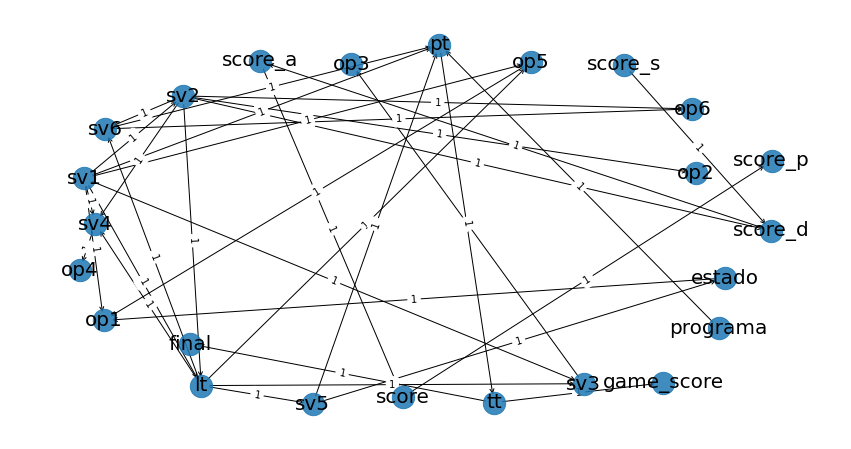

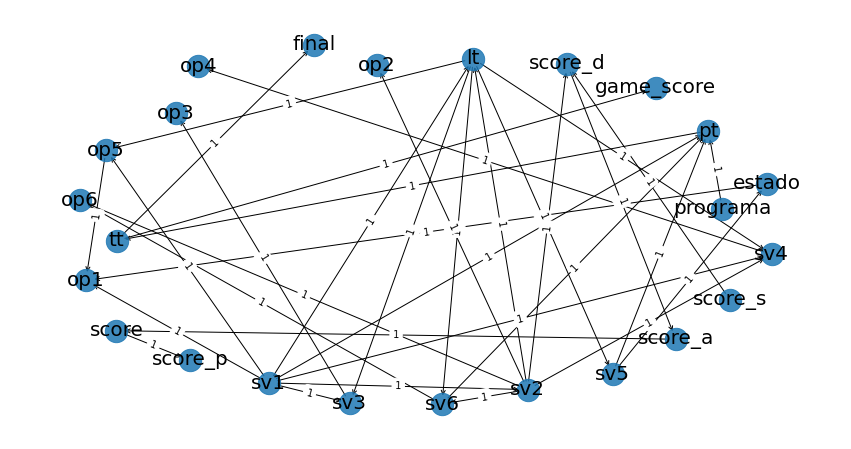

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

FILA N°: 15 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |     


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5, "final

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5, "fina




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fin




0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5590 |
+-----------+---------------+
| estado(1) |        0.4410 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3, "fin

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3, "fi





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "fin





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3, "fi






0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "fi






0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "programa":4, "fi







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "fin







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fi








0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3, "fin

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5092 |
+-----------+---------------+
| estado(1) |        0.4908 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5, "fi

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3, "fin

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "f

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:40, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5991 |
+-----------+---------------+
| estado(1) |        0.4009 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5079 |
+-----------+---------------+
| estado(1) |        0.4921 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5064 |
+-----------+---------------+
| estado(1) |        0.4936 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5557 |
+-----------+---------------+
| estado(1) |        0.4443 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TEST) Fold 2 Accuracy          : 0.8936170212765957
(TEST) Fold 2 Balanced Accuracy : 0.8936170212765957
(TEST) Fold 2 Precision Score   : 1.0
(TEST) Fold 2 Recall Score      : 0.8936170212765957
(TEST) Fold 2 ROC AUC           : 0.5
(TEST) Fold 2 Class Ratio       : 0.10638297872340426
FIN DE SECCION DE PRUEBAS, FOLD:  2
Elapsed time: 7451.2218718529 seconds.
INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  3
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


Finding Elimination Order: : : 0it [27:18, ?it/s]
Finding Elimination Order: : : 0it [25:07, ?it/s]
Finding Elimination Order: : : 0it [19:56, ?it/s]
Finding Elimination Order: : : 0it [17:45, ?it/s]
Finding Elimination Order: : : 0it [15:25, ?it/s]
Finding Elimination Order: : : 0it [14:14, ?it/s]


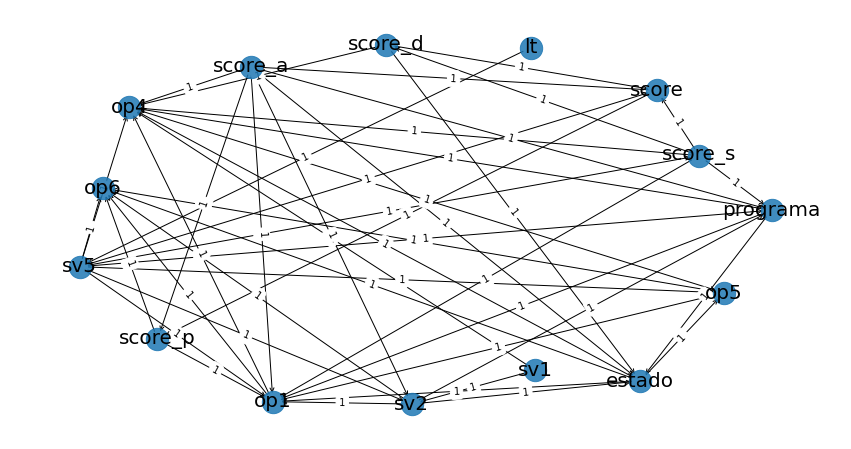

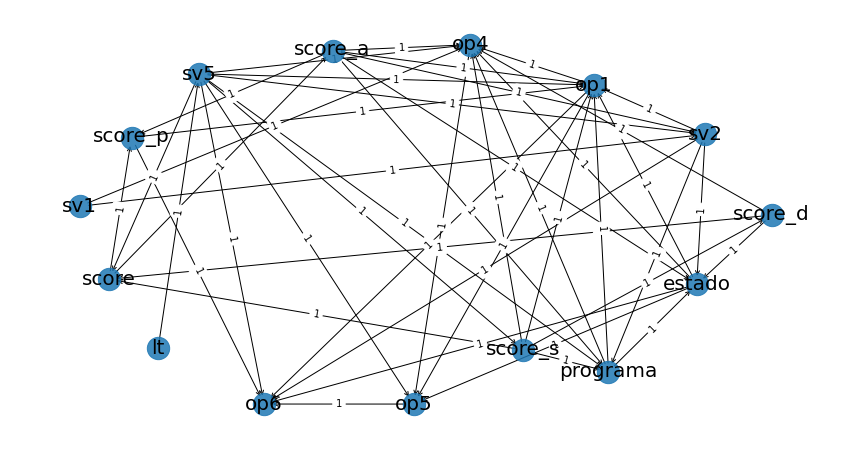

FILA N°: 1 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0358 |
+-----------+---------------+
| estado(1) |        0.9642 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0075 |
+-----------+---------------+
| estado(1) |        0.9925 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1392 |
+-----------+---------------+
| estado(1) |        0.8608 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1435 |
+-----------+---------------+
| estado(1) |        0.8565 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4204 |
+-----------+---------------+
| estado(1) |        0.5796 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0446 |
+-----------+---------------+
| estado(1) |        0.9554 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1103 |
+-----------+---------------+
| estado(1) |        0.8897 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0788 |
+-----------+---------------+
| estado(1) |        0.9212 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0766 |
+-----------+---------------+
| estado(1) |        0.9234 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0919 |
+-----------+---------------+
| estado(1) |        0.9081 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0279 |
+-----------+---------------+
| estado(1) |        0.9721 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2339 |
+-----------+---------------+
| estado(1) |        0.7661 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3945 |
+-----------+---------------+
| estado(1) |        0.6055 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1100 |
+-----------+---------------+
| estado(1) |        0.8900 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0183 |
+-----------+---------------+
| estado(1) |        0.9817 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2553 |
+-----------+---------------+
| estado(1) |        0.7447 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2896 |
+-----------+---------------+
| estado(1) |        0.7104 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0102 |
+-----------+---------------+
| estado(1) |        0.9898 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0353 |
+-----------+---------------+
| estado(1) |        0.9647 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0032 |
+-----------+---------------+
| estado(1) |        0.9968 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0327 |
+-----------+---------------+
| estado(1) |        0.9673 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0537 |
+-----------+---------------+
| estado(1) |        0.9463 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0041 |
+-----------+---------------+
| estado(1) |        0.9959 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2176 |
+-----------+---------------+
| estado(1) |        0.7824 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0720 |
+-----------+---------------+
| estado(1) |        0.9280 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4375 |
+-----------+---------------+
| estado(1) |        0.5625 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1195 |
+-----------+---------------+
| estado(1) |        0.8805 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2644 |
+-----------+---------------+
| estado(1) |        0.7356 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1134 |
+-----------+---------------+
| estado(1) |        0.8866 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0450 |
+-----------+---------------+
| estado(1) |        0.9550 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0672 |
+-----------+---------------+
| estado(1) |        0.9328 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3093 |
+-----------+---------------+
| estado(1) |        0.6907 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3051 |
+-----------+---------------+
| estado(1) |        0.6949 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0967 |
+-----------+---------------+
| estado(1) |        0.9033 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0033 |
+-----------+---------------+
| estado(1) |        0.9967 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0780 |
+-----------+---------------+
| estado(1) |        0.9220 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9047 |
+-----------+---------------+
| estado(1) |        0.0953 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9124 |
+-----------+---------------+
| estado(1) |        0.0876 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9390 |
+-----------+---------------+
| estado(1) |        0.0610 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5995 |
+-----------+---------------+
| estado(1) |        0.4005 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9199 |
+-----------+---------------+
| estado(1) |        0.0801 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9046 |
+-----------+---------------+
| estado(1) |        0.0954 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8931 |
+-----------+---------------+
| estado(1) |        0.1069 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8352 |
+-----------+---------------+
| estado(1) |        0.1648 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6626 |
+-----------+---------------+
| estado(1) |        0.3374 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9234 |
+-----------+---------------+
| estado(1) |        0.0766 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8761 |
+-----------+---------------+
| estado(1) |        0.1239 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9538 |
+-----------+---------------+
| estado(1) |        0.0462 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9820 |
+-----------+---------------+
| estado(1) |        0.0180 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"lt":4.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8588 |
+-----------+---------------+
| estado(1) |        0.1412 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9500 |
+-----------+---------------+
| estado(1) |        0.0500 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9385 |
+-----------+---------------+
| estado(1) |        0.0615 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8969 |
+-----------+---------------+
| estado(1) |        0.1031 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6106 |
+-----------+---------------+
| estado(1) |        0.3894 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9297 |
+-----------+---------------+
| estado(1) |        0.0703 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":4.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9733 |
+-----------+---------------+
| estado(1) |        0.0267 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5696 |
+-----------+---------------+
| estado(1) |        0.4304 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9896 |
+-----------+---------------+
| estado(1) |        0.0104 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9293 |
+-----------+---------------+
| estado(1) |        0.0707 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9950 |
+-----------+---------------+
| estado(1) |        0.0050 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8019 |
+-----------+---------------+
| estado(1) |        0.1981 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9960 |
+-----------+---------------+
| estado(1) |        0.0040 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7303 |
+-----------+---------------+
| estado(1) |        0.2697 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9336 |
+-----------+---------------+
| estado(1) |        0.0664 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9522 |
+-----------+---------------+
| estado(1) |        0.0478 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8976 |
+-----------+---------------+
| estado(1) |        0.1024 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6059 |
+-----------+---------------+
| estado(1) |        0.3941 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9505 |
+-----------+---------------+
| estado(1) |        0.0495 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8580 |
+-----------+---------------+
| estado(1) |        0.1420 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7240 |
+-----------+---------------+
| estado(1) |        0.2760 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9752 |
+-----------+---------------+
| estado(1) |        0.0248 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9639 |
+-----------+---------------+
| estado(1) |        0.0361 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7184 |
+-----------+---------------+
| estado(1) |        0.2816 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9407 |
+-----------+---------------+
| estado(1) |        0.0593 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9828 |
+-----------+---------------+
| estado(1) |        0.0172 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9486 |
+-----------+---------------+
| estado(1) |        0.0514 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9538 |
+-----------+---------------+
| estado(1) |        0.0462 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6336 |
+-----------+---------------+
| estado(1) |        0.3664 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9274 |
+-----------+---------------+
| estado(1) |        0.0726 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8610 |
+-----------+---------------+
| estado(1) |        0.1390 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8808 |
+-----------+---------------+
| estado(1) |        0.1192 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9738 |
+-----------+---------------+
| estado(1) |        0.0262 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8697 |
+-----------+---------------+
| estado(1) |        0.1303 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9807 |
+-----------+---------------+
| estado(1) |        0.0193 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7040 |
+-----------+---------------+
| estado(1) |        0.2960 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9902 |
+-----------+---------------+
| estado(1) |        0.0098 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8259 |
+-----------+---------------+
| estado(1) |        0.1741 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8823 |
+-----------+---------------+
| estado(1) |        0.1177 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8531 |
+-----------+---------------+
| estado(1) |        0.1469 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9491 |
+-----------+---------------+
| estado(1) |        0.0509 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9462 |
+-----------+---------------+
| estado(1) |        0.0538 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5301 |
+-----------+---------------+
| estado(1) |        0.4699 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8774 |
+-----------+---------------+
| estado(1) |        0.1226 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6852 |
+-----------+---------------+
| estado(1) |        0.3148 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9785 |
+-----------+---------------+
| estado(1) |        0.0215 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9285 |
+-----------+---------------+
| estado(1) |        0.0715 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9839 |
+-----------+---------------+
| estado(1) |        0.0161 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8326 |
+-----------+---------------+
| estado(1) |        0.1674 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9467 |
+-----------+---------------+
| estado(1) |        0.0533 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6531 |
+-----------+---------------+
| estado(1) |        0.3469 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8372 |
+-----------+---------------+
| estado(1) |        0.1628 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9987 |
+-----------+---------------+
| estado(1) |        0.0013 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2012 |
+-----------+---------------+
| estado(1) |        0.7988 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9889 |
+-----------+---------------+
| estado(1) |        0.0111 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9303 |
+-----------+---------------+
| estado(1) |        0.0697 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9540 |
+-----------+---------------+
| estado(1) |        0.0460 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8222 |
+-----------+---------------+
| estado(1) |        0.1778 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9416 |
+-----------+---------------+
| estado(1) |        0.0584 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8866 |
+-----------+---------------+
| estado(1) |        0.1134 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9651 |
+-----------+---------------+
| estado(1) |        0.0349 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9349 |
+-----------+---------------+
| estado(1) |        0.0651 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5069 |
+-----------+---------------+
| estado(1) |        0.4931 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9047 |
+-----------+---------------+
| estado(1) |        0.0953 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9721 |
+-----------+---------------+
| estado(1) |        0.0279 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9625 |
+-----------+---------------+
| estado(1) |        0.0375 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9493 |
+-----------+---------------+
| estado(1) |        0.0507 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9298 |
+-----------+---------------+
| estado(1) |        0.0702 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8629 |
+-----------+---------------+
| estado(1) |        0.1371 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9354 |
+-----------+---------------+
| estado(1) |        0.0646 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9793 |
+-----------+---------------+
| estado(1) |        0.0207 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9499 |
+-----------+---------------+
| estado(1) |        0.0501 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9980 |
+-----------+---------------+
| estado(1) |        0.0020 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6989 |
+-----------+---------------+
| estado(1) |        0.3011 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9025 |
+-----------+---------------+
| estado(1) |        0.0975 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8693 |
+-----------+---------------+
| estado(1) |        0.1307 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8902 |
+-----------+---------------+
| estado(1) |        0.1098 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7547 |
+-----------+---------------+
| estado(1) |        0.2453 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7855 |
+-----------+---------------+
| estado(1) |        0.2145 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8055 |
+-----------+---------------+
| estado(1) |        0.1945 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7370 |
+-----------+---------------+
| estado(1) |        0.2630 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9529 |
+-----------+---------------+
| estado(1) |        0.0471 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9499 |
+-----------+---------------+
| estado(1) |        0.0501 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3054 |
+-----------+---------------+
| estado(1) |        0.6946 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9385 |
+-----------+---------------+
| estado(1) |        0.0615 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8366 |
+-----------+---------------+
| estado(1) |        0.1634 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9253 |
+-----------+---------------+
| estado(1) |        0.0747 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8980 |
+-----------+---------------+
| estado(1) |        0.1020 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6190 |
+-----------+---------------+
| estado(1) |        0.3810 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9627 |
+-----------+---------------+
| estado(1) |        0.0373 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3222 |
+-----------+---------------+
| estado(1) |        0.6778 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9875 |
+-----------+---------------+
| estado(1) |        0.0125 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9113 |
+-----------+---------------+
| estado(1) |        0.0887 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9472 |
+-----------+---------------+
| estado(1) |        0.0528 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8826 |
+-----------+---------------+
| estado(1) |        0.1174 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9235 |
+-----------+---------------+
| estado(1) |        0.0765 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9280 |
+-----------+---------------+
| estado(1) |        0.0720 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6515 |
+-----------+---------------+
| estado(1) |        0.3485 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9265 |
+-----------+---------------+
| estado(1) |        0.0735 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9648 |
+-----------+---------------+
| estado(1) |        0.0352 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9493 |
+-----------+---------------+
| estado(1) |        0.0507 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9710 |
+-----------+---------------+
| estado(1) |        0.0290 |
+-----------+---------------+
FILA N°: 155 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8595 |
+-----------+---------------+
| estado(1) |        0.1405 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9312 |
+-----------+---------------+
| estado(1) |        0.0688 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9836 |
+-----------+---------------+
| estado(1) |        0.0164 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8515 |
+-----------+---------------+
| estado(1) |        0.1485 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7363 |
+-----------+---------------+
| estado(1) |        0.2637 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9019 |
+-----------+---------------+
| estado(1) |        0.0981 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8489 |
+-----------+---------------+
| estado(1) |        0.1511 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8470 |
+-----------+---------------+
| estado(1) |        0.1530 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5981 |
+-----------+---------------+
| estado(1) |        0.4019 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3684 |
+-----------+---------------+
| estado(1) |        0.6316 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6754 |
+-----------+---------------+
| estado(1) |        0.3246 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9062 |
+-----------+---------------+
| estado(1) |        0.0938 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9506 |
+-----------+---------------+
| estado(1) |        0.0494 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8926 |
+-----------+---------------+
| estado(1) |        0.1074 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9265 |
+-----------+---------------+
| estado(1) |        0.0735 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9938 |
+-----------+---------------+
| estado(1) |        0.0062 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9296 |
+-----------+---------------+
| estado(1) |        0.0704 |
+-----------+---------------+
FILA N°: 172 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8286 |
+-----------+---------------+
| estado(1) |        0.1714 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7816 |
+-----------+---------------+
| estado(1) |        0.2184 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9947 |
+-----------+---------------+
| estado(1) |        0.0053 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4261 |
+-----------+---------------+
| estado(1) |        0.5739 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv5":1, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9023 |
+-----------+---------------+
| estado(1) |        0.0977 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9038 |
+-----------+---------------+
| estado(1) |        0.0962 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8606 |
+-----------+---------------+
| estado(1) |        0.1394 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9666 |
+-----------+---------------+
| estado(1) |        0.0334 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9773 |
+-----------+---------------+
| estado(1) |        0.0227 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9134 |
+-----------+---------------+
| estado(1) |        0.0866 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9992 |
+-----------+---------------+
| estado(1) |        0.0008 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8675 |
+-----------+---------------+
| estado(1) |        0.1325 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8567 |
+-----------+---------------+
| estado(1) |        0.1433 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6179 |
+-----------+---------------+
| estado(1) |        0.3821 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9383 |
+-----------+---------------+
| estado(1) |        0.0617 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9500 |
+-----------+---------------+
| estado(1) |        0.0500 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9647 |
+-----------+---------------+
| estado(1) |        0.0353 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6969 |
+-----------+---------------+
| estado(1) |        0.3031 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8709 |
+-----------+---------------+
| estado(1) |        0.1291 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7967 |
+-----------+---------------+
| estado(1) |        0.2033 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8948 |
+-----------+---------------+
| estado(1) |        0.1052 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7918 |
+-----------+---------------+
| estado(1) |        0.2082 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9820 |
+-----------+---------------+
| estado(1) |        0.0180 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7143 |
+-----------+---------------+
| estado(1) |        0.2857 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9903 |
+-----------+---------------+
| estado(1) |        0.0097 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9982 |
+-----------+---------------+
| estado(1) |        0.0018 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9778 |
+-----------+---------------+
| estado(1) |        0.0222 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9080 |
+-----------+---------------+
| estado(1) |        0.0920 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9835 |
+-----------+---------------+
| estado(1) |        0.0165 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8965 |
+-----------+---------------+
| estado(1) |        0.1035 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8319 |
+-----------+---------------+
| estado(1) |        0.1681 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9308 |
+-----------+---------------+
| estado(1) |        0.0692 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7703 |
+-----------+---------------+
| estado(1) |        0.2297 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9393 |
+-----------+---------------+
| estado(1) |        0.0607 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8982 |
+-----------+---------------+
| estado(1) |        0.1018 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9655 |
+-----------+---------------+
| estado(1) |        0.0345 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9599 |
+-----------+---------------+
| estado(1) |        0.0401 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8168 |
+-----------+---------------+
| estado(1) |        0.1832 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9167 |
+-----------+---------------+
| estado(1) |        0.0833 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8478 |
+-----------+---------------+
| estado(1) |        0.1522 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6529 |
+-----------+---------------+
| estado(1) |        0.3471 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8178 |
+-----------+---------------+
| estado(1) |        0.1822 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9836 |
+-----------+---------------+
| estado(1) |        0.0164 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9355 |
+-----------+---------------+
| estado(1) |        0.0645 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4007 |
+-----------+---------------+
| estado(1) |        0.5993 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9292 |
+-----------+---------------+
| estado(1) |        0.0708 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7918 |
+-----------+---------------+
| estado(1) |        0.2082 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7424 |
+-----------+---------------+
| estado(1) |        0.2576 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"lt":4.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8878 |
+-----------+---------------+
| estado(1) |        0.1122 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9456 |
+-----------+---------------+
| estado(1) |        0.0544 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7435 |
+-----------+---------------+
| estado(1) |        0.2565 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9395 |
+-----------+---------------+
| estado(1) |        0.0605 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9303 |
+-----------+---------------+
| estado(1) |        0.0697 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8184 |
+-----------+---------------+
| estado(1) |        0.1816 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9342 |
+-----------+---------------+
| estado(1) |        0.0658 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8287 |
+-----------+---------------+
| estado(1) |        0.1713 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8396 |
+-----------+---------------+
| estado(1) |        0.1604 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5958 |
+-----------+---------------+
| estado(1) |        0.4042 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9611 |
+-----------+---------------+
| estado(1) |        0.0389 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2576 |
+-----------+---------------+
| estado(1) |        0.7424 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8177 |
+-----------+---------------+
| estado(1) |        0.1823 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9133 |
+-----------+---------------+
| estado(1) |        0.0867 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6983 |
+-----------+---------------+
| estado(1) |        0.3017 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9107 |
+-----------+---------------+
| estado(1) |        0.0893 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8336 |
+-----------+---------------+
| estado(1) |        0.1664 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8871 |
+-----------+---------------+
| estado(1) |        0.1129 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9357 |
+-----------+---------------+
| estado(1) |        0.0643 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9233 |
+-----------+---------------+
| estado(1) |        0.0767 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8209 |
+-----------+---------------+
| estado(1) |        0.1791 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8342 |
+-----------+---------------+
| estado(1) |        0.1658 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9344 |
+-----------+---------------+
| estado(1) |        0.0656 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6517 |
+-----------+---------------+
| estado(1) |        0.3483 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9802 |
+-----------+---------------+
| estado(1) |        0.0198 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8080 |
+-----------+---------------+
| estado(1) |        0.1920 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9642 |
+-----------+---------------+
| estado(1) |        0.0358 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9032 |
+-----------+---------------+
| estado(1) |        0.0968 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9786 |
+-----------+---------------+
| estado(1) |        0.0214 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9574 |
+-----------+---------------+
| estado(1) |        0.0426 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9354 |
+-----------+---------------+
| estado(1) |        0.0646 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9469 |
+-----------+---------------+
| estado(1) |        0.0531 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9890 |
+-----------+---------------+
| estado(1) |        0.0110 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9354 |
+-----------+---------------+
| estado(1) |        0.0646 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3695 |
+-----------+---------------+
| estado(1) |        0.6305 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9407 |
+-----------+---------------+
| estado(1) |        0.0593 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9598 |
+-----------+---------------+
| estado(1) |        0.0402 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9111 |
+-----------+---------------+
| estado(1) |        0.0889 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4085 |
+-----------+---------------+
| estado(1) |        0.5915 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8765 |
+-----------+---------------+
| estado(1) |        0.1235 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9491 |
+-----------+---------------+
| estado(1) |        0.0509 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8965 |
+-----------+---------------+
| estado(1) |        0.1035 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv5":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9497 |
+-----------+---------------+
| estado(1) |        0.0503 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9345 |
+-----------+---------------+
| estado(1) |        0.0655 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9639 |
+-----------+---------------+
| estado(1) |        0.0361 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9812 |
+-----------+---------------+
| estado(1) |        0.0188 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8561 |
+-----------+---------------+
| estado(1) |        0.1439 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6439 |
+-----------+---------------+
| estado(1) |        0.3561 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8731 |
+-----------+---------------+
| estado(1) |        0.1269 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9119 |
+-----------+---------------+
| estado(1) |        0.0881 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3405 |
+-----------+---------------+
| estado(1) |        0.6595 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5456 |
+-----------+---------------+
| estado(1) |        0.4544 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7642 |
+-----------+---------------+
| estado(1) |        0.2358 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8448 |
+-----------+---------------+
| estado(1) |        0.1552 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9481 |
+-----------+---------------+
| estado(1) |        0.0519 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3492 |
+-----------+---------------+
| estado(1) |        0.6508 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7040 |
+-----------+---------------+
| estado(1) |        0.2960 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8003 |
+-----------+---------------+
| estado(1) |        0.1997 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9678 |
+-----------+---------------+
| estado(1) |        0.0322 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9543 |
+-----------+---------------+
| estado(1) |        0.0457 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7489 |
+-----------+---------------+
| estado(1) |        0.2511 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4320 |
+-----------+---------------+
| estado(1) |        0.5680 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9846 |
+-----------+---------------+
| estado(1) |        0.0154 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9473 |
+-----------+---------------+
| estado(1) |        0.0527 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7561 |
+-----------+---------------+
| estado(1) |        0.2439 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5807 |
+-----------+---------------+
| estado(1) |        0.4193 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9990 |
+-----------+---------------+
| estado(1) |        0.0010 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9025 |
+-----------+---------------+
| estado(1) |        0.0975 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9262 |
+-----------+---------------+
| estado(1) |        0.0738 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7802 |
+-----------+---------------+
| estado(1) |        0.2198 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9574 |
+-----------+---------------+
| estado(1) |        0.0426 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6867 |
+-----------+---------------+
| estado(1) |        0.3133 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5072 |
+-----------+---------------+
| estado(1) |        0.4928 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8165 |
+-----------+---------------+
| estado(1) |        0.1835 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7988 |
+-----------+---------------+
| estado(1) |        0.2012 |
+-----------+---------------+
FILA N°: 295 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9223 |
+-----------+---------------+
| estado(1) |        0.0777 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8522 |
+-----------+---------------+
| estado(1) |        0.1478 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8823 |
+-----------+---------------+
| estado(1) |        0.1177 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9666 |
+-----------+---------------+
| estado(1) |        0.0334 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9985 |
+-----------+---------------+
| estado(1) |        0.0015 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2436 |
+-----------+---------------+
| estado(1) |        0.7564 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9203 |
+-----------+---------------+
| estado(1) |        0.0797 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8724 |
+-----------+---------------+
| estado(1) |        0.1276 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8701 |
+-----------+---------------+
| estado(1) |        0.1299 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8010 |
+-----------+---------------+
| estado(1) |        0.1990 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9768 |
+-----------+---------------+
| estado(1) |        0.0232 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8356 |
+-----------+---------------+
| estado(1) |        0.1644 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9818 |
+-----------+---------------+
| estado(1) |        0.0182 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9552 |
+-----------+---------------+
| estado(1) |        0.0448 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8433 |
+-----------+---------------+
| estado(1) |        0.1567 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6660 |
+-----------+---------------+
| estado(1) |        0.3340 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9378 |
+-----------+---------------+
| estado(1) |        0.0622 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3001 |
+-----------+---------------+
| estado(1) |        0.6999 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6827 |
+-----------+---------------+
| estado(1) |        0.3173 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7691 |
+-----------+---------------+
| estado(1) |        0.2309 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8964 |
+-----------+---------------+
| estado(1) |        0.1036 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2601 |
+-----------+---------------+
| estado(1) |        0.7399 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7443 |
+-----------+---------------+
| estado(1) |        0.2557 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6849 |
+-----------+---------------+
| estado(1) |        0.3151 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9725 |
+-----------+---------------+
| estado(1) |        0.0275 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9781 |
+-----------+---------------+
| estado(1) |        0.0219 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7704 |
+-----------+---------------+
| estado(1) |        0.2296 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9738 |
+-----------+---------------+
| estado(1) |        0.0262 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8022 |
+-----------+---------------+
| estado(1) |        0.1978 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8837 |
+-----------+---------------+
| estado(1) |        0.1163 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6717 |
+-----------+---------------+
| estado(1) |        0.3283 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9895 |
+-----------+---------------+
| estado(1) |        0.0105 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9609 |
+-----------+---------------+
| estado(1) |        0.0391 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9224 |
+-----------+---------------+
| estado(1) |        0.0776 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9817 |
+-----------+---------------+
| estado(1) |        0.0183 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6865 |
+-----------+---------------+
| estado(1) |        0.3135 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9792 |
+-----------+---------------+
| estado(1) |        0.0208 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6395 |
+-----------+---------------+
| estado(1) |        0.3605 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9617 |
+-----------+---------------+
| estado(1) |        0.0383 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6002 |
+-----------+---------------+
| estado(1) |        0.3998 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9855 |
+-----------+---------------+
| estado(1) |        0.0145 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9811 |
+-----------+---------------+
| estado(1) |        0.0189 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9499 |
+-----------+---------------+
| estado(1) |        0.0501 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8828 |
+-----------+---------------+
| estado(1) |        0.1172 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":3.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8774 |
+-----------+---------------+
| estado(1) |        0.1226 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6848 |
+-----------+---------------+
| estado(1) |        0.3152 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8318 |
+-----------+---------------+
| estado(1) |        0.1682 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9141 |
+-----------+---------------+
| estado(1) |        0.0859 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8662 |
+-----------+---------------+
| estado(1) |        0.1338 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9849 |
+-----------+---------------+
| estado(1) |        0.0151 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1453 |
+-----------+---------------+
| estado(1) |        0.8547 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9351 |
+-----------+---------------+
| estado(1) |        0.0649 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7927 |
+-----------+---------------+
| estado(1) |        0.2073 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7713 |
+-----------+---------------+
| estado(1) |        0.2287 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9719 |
+-----------+---------------+
| estado(1) |        0.0281 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9697 |
+-----------+---------------+
| estado(1) |        0.0303 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9779 |
+-----------+---------------+
| estado(1) |        0.0221 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9850 |
+-----------+---------------+
| estado(1) |        0.0150 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9731 |
+-----------+---------------+
| estado(1) |        0.0269 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9664 |
+-----------+---------------+
| estado(1) |        0.0336 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9989 |
+-----------+---------------+
| estado(1) |        0.0011 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8416 |
+-----------+---------------+
| estado(1) |        0.1584 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5875 |
+-----------+---------------+
| estado(1) |        0.4125 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9526 |
+-----------+---------------+
| estado(1) |        0.0474 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9950 |
+-----------+---------------+
| estado(1) |        0.0050 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9725 |
+-----------+---------------+
| estado(1) |        0.0275 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9753 |
+-----------+---------------+
| estado(1) |        0.0247 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8899 |
+-----------+---------------+
| estado(1) |        0.1101 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8469 |
+-----------+---------------+
| estado(1) |        0.1531 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9224 |
+-----------+---------------+
| estado(1) |        0.0776 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8965 |
+-----------+---------------+
| estado(1) |        0.1035 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9084 |
+-----------+---------------+
| estado(1) |        0.0916 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9594 |
+-----------+---------------+
| estado(1) |        0.0406 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9757 |
+-----------+---------------+
| estado(1) |        0.0243 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7691 |
+-----------+---------------+
| estado(1) |        0.2309 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9887 |
+-----------+---------------+
| estado(1) |        0.0113 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv5":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7745 |
+-----------+---------------+
| estado(1) |        0.2255 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8657 |
+-----------+---------------+
| estado(1) |        0.1343 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9499 |
+-----------+---------------+
| estado(1) |        0.0501 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9792 |
+-----------+---------------+
| estado(1) |        0.0208 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.2457136731940301, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0635 |
+-----------+---------------+
| estado(1) |        0.9365 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0228 |
+-----------+---------------+
| estado(1) |        0.9772 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"lt":0.8943723110114464, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0659 |
+-----------+---------------+
| estado(1) |        0.9341 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":1.727042650077281, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":1.5933892787926554, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1218 |
+-----------+---------------+
| estado(1) |        0.8782 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0450 |
+-----------+---------------+
| estado(1) |        0.9550 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"lt":0.3175593769595333, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0703 |
+-----------+---------------+
| estado(1) |        0.9297 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.07175487700469052, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1937 |
+-----------+---------------+
| estado(1) |        0.8063 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0046 |
+-----------+---------------+
| estado(1) |        0.9954 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0220 |
+-----------+---------------+
| estado(1) |        0.9780 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":1.7008142823069314, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0333 |
+-----------+---------------+
| estado(1) |        0.9667 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0062 |
+-----------+---------------+
| estado(1) |        0.9938 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0074 |
+-----------+---------------+
| estado(1) |        0.9926 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0524 |
+-----------+---------------+
| estado(1) |        0.9476 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0054 |
+-----------+---------------+
| estado(1) |        0.9946 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":1.321605661157375, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0904 |
+-----------+---------------+
| estado(1) |        0.9096 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0726 |
+-----------+---------------+
| estado(1) |        0.9274 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0445 |
+-----------+---------------+
| estado(1) |        0.9555 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.13652851007479194, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0703 |
+-----------+---------------+
| estado(1) |        0.9297 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":0.46855363204787737, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0039 |
+-----------+---------------+
| estado(1) |        0.9961 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0282 |
+-----------+---------------+
| estado(1) |        0.9718 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0524 |
+-----------+---------------+
| estado(1) |        0.9476 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0343 |
+-----------+---------------+
| estado(1) |        0.9657 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":1.2473986481625743, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0259 |
+-----------+---------------+
| estado(1) |        0.9741 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1098 |
+-----------+---------------+
| estado(1) |        0.8902 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":0.8054754545695614, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0418 |
+-----------+---------------+
| estado(1) |        0.9582 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":1.5258113628806915, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0919 |
+-----------+---------------+
| estado(1) |        0.9081 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.11636399883079551, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0703 |
+-----------+---------------+
| estado(1) |        0.9297 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":1.0646730177224377, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":1.1166060863801412, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0488 |
+-----------+---------------+
| estado(1) |        0.9512 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0726 |
+-----------+---------------+
| estado(1) |        0.9274 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.47736909420884377, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1101 |
+-----------+---------------+
| estado(1) |        0.8899 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0327 |
+-----------+---------------+
| estado(1) |        0.9673 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0493 |
+-----------+---------------+
| estado(1) |        0.9507 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":1.9941880274202464, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":0.009464713858916785, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0418 |
+-----------+---------------+
| estado(1) |        0.9582 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0948 |
+-----------+---------------+
| estado(1) |        0.9052 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0488 |
+-----------+---------------+
| estado(1) |        0.9512 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1595 |
+-----------+---------------+
| estado(1) |        0.8405 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":1.1001010034517194, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0904 |
+-----------+---------------+
| estado(1) |        0.9096 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0327 |
+-----------+---------------+
| estado(1) |        0.9673 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":0.6030891830867928, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1663 |
+-----------+---------------+
| estado(1) |        0.8337 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":1.7343913714523627, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0446 |
+-----------+---------------+
| estado(1) |        0.9554 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":1.035274241630617, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0683 |
+-----------+---------------+
| estado(1) |        0.9317 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":1.128296200909204, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0255 |
+-----------+---------------+
| estado(1) |        0.9745 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0450 |
+-----------+---------------+
| estado(1) |        0.9550 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0726 |
+-----------+---------------+
| estado(1) |        0.9274 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":1.2156511845256452, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0672 |
+-----------+---------------+
| estado(1) |        0.9328 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1098 |
+-----------+---------------+
| estado(1) |        0.8902 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5301 |
+-----------+---------------+
| estado(1) |        0.4699 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.4453749905978084, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0188 |
+-----------+---------------+
| estado(1) |        0.9812 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0321 |
+-----------+---------------+
| estado(1) |        0.9679 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":1.6958284800152157, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0904 |
+-----------+---------------+
| estado(1) |        0.9096 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0052 |
+-----------+---------------+
| estado(1) |        0.9948 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.0865151477891205, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1514 |
+-----------+---------------+
| estado(1) |        0.8486 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0450 |
+-----------+---------------+
| estado(1) |        0.9550 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.5826082939697377, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3274 |
+-----------+---------------+
| estado(1) |        0.6726 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.8258257198079748, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0703 |
+-----------+---------------+
| estado(1) |        0.9297 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.2473391781541916, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1143 |
+-----------+---------------+
| estado(1) |        0.8857 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":1.751369881005445, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0306 |
+-----------+---------------+
| estado(1) |        0.9694 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.4396429821230351, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1004 |
+-----------+---------------+
| estado(1) |        0.8996 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.31210604826996824, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0188 |
+-----------+---------------+
| estado(1) |        0.9812 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0493 |
+-----------+---------------+
| estado(1) |        0.9507 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":0.9780359621459884, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0188 |
+-----------+---------------+
| estado(1) |        0.9812 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0919 |
+-----------+---------------+
| estado(1) |        0.9081 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0412 |
+-----------+---------------+
| estado(1) |        0.9588 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0445 |
+-----------+---------------+
| estado(1) |        0.9555 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1857 |
+-----------+---------------+
| estado(1) |        0.8143 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0948 |
+-----------+---------------+
| estado(1) |        0.9052 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":1.590481621244371, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1076 |
+-----------+---------------+
| estado(1) |        0.8924 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":0.6245349963741991, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3274 |
+-----------+---------------+
| estado(1) |        0.6726 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":0.3947879501768109, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0098 |
+-----------+---------------+
| estado(1) |        0.9902 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":0.18209604702157367, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0039 |
+-----------+---------------+
| estado(1) |        0.9961 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0524 |
+-----------+---------------+
| estado(1) |        0.9476 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6825 |
+-----------+---------------+
| estado(1) |        0.3175 |
+-----------+---------------+
FILA N°: 467 -> P("Estado" | [{"lt":0.9268668485570694, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0418 |
+-----------+---------------+
| estado(1) |        0.9582 |
+-----------+---------------+
FILA N°: 468 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 469 -> P("Estado" | [{"lt":0.2825420995960156, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6553 |
+-----------+---------------+
| estado(1) |        0.3447 |
+-----------+---------------+
FILA N°: 470 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0153 |
+-----------+---------------+
| estado(1) |        0.9847 |
+-----------+---------------+
FILA N°: 471 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1710 |
+-----------+---------------+
| estado(1) |        0.8290 |
+-----------+---------------+
FILA N°: 472 -> P("Estado" | [{"lt":0.1441823781110072, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0383 |
+-----------+---------------+
| estado(1) |        0.9617 |
+-----------+---------------+
FILA N°: 473 -> P("Estado" | [{"lt":1.2452683343401965, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0967 |
+-----------+---------------+
| estado(1) |        0.9033 |
+-----------+---------------+
FILA N°: 474 -> P("Estado" | [{"lt":1.368467097070249, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 475 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0228 |
+-----------+---------------+
| estado(1) |        0.9772 |
+-----------+---------------+
FILA N°: 476 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 477 -> P("Estado" | [{"lt":0.4195089489911248, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0098 |
+-----------+---------------+
| estado(1) |        0.9902 |
+-----------+---------------+
FILA N°: 478 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0717 |
+-----------+---------------+
| estado(1) |        0.9283 |
+-----------+---------------+
FILA N°: 479 -> P("Estado" | [{"lt":1.3359419796423642, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0967 |
+-----------+---------------+
| estado(1) |        0.9033 |
+-----------+---------------+
FILA N°: 480 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0493 |
+-----------+---------------+
| estado(1) |        0.9507 |
+-----------+---------------+
FILA N°: 481 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0608 |
+-----------+---------------+
| estado(1) |        0.9392 |
+-----------+---------------+
FILA N°: 482 -> P("Estado" | [{"lt":0.5185714510457251, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 483 -> P("Estado" | [{"lt":0.38908816515931055, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0188 |
+-----------+---------------+
| estado(1) |        0.9812 |
+-----------+---------------+
FILA N°: 484 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 485 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0173 |
+-----------+---------------+
| estado(1) |        0.9827 |
+-----------+---------------+
FILA N°: 486 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 487 -> P("Estado" | [{"lt":0.7778701022219844, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0383 |
+-----------+---------------+
| estado(1) |        0.9617 |
+-----------+---------------+
FILA N°: 488 -> P("Estado" | [{"lt":0.7724110953201597, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0188 |
+-----------+---------------+
| estado(1) |        0.9812 |
+-----------+---------------+
FILA N°: 489 -> P("Estado" | [{"lt":0.8276989344515637, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0595 |
+-----------+---------------+
| estado(1) |        0.9405 |
+-----------+---------------+
FILA N°: 490 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0488 |
+-----------+---------------+
| estado(1) |        0.9512 |
+-----------+---------------+
FILA N°: 491 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0153 |
+-----------+---------------+
| estado(1) |        0.9847 |
+-----------+---------------+
FILA N°: 492 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1333 |
+-----------+---------------+
| estado(1) |        0.8667 |
+-----------+---------------+
FILA N°: 493 -> P("Estado" | [{"lt":0.5228104723957024, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0659 |
+-----------+---------------+
| estado(1) |        0.9341 |
+-----------+---------------+
FILA N°: 494 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5989 |
+-----------+---------------+
| estado(1) |        0.4011 |
+-----------+---------------+
FILA N°: 495 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0029 |
+-----------+---------------+
| estado(1) |        0.9971 |
+-----------+---------------+
FILA N°: 496 -> P("Estado" | [{"lt":0.619500232155909, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 497 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0046 |
+-----------+---------------+
| estado(1) |        0.9954 |
+-----------+---------------+
FILA N°: 498 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1333 |
+-----------+---------------+
| estado(1) |        0.8667 |
+-----------+---------------+
FILA N°: 499 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 500 -> P("Estado" | [{"lt":0.9639443655747881, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1663 |
+-----------+---------------+
| estado(1) |        0.8337 |
+-----------+---------------+
FILA N°: 501 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0029 |
+-----------+---------------+
| estado(1) |        0.9971 |
+-----------+---------------+
FILA N°: 502 -> P("Estado" | [{"lt":1.642225986859481, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0306 |
+-----------+---------------+
| estado(1) |        0.9694 |
+-----------+---------------+
FILA N°: 503 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 504 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0450 |
+-----------+---------------+
| estado(1) |        0.9550 |
+-----------+---------------+
FILA N°: 505 -> P("Estado" | [{"lt":0.12510150944739418, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0039 |
+-----------+---------------+
| estado(1) |        0.9961 |
+-----------+---------------+
FILA N°: 506 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1595 |
+-----------+---------------+
| estado(1) |        0.8405 |
+-----------+---------------+
FILA N°: 507 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 508 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0220 |
+-----------+---------------+
| estado(1) |        0.9780 |
+-----------+---------------+
FILA N°: 509 -> P("Estado" | [{"lt":0.24389369025320728, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 510 -> P("Estado" | [{"lt":0.24966472596064138, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0418 |
+-----------+---------------+
| estado(1) |        0.9582 |
+-----------+---------------+
FILA N°: 511 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0052 |
+-----------+---------------+
| estado(1) |        0.9948 |
+-----------+---------------+
FILA N°: 512 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0016 |
+-----------+---------------+
| estado(1) |        0.9984 |
+-----------+---------------+
FILA N°: 513 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 514 -> P("Estado" | [{"lt":0.15087224090815443, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0184 |
+-----------+---------------+
| estado(1) |        0.9816 |
+-----------+---------------+
FILA N°: 515 -> P("Estado" | [{"lt":0.6276530852554023, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0565 |
+-----------+---------------+
| estado(1) |        0.9435 |
+-----------+---------------+
FILA N°: 516 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 517 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 518 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0153 |
+-----------+---------------+
| estado(1) |        0.9847 |
+-----------+---------------+
FILA N°: 519 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0041 |
+-----------+---------------+
| estado(1) |        0.9959 |
+-----------+---------------+
FILA N°: 520 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0216 |
+-----------+---------------+
| estado(1) |        0.9784 |
+-----------+---------------+
FILA N°: 521 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 522 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 523 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0717 |
+-----------+---------------+
| estado(1) |        0.9283 |
+-----------+---------------+
FILA N°: 524 -> P("Estado" | [{"lt":1.0447764821379883, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0672 |
+-----------+---------------+
| estado(1) |        0.9328 |
+-----------+---------------+
FILA N°: 525 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0726 |
+-----------+---------------+
| estado(1) |        0.9274 |
+-----------+---------------+
FILA N°: 526 -> P("Estado" | [{"lt":0.7296166731941891, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0255 |
+-----------+---------------+
| estado(1) |        0.9745 |
+-----------+---------------+
FILA N°: 527 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0394 |
+-----------+---------------+
| estado(1) |        0.9606 |
+-----------+---------------+
FILA N°: 528 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0054 |
+-----------+---------------+
| estado(1) |        0.9946 |
+-----------+---------------+
FILA N°: 529 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0016 |
+-----------+---------------+
| estado(1) |        0.9984 |
+-----------+---------------+
FILA N°: 530 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1101 |
+-----------+---------------+
| estado(1) |        0.8899 |
+-----------+---------------+
FILA N°: 531 -> P("Estado" | [{"lt":0.4578446357389303, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0255 |
+-----------+---------------+
| estado(1) |        0.9745 |
+-----------+---------------+
FILA N°: 532 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1101 |
+-----------+---------------+
| estado(1) |        0.8899 |
+-----------+---------------+
FILA N°: 533 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0016 |
+-----------+---------------+
| estado(1) |        0.9984 |
+-----------+---------------+
FILA N°: 534 -> P("Estado" | [{"lt":0.328744983411036, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2614 |
+-----------+---------------+
| estado(1) |        0.7386 |
+-----------+---------------+
FILA N°: 535 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0524 |
+-----------+---------------+
| estado(1) |        0.9476 |
+-----------+---------------+
FILA N°: 536 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1333 |
+-----------+---------------+
| estado(1) |        0.8667 |
+-----------+---------------+
FILA N°: 537 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3775 |
+-----------+---------------+
| estado(1) |        0.6225 |
+-----------+---------------+
FILA N°: 538 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3858 |
+-----------+---------------+
| estado(1) |        0.6142 |
+-----------+---------------+
FILA N°: 539 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0228 |
+-----------+---------------+
| estado(1) |        0.9772 |
+-----------+---------------+
FILA N°: 540 -> P("Estado" | [{"lt":1.8260892342356412, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0154 |
+-----------+---------------+
| estado(1) |        0.9846 |
+-----------+---------------+
FILA N°: 541 -> P("Estado" | [{"lt":1.3642918545101868, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 542 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0919 |
+-----------+---------------+
| estado(1) |        0.9081 |
+-----------+---------------+
FILA N°: 543 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1595 |
+-----------+---------------+
| estado(1) |        0.8405 |
+-----------+---------------+
FILA N°: 544 -> P("Estado" | [{"lt":0.29392304316298834, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 545 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1846 |
+-----------+---------------+
| estado(1) |        0.8154 |
+-----------+---------------+
FILA N°: 546 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0054 |
+-----------+---------------+
| estado(1) |        0.9946 |
+-----------+---------------+
FILA N°: 547 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 548 -> P("Estado" | [{"lt":0.24954998773831205, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 549 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0279 |
+-----------+---------------+
| estado(1) |        0.9721 |
+-----------+---------------+
FILA N°: 550 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0285 |
+-----------+---------------+
| estado(1) |        0.9715 |
+-----------+---------------+
FILA N°: 551 -> P("Estado" | [{"lt":0.6078971415268062, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0255 |
+-----------+---------------+
| estado(1) |        0.9745 |
+-----------+---------------+
FILA N°: 552 -> P("Estado" | [{"lt":0.2663739804985167, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0383 |
+-----------+---------------+
| estado(1) |        0.9617 |
+-----------+---------------+
FILA N°: 553 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0110 |
+-----------+---------------+
| estado(1) |        0.9890 |
+-----------+---------------+
FILA N°: 554 -> P("Estado" | [{"lt":0.19193545308402715, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0693 |
+-----------+---------------+
| estado(1) |        0.9307 |
+-----------+---------------+
FILA N°: 555 -> P("Estado" | [{"lt":0.09307413593453284, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0693 |
+-----------+---------------+
| estado(1) |        0.9307 |
+-----------+---------------+
FILA N°: 556 -> P("Estado" | [{"lt":0.4997497909146845, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0098 |
+-----------+---------------+
| estado(1) |        0.9902 |
+-----------+---------------+
FILA N°: 557 -> P("Estado" | [{"lt":1.9958824303049134, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2176 |
+-----------+---------------+
| estado(1) |        0.7824 |
+-----------+---------------+
FILA N°: 558 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1143 |
+-----------+---------------+
| estado(1) |        0.8857 |
+-----------+---------------+
FILA N°: 559 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0052 |
+-----------+---------------+
| estado(1) |        0.9948 |
+-----------+---------------+
FILA N°: 560 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0173 |
+-----------+---------------+
| estado(1) |        0.9827 |
+-----------+---------------+
FILA N°: 561 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0608 |
+-----------+---------------+
| estado(1) |        0.9392 |
+-----------+---------------+
FILA N°: 562 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1143 |
+-----------+---------------+
| estado(1) |        0.8857 |
+-----------+---------------+
FILA N°: 563 -> P("Estado" | [{"lt":1.5744274760111283, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 564 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0450 |
+-----------+---------------+
| estado(1) |        0.9550 |
+-----------+---------------+
FILA N°: 565 -> P("Estado" | [{"lt":0.07730141228254905, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 566 -> P("Estado" | [{"lt":0.08454345586979894, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0039 |
+-----------+---------------+
| estado(1) |        0.9961 |
+-----------+---------------+
FILA N°: 567 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0054 |
+-----------+---------------+
| estado(1) |        0.9946 |
+-----------+---------------+
FILA N°: 568 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0493 |
+-----------+---------------+
| estado(1) |        0.9507 |
+-----------+---------------+
FILA N°: 569 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0054 |
+-----------+---------------+
| estado(1) |        0.9946 |
+-----------+---------------+
FILA N°: 570 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0450 |
+-----------+---------------+
| estado(1) |        0.9550 |
+-----------+---------------+
FILA N°: 571 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0743 |
+-----------+---------------+
| estado(1) |        0.9257 |
+-----------+---------------+
FILA N°: 572 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0029 |
+-----------+---------------+
| estado(1) |        0.9971 |
+-----------+---------------+
FILA N°: 573 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0726 |
+-----------+---------------+
| estado(1) |        0.9274 |
+-----------+---------------+
FILA N°: 574 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0493 |
+-----------+---------------+
| estado(1) |        0.9507 |
+-----------+---------------+
FILA N°: 575 -> P("Estado" | [{"lt":0.45249510076500976, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0039 |
+-----------+---------------+
| estado(1) |        0.9961 |
+-----------+---------------+
FILA N°: 576 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0702 |
+-----------+---------------+
| estado(1) |        0.9298 |
+-----------+---------------+
FILA N°: 577 -> P("Estado" | [{"lt":0.6879239059116209, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 578 -> P("Estado" | [{"lt":0.40417274615286436, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3274 |
+-----------+---------------+
| estado(1) |        0.6726 |
+-----------+---------------+
FILA N°: 579 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 580 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0412 |
+-----------+---------------+
| estado(1) |        0.9588 |
+-----------+---------------+
FILA N°: 581 -> P("Estado" | [{"lt":1.9699266333699057, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 582 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2885 |
+-----------+---------------+
| estado(1) |        0.7115 |
+-----------+---------------+
FILA N°: 583 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0327 |
+-----------+---------------+
| estado(1) |        0.9673 |
+-----------+---------------+
FILA N°: 584 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0475 |
+-----------+---------------+
| estado(1) |        0.9525 |
+-----------+---------------+
FILA N°: 585 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0488 |
+-----------+---------------+
| estado(1) |        0.9512 |
+-----------+---------------+
FILA N°: 586 -> P("Estado" | [{"lt":1.2954690713851726, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1206 |
+-----------+---------------+
| estado(1) |        0.8794 |
+-----------+---------------+
FILA N°: 587 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1684 |
+-----------+---------------+
| estado(1) |        0.8316 |
+-----------+---------------+
FILA N°: 588 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0282 |
+-----------+---------------+
| estado(1) |        0.9718 |
+-----------+---------------+
FILA N°: 589 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1143 |
+-----------+---------------+
| estado(1) |        0.8857 |
+-----------+---------------+
FILA N°: 590 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0041 |
+-----------+---------------+
| estado(1) |        0.9959 |
+-----------+---------------+
FILA N°: 591 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 592 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1076 |
+-----------+---------------+
| estado(1) |        0.8924 |
+-----------+---------------+
FILA N°: 593 -> P("Estado" | [{"lt":1.4649771460425147, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 594 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1710 |
+-----------+---------------+
| estado(1) |        0.8290 |
+-----------+---------------+
FILA N°: 595 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0948 |
+-----------+---------------+
| estado(1) |        0.9052 |
+-----------+---------------+
FILA N°: 596 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0717 |
+-----------+---------------+
| estado(1) |        0.9283 |
+-----------+---------------+
FILA N°: 597 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0220 |
+-----------+---------------+
| estado(1) |        0.9780 |
+-----------+---------------+
FILA N°: 598 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5989 |
+-----------+---------------+
| estado(1) |        0.4011 |
+-----------+---------------+
FILA N°: 599 -> P("Estado" | [{"lt":1.0907007246440783, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0188 |
+-----------+---------------+
| estado(1) |        0.9812 |
+-----------+---------------+
FILA N°: 600 -> P("Estado" | [{"lt":1.2581224743545318, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0306 |
+-----------+---------------+
| estado(1) |        0.9694 |
+-----------+---------------+
FILA N°: 601 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1045 |
+-----------+---------------+
| estado(1) |        0.8955 |
+-----------+---------------+
FILA N°: 602 -> P("Estado" | [{"lt":0.37372100412303577, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0039 |
+-----------+---------------+
| estado(1) |        0.9961 |
+-----------+---------------+
FILA N°: 603 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 604 -> P("Estado" | [{"lt":1.8341112175249163, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0279 |
+-----------+---------------+
| estado(1) |        0.9721 |
+-----------+---------------+
FILA N°: 605 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0967 |
+-----------+---------------+
| estado(1) |        0.9033 |
+-----------+---------------+
FILA N°: 606 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0067 |
+-----------+---------------+
| estado(1) |        0.9933 |
+-----------+---------------+
FILA N°: 607 -> P("Estado" | [{"lt":1.1260414447046179, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0014 |
+-----------+---------------+
| estado(1) |        0.9986 |
+-----------+---------------+
FILA N°: 608 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0037 |
+-----------+---------------+
| estado(1) |        0.9963 |
+-----------+---------------+
FILA N°: 609 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0726 |
+-----------+---------------+
| estado(1) |        0.9274 |
+-----------+---------------+
FILA N°: 610 -> P("Estado" | [{"lt":0.25765354331232515, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0693 |
+-----------+---------------+
| estado(1) |        0.9307 |
+-----------+---------------+
FILA N°: 611 -> P("Estado" | [{"lt":1.866329926072663, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 612 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0608 |
+-----------+---------------+
| estado(1) |        0.9392 |
+-----------+---------------+
FILA N°: 613 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 614 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0473 |
+-----------+---------------+
| estado(1) |        0.9527 |
+-----------+---------------+
FILA N°: 615 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0041 |
+-----------+---------------+
| estado(1) |        0.9959 |
+-----------+---------------+
FILA N°: 616 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0488 |
+-----------+---------------+
| estado(1) |        0.9512 |
+-----------+---------------+
FILA N°: 617 -> P("Estado" | [{"lt":0.8689438493320607, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 618 -> P("Estado" | [{"lt":0.7814168615106348, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0383 |
+-----------+---------------+
| estado(1) |        0.9617 |
+-----------+---------------+
FILA N°: 619 -> P("Estado" | [{"lt":0.6851728928336307, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0184 |
+-----------+---------------+
| estado(1) |        0.9816 |
+-----------+---------------+
FILA N°: 620 -> P("Estado" | [{"lt":0.17281523503691476, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0184 |
+-----------+---------------+
| estado(1) |        0.9816 |
+-----------+---------------+
FILA N°: 621 -> P("Estado" | [{"lt":0.17038049066644234, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1829 |
+-----------+---------------+
| estado(1) |        0.8171 |
+-----------+---------------+
FILA N°: 622 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 623 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0041 |
+-----------+---------------+
| estado(1) |        0.9959 |
+-----------+---------------+
FILA N°: 624 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0279 |
+-----------+---------------+
| estado(1) |        0.9721 |
+-----------+---------------+
FILA N°: 625 -> P("Estado" | [{"lt":0.07879630343123767, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 626 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0054 |
+-----------+---------------+
| estado(1) |        0.9946 |
+-----------+---------------+
FILA N°: 627 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1804 |
+-----------+---------------+
| estado(1) |        0.8196 |
+-----------+---------------+
FILA N°: 628 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0279 |
+-----------+---------------+
| estado(1) |        0.9721 |
+-----------+---------------+
FILA N°: 629 -> P("Estado" | [{"lt":1.2504418135289312, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 630 -> P("Estado" | [{"lt":1.3436444839806583, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2176 |
+-----------+---------------+
| estado(1) |        0.7824 |
+-----------+---------------+
FILA N°: 631 -> P("Estado" | [{"lt":1.8900340529291808, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0491 |
+-----------+---------------+
| estado(1) |        0.9509 |
+-----------+---------------+
FILA N°: 632 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0394 |
+-----------+---------------+
| estado(1) |        0.9606 |
+-----------+---------------+
FILA N°: 633 -> P("Estado" | [{"lt":1.4462483224284515, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0333 |
+-----------+---------------+
| estado(1) |        0.9667 |
+-----------+---------------+
FILA N°: 634 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0919 |
+-----------+---------------+
| estado(1) |        0.9081 |
+-----------+---------------+
FILA N°: 635 -> P("Estado" | [{"lt":0.2819542536831736, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0255 |
+-----------+---------------+
| estado(1) |        0.9745 |
+-----------+---------------+
FILA N°: 636 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0488 |
+-----------+---------------+
| estado(1) |        0.9512 |
+-----------+---------------+
FILA N°: 637 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1076 |
+-----------+---------------+
| estado(1) |        0.8924 |
+-----------+---------------+
FILA N°: 638 -> P("Estado" | [{"lt":0.5498648365406535, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0279 |
+-----------+---------------+
| estado(1) |        0.9721 |
+-----------+---------------+
FILA N°: 639 -> P("Estado" | [{"lt":0.13278803872427458, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0595 |
+-----------+---------------+
| estado(1) |        0.9405 |
+-----------+---------------+
FILA N°: 640 -> P("Estado" | [{"lt":1.6148370042892295, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 641 -> P("Estado" | [{"lt":0.5338246985678129, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0565 |
+-----------+---------------+
| estado(1) |        0.9435 |
+-----------+---------------+
FILA N°: 642 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5989 |
+-----------+---------------+
| estado(1) |        0.4011 |
+-----------+---------------+
FILA N°: 643 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1804 |
+-----------+---------------+
| estado(1) |        0.8196 |
+-----------+---------------+
FILA N°: 644 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0243 |
+-----------+---------------+
| estado(1) |        0.9757 |
+-----------+---------------+
FILA N°: 645 -> P("Estado" | [{"lt":0.869488197942773, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0703 |
+-----------+---------------+
| estado(1) |        0.9297 |
+-----------+---------------+
FILA N°: 646 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1804 |
+-----------+---------------+
| estado(1) |        0.8196 |
+-----------+---------------+
FILA N°: 647 -> P("Estado" | [{"lt":1.2098944880659204, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 648 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 649 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0488 |
+-----------+---------------+
| estado(1) |        0.9512 |
+-----------+---------------+
FILA N°: 650 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0216 |
+-----------+---------------+
| estado(1) |        0.9784 |
+-----------+---------------+
FILA N°: 651 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0279 |
+-----------+---------------+
| estado(1) |        0.9721 |
+-----------+---------------+
FILA N°: 652 -> P("Estado" | [{"lt":0.5712212688490778, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0595 |
+-----------+---------------+
| estado(1) |        0.9405 |
+-----------+---------------+
FILA N°: 653 -> P("Estado" | [{"lt":0.03862898722906982, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0584 |
+-----------+---------------+
| estado(1) |        0.9416 |
+-----------+---------------+
FILA N°: 654 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0023 |
+-----------+---------------+
| estado(1) |        0.9977 |
+-----------+---------------+
FILA N°: 655 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0521 |
+-----------+---------------+
| estado(1) |        0.9479 |
+-----------+---------------+
FILA N°: 656 -> P("Estado" | [{"lt":0.3800921075095429, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1663 |
+-----------+---------------+
| estado(1) |        0.8337 |
+-----------+---------------+
FILA N°: 657 -> P("Estado" | [{"lt":0.1865140817886708, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0039 |
+-----------+---------------+
| estado(1) |        0.9961 |
+-----------+---------------+
FILA N°: 658 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0315 |
+-----------+---------------+
| estado(1) |        0.9685 |
+-----------+---------------+
FILA N°: 659 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1854 |
+-----------+---------------+
| estado(1) |        0.8146 |
+-----------+---------------+
FILA N°: 660 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0089 |
+-----------+---------------+
| estado(1) |        0.9911 |
+-----------+---------------+
FILA N°: 661 -> P("Estado" | [{"lt":1.4683176714807242, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0967 |
+-----------+---------------+
| estado(1) |        0.9033 |
+-----------+---------------+
FILA N°: 662 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 663 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0285 |
+-----------+---------------+
| estado(1) |        0.9715 |
+-----------+---------------+
FILA N°: 664 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0888 |
+-----------+---------------+
| estado(1) |        0.9112 |
+-----------+---------------+
FILA N°: 665 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0967 |
+-----------+---------------+
| estado(1) |        0.9033 |
+-----------+---------------+
FILA N°: 666 -> P("Estado" | [{"lt":1.5690570203976082, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0111 |
+-----------+---------------+
| estado(1) |        0.9889 |
+-----------+---------------+
FILA N°: 667 -> P("Estado" | [{"lt":0.2403611965806005, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0595 |
+-----------+---------------+
| estado(1) |        0.9405 |
+-----------+---------------+
FILA N°: 668 -> P("Estado" | [{"lt":1.089311895458402, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0904 |
+-----------+---------------+
| estado(1) |        0.9096 |
+-----------+---------------+
FILA N°: 669 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0054 |
+-----------+---------------+
| estado(1) |        0.9946 |
+-----------+---------------+
FILA N°: 670 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0472 |
+-----------+---------------+
| estado(1) |        0.9528 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TRAIN) Fold 3 Accuracy          : 0.9671641791044776
(TRAIN) Fold 3 Balanced Accuracy : 0.9675808249721294
(TRAIN) Fold 3 Precision Score   : 0.9676097126308754
(TRAIN) Fold 3 Recall Score      : 0.9671641791044776
(TRAIN) Fold 3 ROC AUC           : 0.9671641791044776
(TRAIN) Fold 3 Class Ratio       : 0.5
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  3
INICIO DE SECCION DE PRUEBAS, FOLD:  3
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


Finding Elimination Order: : : 0it [00:02, ?it/s]


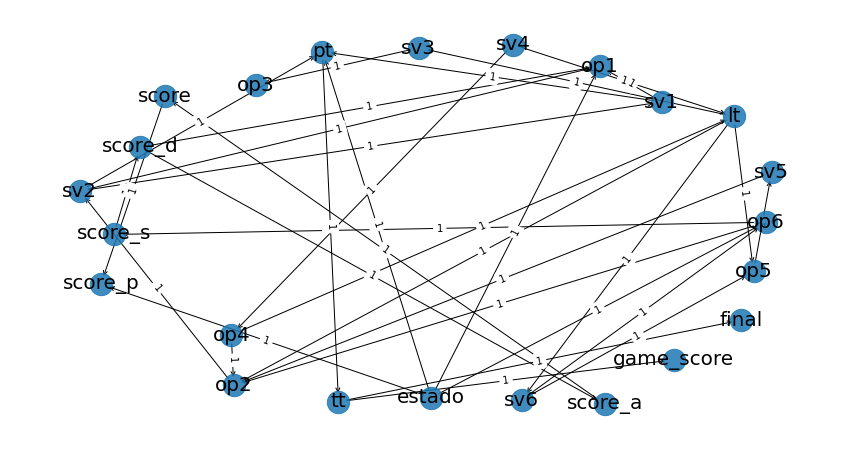

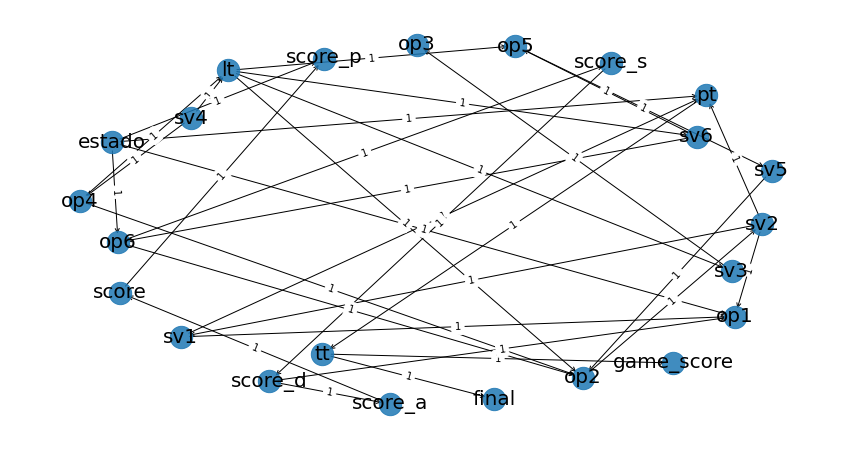

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

COLUMNA ELIMINADA DE LA INFERENCIA:  programa
FILA N°: 1 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4721 |
+-----------+---------------+
| estado(1) |        0.5279 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3489 |
+-----------+---------------+
| 





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


FILA N°: 18 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4569 |
+-----------+---------------+
| estado(1) |        0.5431 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3537 |
+-----------+---------------+
| estado(1) |        0.6463 |
+-----------+---



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5623 |
+-----------+---------------+
| estado(1) |        0.4377 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4697 |
+-----------+---------------+
| estado(1) |        0.5303 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4050 |
+-----------+---------------+
| estado(1) |        0.5950 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3618 |
+-----------+---------------+
| estado(1) |        0.6382 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "final":2.0}]
[bnlearn] >Variable 





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6786 |
+-----------+---------------+
| estado(1) |        0.3214 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6342 |
+-----------+---------------+
| estado(1) |        0.3658 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable 



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5403 |
+-----------+---------------+
| estado(1) |        0.4597 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6457 |
+-----------+---------------+
| estado(1) |        0.3543 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6429 |
+-----------+---------------+
| estado(1) |        0.3571 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6140 |
+-----------+---------------+
| estado(1) |        0.3860 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6979 |
+-----------+---------------+
| estado(1) |        0.3021 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variable 


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6877 |
+-----------+---------------+
| estado(1) |        0.3123 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5711 |
+-----------+---------------+
| estado(1) |        0.4289 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":2.0}]
[bnlearn] >Variab


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6593 |
+-----------+---------------+
| estado(1) |        0.3407 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5185 |
+-----------+---------------+
| estado(1) |        0.4815 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5265 |
+-----------+---------------+
| estado(1) |        0.4735 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5342 |
+-----------+---------------+
| estado(1) |        0.4658 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "final":2.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6444 |
+-----------+---------------+
| estado(1) |        0.3556 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5294 |
+-----------+---------------+
| estado(1) |        0.4706 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variabl







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:10, ?it/s]

FILA N°: 144 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":0, "sv6":1, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6673 |
+-----------+---------------+
| estado(1) |        0.3327 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6028 |
+-----------+---------------+
| estado(1) |        0.3972 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6248 |
+-----------+---------------+
| estado(1) |        0.3752 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variab



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6290 |
+-----------+---------------+
| estado(1) |        0.3710 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6947 |
+-----------+---------------+
| estado(1) |        0.3053 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5927 |
+-----------+---------------+
| estado(1) |        0.4073 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6181 |
+-----------+---------------+
| estado(1) |        0.3819 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5998 |
+-----------+---------------+
| estado(1) |        0.4002 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5992 |
+-----------+---------------+
| estado(1) |        0.4008 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6665 |
+-----------+---------------+
| estado(1) |        0.3335 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6392 |
+-----------+---------------+
| estado(1) |        0.3608 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6172 |
+-----------+---------------+
| estado(1) |        0.3828 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5646 |
+-----------+---------------+
| estado(1) |        0.4354 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6355 |
+-----------+---------------+
| estado(1) |        0.3645 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variabl







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]


FILA N°: 285 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7679 |
+-----------+---------------+
| estado(1) |        0.2321 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "final":3.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4870 |
+-----------+---------------+
| estado(1) |        0.5130 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "final":2.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6471 |
+-----------+---------------+
| estado(1) |        0.3529 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5727 |
+-----------+---------------+
| estado(1) |        0.4273 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6527 |
+-----------+---------------+
| estado(1) |        0.3473 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "final":2.0}]
[bnlearn] >Variab

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4283 |
+-----------+---------------+
| estado(1) |        0.5717 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7316 |
+-----------+---------------+
| estado(1) |        0.2684 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "final":0.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5998 |
+-----------+---------------+
| estado(1) |        0.4002 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5278 |
+-----------+---------------+
| estado(1) |        0.4722 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "final":2.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4797 |
+-----------+---------------+
| estado(1) |        0.5203 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7241 |
+-----------+---------------+
| estado(1) |        0.2759 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variabl

0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6457 |
+-----------+---------------+
| estado(1) |        0.3543 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6509 |
+-----------+---------------+
| estado(1) |        0.3491 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "final":3.0}]
[bnlearn] >Variabl







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6587 |
+-----------+---------------+
| estado(1) |        0.3413 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6362 |
+-----------+---------------+
| estado(1) |        0.3638 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5927 |
+-----------+---------------+
| estado(1) |        0.4073 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5866 |
+-----------+---------------+
| estado(1) |        0.4134 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7646 |
+-----------+---------------+
| estado(1) |        0.2354 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variab

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6129 |
+-----------+---------------+
| estado(1) |        0.3871 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7326 |
+-----------+---------------+
| estado(1) |        0.2674 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "final":2.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

Finding Elimination Order: : : 0it [01:10, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6515 |
+-----------+---------------+
| estado(1) |        0.3485 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7466 |
+-----------+---------------+
| estado(1) |        0.2534 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6947 |
+-----------+---------------+
| estado(1) |        0.3053 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6479 |
+-----------+---------------+
| estado(1) |        0.3521 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "final":0.0}]
[bnlearn] >Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6986 |
+-----------+---------------+
| estado(1) |        0.3014 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6144 |
+-----------+---------------+
| estado(1) |        0.3856 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "final":1.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6091 |
+-----------+---------------+
| estado(1) |        0.3909 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6646 |
+-----------+---------------+
| estado(1) |        0.3354 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "final":3.0}]
[bnlearn] >Variabl

Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


Finding Elimination Order: : : 0it [01:10, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7685 |
+-----------+---------------+
| estado(1) |        0.2315 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7600 |
+-----------+---------------+
| estado(1) |        0.2400 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "final":1.0}]
[bnlearn] >Variab









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
Finding Elimination Order: : : 0it [01:30, ?it/s]
0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6855 |
+-----------+---------------+
| estado(1) |        0.3145 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TEST) Fold 3 Accuracy          : 0.946236559139785
(TEST) Fold 3 Balanced Accuracy : 0.8514412416851441
(TEST) Fold 3 Precision Score   : 0.9444746728850887
(TEST) Fold 3 Recall Score      : 0.946236559139785
(TEST) Fold 3 ROC AUC           : 0.8819277108433735
(TEST) Fold 3 Class Ratio       : 0.10752688172043011
FIN DE SECCION DE PRUEBAS, FOLD:  3
Elapsed time: 9243.5795998573 seconds.
INICIO DE SECCION DE ENTRENAMIENTO, FOLD:  4
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


Finding Elimination Order: : : 0it [27:29, ?it/s]
Finding Elimination Order: : : 0it [26:08, ?it/s]
Finding Elimination Order: : : 0it [24:47, ?it/s]
Finding Elimination Order: : : 0it [11:44, ?it/s]
Finding Elimination Order: : : 0it [04:22, ?it/s]
Finding Elimination Order: : : 0it [01:12, ?it/s]


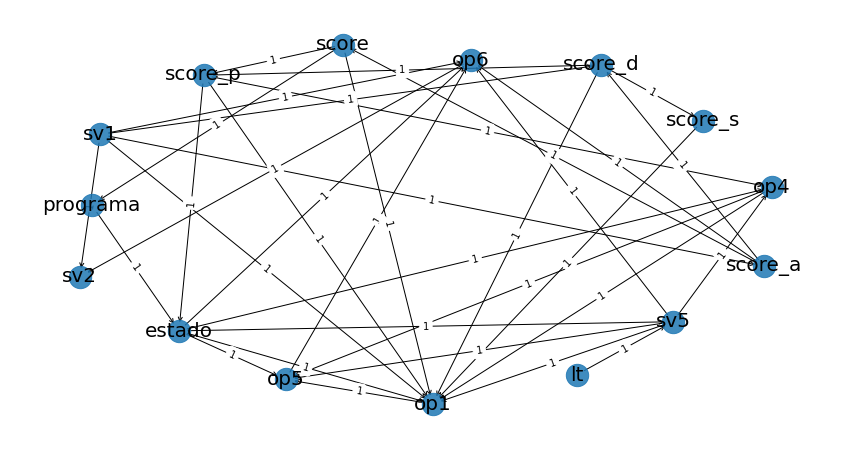

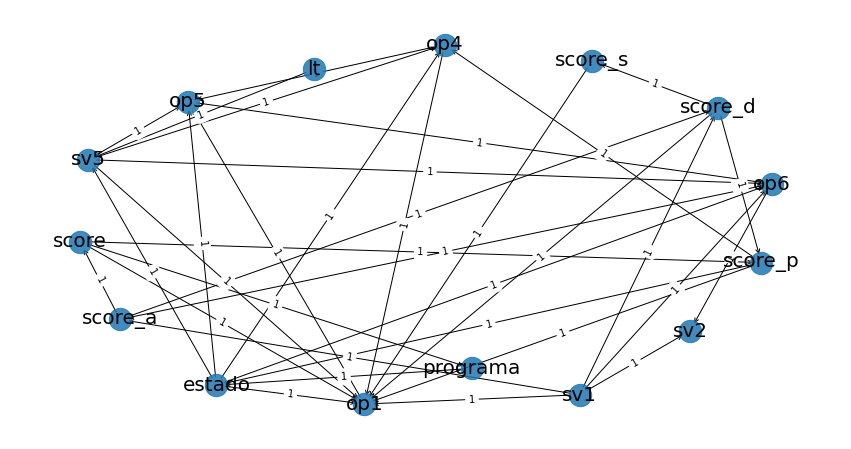

FILA N°: 1 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3168 |
+-----------+---------------+
| estado(1) |        0.6832 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4583 |
+-----------+---------------+
| estado(1) |        0.5417 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5097 |
+-----------+---------------+
| estado(1) |        0.4903 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1605 |
+-----------+---------------+
| estado(1) |        0.8395 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0781 |
+-----------+---------------+
| estado(1) |        0.9219 |
+-----------+---------------+
FILA N°: 6 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2695 |
+-----------+---------------+
| estado(1) |        0.7305 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2499 |
+-----------+---------------+
| estado(1) |        0.7501 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0026 |
+-----------+---------------+
| estado(1) |        0.9974 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1231 |
+-----------+---------------+
| estado(1) |        0.8769 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3432 |
+-----------+---------------+
| estado(1) |        0.6568 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0956 |
+-----------+---------------+
| estado(1) |        0.9044 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5074 |
+-----------+---------------+
| estado(1) |        0.4926 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7117 |
+-----------+---------------+
| estado(1) |        0.2883 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0717 |
+-----------+---------------+
| estado(1) |        0.9283 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1283 |
+-----------+---------------+
| estado(1) |        0.8717 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2424 |
+-----------+---------------+
| estado(1) |        0.7576 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9120 |
+-----------+---------------+
| estado(1) |        0.0880 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4780 |
+-----------+---------------+
| estado(1) |        0.5220 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4663 |
+-----------+---------------+
| estado(1) |        0.5337 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2680 |
+-----------+---------------+
| estado(1) |        0.7320 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3634 |
+-----------+---------------+
| estado(1) |        0.6366 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2570 |
+-----------+---------------+
| estado(1) |        0.7430 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0528 |
+-----------+---------------+
| estado(1) |        0.9472 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3111 |
+-----------+---------------+
| estado(1) |        0.6889 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0175 |
+-----------+---------------+
| estado(1) |        0.9825 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6059 |
+-----------+---------------+
| estado(1) |        0.3941 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2067 |
+-----------+---------------+
| estado(1) |        0.7933 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0995 |
+-----------+---------------+
| estado(1) |        0.9005 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0264 |
+-----------+---------------+
| estado(1) |        0.9736 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5316 |
+-----------+---------------+
| estado(1) |        0.4684 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2355 |
+-----------+---------------+
| estado(1) |        0.7645 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0444 |
+-----------+---------------+
| estado(1) |        0.9556 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3212 |
+-----------+---------------+
| estado(1) |        0.6788 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3138 |
+-----------+---------------+
| estado(1) |        0.6862 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2188 |
+-----------+---------------+
| estado(1) |        0.7812 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8353 |
+-----------+---------------+
| estado(1) |        0.1647 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4423 |
+-----------+---------------+
| estado(1) |        0.5577 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7925 |
+-----------+---------------+
| estado(1) |        0.2075 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5641 |
+-----------+---------------+
| estado(1) |        0.4359 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6088 |
+-----------+---------------+
| estado(1) |        0.3912 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7065 |
+-----------+---------------+
| estado(1) |        0.2935 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2592 |
+-----------+---------------+
| estado(1) |        0.7408 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2491 |
+-----------+---------------+
| estado(1) |        0.7509 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8470 |
+-----------+---------------+
| estado(1) |        0.1530 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8674 |
+-----------+---------------+
| estado(1) |        0.1326 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9269 |
+-----------+---------------+
| estado(1) |        0.0731 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9480 |
+-----------+---------------+
| estado(1) |        0.0520 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8535 |
+-----------+---------------+
| estado(1) |        0.1465 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8475 |
+-----------+---------------+
| estado(1) |        0.1525 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9209 |
+-----------+---------------+
| estado(1) |        0.0791 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5401 |
+-----------+---------------+
| estado(1) |        0.4599 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3000 |
+-----------+---------------+
| estado(1) |        0.7000 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7902 |
+-----------+---------------+
| estado(1) |        0.2098 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6355 |
+-----------+---------------+
| estado(1) |        0.3645 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4248 |
+-----------+---------------+
| estado(1) |        0.5752 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9736 |
+-----------+---------------+
| estado(1) |        0.0264 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9975 |
+-----------+---------------+
| estado(1) |        0.0025 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":0, "sv2":1, "sv5":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9594 |
+-----------+---------------+
| estado(1) |        0.0406 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6285 |
+-----------+---------------+
| estado(1) |        0.3715 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3582 |
+-----------+---------------+
| estado(1) |        0.6418 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4338 |
+-----------+---------------+
| estado(1) |        0.5662 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5718 |
+-----------+---------------+
| estado(1) |        0.4282 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2714 |
+-----------+---------------+
| estado(1) |        0.7286 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8521 |
+-----------+---------------+
| estado(1) |        0.1479 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8622 |
+-----------+---------------+
| estado(1) |        0.1378 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2303 |
+-----------+---------------+
| estado(1) |        0.7697 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8612 |
+-----------+---------------+
| estado(1) |        0.1388 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9984 |
+-----------+---------------+
| estado(1) |        0.0016 |
+-----------+---------------+
FILA N°: 73 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7341 |
+-----------+---------------+
| estado(1) |        0.2659 |
+-----------+---------------+
FILA N°: 74 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7739 |
+-----------+---------------+
| estado(1) |        0.2261 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8550 |
+-----------+---------------+
| estado(1) |        0.1450 |
+-----------+---------------+
FILA N°: 76 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7428 |
+-----------+---------------+
| estado(1) |        0.2572 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9992 |
+-----------+---------------+
| estado(1) |        0.0008 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7877 |
+-----------+---------------+
| estado(1) |        0.2123 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6034 |
+-----------+---------------+
| estado(1) |        0.3966 |
+-----------+---------------+
FILA N°: 80 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8313 |
+-----------+---------------+
| estado(1) |        0.1687 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6212 |
+-----------+---------------+
| estado(1) |        0.3788 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9955 |
+-----------+---------------+
| estado(1) |        0.0045 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9388 |
+-----------+---------------+
| estado(1) |        0.0612 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9962 |
+-----------+---------------+
| estado(1) |        0.0038 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9339 |
+-----------+---------------+
| estado(1) |        0.0661 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9985 |
+-----------+---------------+
| estado(1) |        0.0015 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8731 |
+-----------+---------------+
| estado(1) |        0.1269 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3434 |
+-----------+---------------+
| estado(1) |        0.6566 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9882 |
+-----------+---------------+
| estado(1) |        0.0118 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4919 |
+-----------+---------------+
| estado(1) |        0.5081 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9288 |
+-----------+---------------+
| estado(1) |        0.0712 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7223 |
+-----------+---------------+
| estado(1) |        0.2777 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3505 |
+-----------+---------------+
| estado(1) |        0.6495 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3182 |
+-----------+---------------+
| estado(1) |        0.6818 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6343 |
+-----------+---------------+
| estado(1) |        0.3657 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8037 |
+-----------+---------------+
| estado(1) |        0.1963 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5127 |
+-----------+---------------+
| estado(1) |        0.4873 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9666 |
+-----------+---------------+
| estado(1) |        0.0334 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9993 |
+-----------+---------------+
| estado(1) |        0.0007 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8642 |
+-----------+---------------+
| estado(1) |        0.1358 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9970 |
+-----------+---------------+
| estado(1) |        0.0030 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8454 |
+-----------+---------------+
| estado(1) |        0.1546 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8852 |
+-----------+---------------+
| estado(1) |        0.1148 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6267 |
+-----------+---------------+
| estado(1) |        0.3733 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7686 |
+-----------+---------------+
| estado(1) |        0.2314 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7811 |
+-----------+---------------+
| estado(1) |        0.2189 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8293 |
+-----------+---------------+
| estado(1) |        0.1707 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7212 |
+-----------+---------------+
| estado(1) |        0.2788 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7965 |
+-----------+---------------+
| estado(1) |        0.2035 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7775 |
+-----------+---------------+
| estado(1) |        0.2225 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8548 |
+-----------+---------------+
| estado(1) |        0.1452 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5694 |
+-----------+---------------+
| estado(1) |        0.4306 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8420 |
+-----------+---------------+
| estado(1) |        0.1580 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5425 |
+-----------+---------------+
| estado(1) |        0.4575 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8976 |
+-----------+---------------+
| estado(1) |        0.1024 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2754 |
+-----------+---------------+
| estado(1) |        0.7246 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9419 |
+-----------+---------------+
| estado(1) |        0.0581 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5616 |
+-----------+---------------+
| estado(1) |        0.4384 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8254 |
+-----------+---------------+
| estado(1) |        0.1746 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9247 |
+-----------+---------------+
| estado(1) |        0.0753 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8486 |
+-----------+---------------+
| estado(1) |        0.1514 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7369 |
+-----------+---------------+
| estado(1) |        0.2631 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":0, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5024 |
+-----------+---------------+
| estado(1) |        0.4976 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4111 |
+-----------+---------------+
| estado(1) |        0.5889 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7071 |
+-----------+---------------+
| estado(1) |        0.2929 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9220 |
+-----------+---------------+
| estado(1) |        0.0780 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8199 |
+-----------+---------------+
| estado(1) |        0.1801 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6884 |
+-----------+---------------+
| estado(1) |        0.3116 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6441 |
+-----------+---------------+
| estado(1) |        0.3559 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9267 |
+-----------+---------------+
| estado(1) |        0.0733 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9669 |
+-----------+---------------+
| estado(1) |        0.0331 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7274 |
+-----------+---------------+
| estado(1) |        0.2726 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6802 |
+-----------+---------------+
| estado(1) |        0.3198 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8892 |
+-----------+---------------+
| estado(1) |        0.1108 |
+-----------+---------------+
FILA N°: 135 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8464 |
+-----------+---------------+
| estado(1) |        0.1536 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9195 |
+-----------+---------------+
| estado(1) |        0.0805 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3596 |
+-----------+---------------+
| estado(1) |        0.6404 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9000 |
+-----------+---------------+
| estado(1) |        0.1000 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9917 |
+-----------+---------------+
| estado(1) |        0.0083 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9988 |
+-----------+---------------+
| estado(1) |        0.0012 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2154 |
+-----------+---------------+
| estado(1) |        0.7846 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9919 |
+-----------+---------------+
| estado(1) |        0.0081 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5161 |
+-----------+---------------+
| estado(1) |        0.4839 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6365 |
+-----------+---------------+
| estado(1) |        0.3635 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9169 |
+-----------+---------------+
| estado(1) |        0.0831 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5620 |
+-----------+---------------+
| estado(1) |        0.4380 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9908 |
+-----------+---------------+
| estado(1) |        0.0092 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2897 |
+-----------+---------------+
| estado(1) |        0.7103 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9160 |
+-----------+---------------+
| estado(1) |        0.0840 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7742 |
+-----------+---------------+
| estado(1) |        0.2258 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9144 |
+-----------+---------------+
| estado(1) |        0.0856 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9647 |
+-----------+---------------+
| estado(1) |        0.0353 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9949 |
+-----------+---------------+
| estado(1) |        0.0051 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7252 |
+-----------+---------------+
| estado(1) |        0.2748 |
+-----------+---------------+
FILA N°: 155 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5997 |
+-----------+---------------+
| estado(1) |        0.4003 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6976 |
+-----------+---------------+
| estado(1) |        0.3024 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5906 |
+-----------+---------------+
| estado(1) |        0.4094 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2451 |
+-----------+---------------+
| estado(1) |        0.7549 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":5, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7577 |
+-----------+---------------+
| estado(1) |        0.2423 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6757 |
+-----------+---------------+
| estado(1) |        0.3243 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8115 |
+-----------+---------------+
| estado(1) |        0.1885 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9638 |
+-----------+---------------+
| estado(1) |        0.0362 |
+-----------+---------------+
FILA N°: 163 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9492 |
+-----------+---------------+
| estado(1) |        0.0508 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5585 |
+-----------+---------------+
| estado(1) |        0.4415 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9997 |
+-----------+---------------+
| estado(1) |        0.0003 |
+-----------+---------------+
FILA N°: 166 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8983 |
+-----------+---------------+
| estado(1) |        0.1017 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5691 |
+-----------+---------------+
| estado(1) |        0.4309 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8306 |
+-----------+---------------+
| estado(1) |        0.1694 |
+-----------+---------------+
FILA N°: 169 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6778 |
+-----------+---------------+
| estado(1) |        0.3222 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv5":1, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5370 |
+-----------+---------------+
| estado(1) |        0.4630 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7802 |
+-----------+---------------+
| estado(1) |        0.2198 |
+-----------+---------------+
FILA N°: 172 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7709 |
+-----------+---------------+
| estado(1) |        0.2291 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9457 |
+-----------+---------------+
| estado(1) |        0.0543 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8859 |
+-----------+---------------+
| estado(1) |        0.1141 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8986 |
+-----------+---------------+
| estado(1) |        0.1014 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9883 |
+-----------+---------------+
| estado(1) |        0.0117 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8307 |
+-----------+---------------+
| estado(1) |        0.1693 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4036 |
+-----------+---------------+
| estado(1) |        0.5964 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7280 |
+-----------+---------------+
| estado(1) |        0.2720 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3521 |
+-----------+---------------+
| estado(1) |        0.6479 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9909 |
+-----------+---------------+
| estado(1) |        0.0091 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6902 |
+-----------+---------------+
| estado(1) |        0.3098 |
+-----------+---------------+
FILA N°: 183 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8018 |
+-----------+---------------+
| estado(1) |        0.1982 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8697 |
+-----------+---------------+
| estado(1) |        0.1303 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8886 |
+-----------+---------------+
| estado(1) |        0.1114 |
+-----------+---------------+
FILA N°: 186 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2648 |
+-----------+---------------+
| estado(1) |        0.7352 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4705 |
+-----------+---------------+
| estado(1) |        0.5295 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9914 |
+-----------+---------------+
| estado(1) |        0.0086 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9065 |
+-----------+---------------+
| estado(1) |        0.0935 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7212 |
+-----------+---------------+
| estado(1) |        0.2788 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2119 |
+-----------+---------------+
| estado(1) |        0.7881 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5651 |
+-----------+---------------+
| estado(1) |        0.4349 |
+-----------+---------------+
FILA N°: 193 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9573 |
+-----------+---------------+
| estado(1) |        0.0427 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9989 |
+-----------+---------------+
| estado(1) |        0.0011 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9633 |
+-----------+---------------+
| estado(1) |        0.0367 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8253 |
+-----------+---------------+
| estado(1) |        0.1747 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9241 |
+-----------+---------------+
| estado(1) |        0.0759 |
+-----------+---------------+
FILA N°: 198 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6016 |
+-----------+---------------+
| estado(1) |        0.3984 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9558 |
+-----------+---------------+
| estado(1) |        0.0442 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9988 |
+-----------+---------------+
| estado(1) |        0.0012 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8519 |
+-----------+---------------+
| estado(1) |        0.1481 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3198 |
+-----------+---------------+
| estado(1) |        0.6802 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7524 |
+-----------+---------------+
| estado(1) |        0.2476 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6134 |
+-----------+---------------+
| estado(1) |        0.3866 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4895 |
+-----------+---------------+
| estado(1) |        0.5105 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6364 |
+-----------+---------------+
| estado(1) |        0.3636 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9931 |
+-----------+---------------+
| estado(1) |        0.0069 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7549 |
+-----------+---------------+
| estado(1) |        0.2451 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7242 |
+-----------+---------------+
| estado(1) |        0.2758 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8410 |
+-----------+---------------+
| estado(1) |        0.1590 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1093 |
+-----------+---------------+
| estado(1) |        0.8907 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":4.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8535 |
+-----------+---------------+
| estado(1) |        0.1465 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7253 |
+-----------+---------------+
| estado(1) |        0.2747 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9237 |
+-----------+---------------+
| estado(1) |        0.0763 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7555 |
+-----------+---------------+
| estado(1) |        0.2445 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9948 |
+-----------+---------------+
| estado(1) |        0.0052 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9464 |
+-----------+---------------+
| estado(1) |        0.0536 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4049 |
+-----------+---------------+
| estado(1) |        0.5951 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5430 |
+-----------+---------------+
| estado(1) |        0.4570 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6921 |
+-----------+---------------+
| estado(1) |        0.3079 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2685 |
+-----------+---------------+
| estado(1) |        0.7315 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8626 |
+-----------+---------------+
| estado(1) |        0.1374 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7918 |
+-----------+---------------+
| estado(1) |        0.2082 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9983 |
+-----------+---------------+
| estado(1) |        0.0017 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5083 |
+-----------+---------------+
| estado(1) |        0.4917 |
+-----------+---------------+
FILA N°: 226 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6490 |
+-----------+---------------+
| estado(1) |        0.3510 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9972 |
+-----------+---------------+
| estado(1) |        0.0028 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9854 |
+-----------+---------------+
| estado(1) |        0.0146 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5620 |
+-----------+---------------+
| estado(1) |        0.4380 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7719 |
+-----------+---------------+
| estado(1) |        0.2281 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7491 |
+-----------+---------------+
| estado(1) |        0.2509 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9434 |
+-----------+---------------+
| estado(1) |        0.0566 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9378 |
+-----------+---------------+
| estado(1) |        0.0622 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6896 |
+-----------+---------------+
| estado(1) |        0.3104 |
+-----------+---------------+
FILA N°: 235 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9006 |
+-----------+---------------+
| estado(1) |        0.0994 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6399 |
+-----------+---------------+
| estado(1) |        0.3601 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8679 |
+-----------+---------------+
| estado(1) |        0.1321 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7754 |
+-----------+---------------+
| estado(1) |        0.2246 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9974 |
+-----------+---------------+
| estado(1) |        0.0026 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4338 |
+-----------+---------------+
| estado(1) |        0.5662 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3755 |
+-----------+---------------+
| estado(1) |        0.6245 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8833 |
+-----------+---------------+
| estado(1) |        0.1167 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8849 |
+-----------+---------------+
| estado(1) |        0.1151 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9887 |
+-----------+---------------+
| estado(1) |        0.0113 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4830 |
+-----------+---------------+
| estado(1) |        0.5170 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7761 |
+-----------+---------------+
| estado(1) |        0.2239 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4290 |
+-----------+---------------+
| estado(1) |        0.5710 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8386 |
+-----------+---------------+
| estado(1) |        0.1614 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3298 |
+-----------+---------------+
| estado(1) |        0.6702 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6957 |
+-----------+---------------+
| estado(1) |        0.3043 |
+-----------+---------------+
FILA N°: 251 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5476 |
+-----------+---------------+
| estado(1) |        0.4524 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6508 |
+-----------+---------------+
| estado(1) |        0.3492 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9972 |
+-----------+---------------+
| estado(1) |        0.0028 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5654 |
+-----------+---------------+
| estado(1) |        0.4346 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv5":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6528 |
+-----------+---------------+
| estado(1) |        0.3472 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2057 |
+-----------+---------------+
| estado(1) |        0.7943 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8599 |
+-----------+---------------+
| estado(1) |        0.1401 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5808 |
+-----------+---------------+
| estado(1) |        0.4192 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7106 |
+-----------+---------------+
| estado(1) |        0.2894 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7799 |
+-----------+---------------+
| estado(1) |        0.2201 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3443 |
+-----------+---------------+
| estado(1) |        0.6557 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6748 |
+-----------+---------------+
| estado(1) |        0.3252 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":3.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4676 |
+-----------+---------------+
| estado(1) |        0.5324 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9231 |
+-----------+---------------+
| estado(1) |        0.0769 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9731 |
+-----------+---------------+
| estado(1) |        0.0269 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5929 |
+-----------+---------------+
| estado(1) |        0.4071 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9944 |
+-----------+---------------+
| estado(1) |        0.0056 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6435 |
+-----------+---------------+
| estado(1) |        0.3565 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3882 |
+-----------+---------------+
| estado(1) |        0.6118 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7987 |
+-----------+---------------+
| estado(1) |        0.2013 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3332 |
+-----------+---------------+
| estado(1) |        0.6668 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8808 |
+-----------+---------------+
| estado(1) |        0.1192 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6081 |
+-----------+---------------+
| estado(1) |        0.3919 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6376 |
+-----------+---------------+
| estado(1) |        0.3624 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7144 |
+-----------+---------------+
| estado(1) |        0.2856 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8608 |
+-----------+---------------+
| estado(1) |        0.1392 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9293 |
+-----------+---------------+
| estado(1) |        0.0707 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7829 |
+-----------+---------------+
| estado(1) |        0.2171 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9983 |
+-----------+---------------+
| estado(1) |        0.0017 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6370 |
+-----------+---------------+
| estado(1) |        0.3630 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9038 |
+-----------+---------------+
| estado(1) |        0.0962 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7217 |
+-----------+---------------+
| estado(1) |        0.2783 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5638 |
+-----------+---------------+
| estado(1) |        0.4362 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8658 |
+-----------+---------------+
| estado(1) |        0.1342 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6832 |
+-----------+---------------+
| estado(1) |        0.3168 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9891 |
+-----------+---------------+
| estado(1) |        0.0109 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8037 |
+-----------+---------------+
| estado(1) |        0.1963 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9039 |
+-----------+---------------+
| estado(1) |        0.0961 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5453 |
+-----------+---------------+
| estado(1) |        0.4547 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4005 |
+-----------+---------------+
| estado(1) |        0.5995 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7141 |
+-----------+---------------+
| estado(1) |        0.2859 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8603 |
+-----------+---------------+
| estado(1) |        0.1397 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9965 |
+-----------+---------------+
| estado(1) |        0.0035 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6423 |
+-----------+---------------+
| estado(1) |        0.3577 |
+-----------+---------------+
FILA N°: 295 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5250 |
+-----------+---------------+
| estado(1) |        0.4750 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8289 |
+-----------+---------------+
| estado(1) |        0.1711 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9975 |
+-----------+---------------+
| estado(1) |        0.0025 |
+-----------+---------------+
FILA N°: 298 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7706 |
+-----------+---------------+
| estado(1) |        0.2294 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7727 |
+-----------+---------------+
| estado(1) |        0.2273 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4610 |
+-----------+---------------+
| estado(1) |        0.5390 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6626 |
+-----------+---------------+
| estado(1) |        0.3374 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2076 |
+-----------+---------------+
| estado(1) |        0.7924 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9212 |
+-----------+---------------+
| estado(1) |        0.0788 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9887 |
+-----------+---------------+
| estado(1) |        0.0113 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8648 |
+-----------+---------------+
| estado(1) |        0.1352 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6619 |
+-----------+---------------+
| estado(1) |        0.3381 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6183 |
+-----------+---------------+
| estado(1) |        0.3817 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6266 |
+-----------+---------------+
| estado(1) |        0.3734 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7777 |
+-----------+---------------+
| estado(1) |        0.2223 |
+-----------+---------------+
FILA N°: 310 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9996 |
+-----------+---------------+
| estado(1) |        0.0004 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9172 |
+-----------+---------------+
| estado(1) |        0.0828 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4944 |
+-----------+---------------+
| estado(1) |        0.5056 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5134 |
+-----------+---------------+
| estado(1) |        0.4866 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8021 |
+-----------+---------------+
| estado(1) |        0.1979 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6919 |
+-----------+---------------+
| estado(1) |        0.3081 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":4, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7721 |
+-----------+---------------+
| estado(1) |        0.2279 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8411 |
+-----------+---------------+
| estado(1) |        0.1589 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3629 |
+-----------+---------------+
| estado(1) |        0.6371 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7613 |
+-----------+---------------+
| estado(1) |        0.2387 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8828 |
+-----------+---------------+
| estado(1) |        0.1172 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9162 |
+-----------+---------------+
| estado(1) |        0.0838 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9263 |
+-----------+---------------+
| estado(1) |        0.0737 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8195 |
+-----------+---------------+
| estado(1) |        0.1805 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9222 |
+-----------+---------------+
| estado(1) |        0.0778 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8098 |
+-----------+---------------+
| estado(1) |        0.1902 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9536 |
+-----------+---------------+
| estado(1) |        0.0464 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8481 |
+-----------+---------------+
| estado(1) |        0.1519 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4688 |
+-----------+---------------+
| estado(1) |        0.5312 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7046 |
+-----------+---------------+
| estado(1) |        0.2954 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9837 |
+-----------+---------------+
| estado(1) |        0.0163 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9787 |
+-----------+---------------+
| estado(1) |        0.0213 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7743 |
+-----------+---------------+
| estado(1) |        0.2257 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4367 |
+-----------+---------------+
| estado(1) |        0.5633 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8973 |
+-----------+---------------+
| estado(1) |        0.1027 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8384 |
+-----------+---------------+
| estado(1) |        0.1616 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9973 |
+-----------+---------------+
| estado(1) |        0.0027 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":0, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9808 |
+-----------+---------------+
| estado(1) |        0.0192 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7738 |
+-----------+---------------+
| estado(1) |        0.2262 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4101 |
+-----------+---------------+
| estado(1) |        0.5899 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9212 |
+-----------+---------------+
| estado(1) |        0.0788 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8412 |
+-----------+---------------+
| estado(1) |        0.1588 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7242 |
+-----------+---------------+
| estado(1) |        0.2758 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9243 |
+-----------+---------------+
| estado(1) |        0.0757 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8030 |
+-----------+---------------+
| estado(1) |        0.1970 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9260 |
+-----------+---------------+
| estado(1) |        0.0740 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9933 |
+-----------+---------------+
| estado(1) |        0.0067 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5472 |
+-----------+---------------+
| estado(1) |        0.4528 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8203 |
+-----------+---------------+
| estado(1) |        0.1797 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6446 |
+-----------+---------------+
| estado(1) |        0.3554 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9353 |
+-----------+---------------+
| estado(1) |        0.0647 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9408 |
+-----------+---------------+
| estado(1) |        0.0592 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8288 |
+-----------+---------------+
| estado(1) |        0.1712 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6214 |
+-----------+---------------+
| estado(1) |        0.3786 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8483 |
+-----------+---------------+
| estado(1) |        0.1517 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6839 |
+-----------+---------------+
| estado(1) |        0.3161 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8658 |
+-----------+---------------+
| estado(1) |        0.1342 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9460 |
+-----------+---------------+
| estado(1) |        0.0540 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6759 |
+-----------+---------------+
| estado(1) |        0.3241 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6528 |
+-----------+---------------+
| estado(1) |        0.3472 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4394 |
+-----------+---------------+
| estado(1) |        0.5606 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9425 |
+-----------+---------------+
| estado(1) |        0.0575 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8018 |
+-----------+---------------+
| estado(1) |        0.1982 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9983 |
+-----------+---------------+
| estado(1) |        0.0017 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9063 |
+-----------+---------------+
| estado(1) |        0.0937 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5868 |
+-----------+---------------+
| estado(1) |        0.4132 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5883 |
+-----------+---------------+
| estado(1) |        0.4117 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9972 |
+-----------+---------------+
| estado(1) |        0.0028 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9042 |
+-----------+---------------+
| estado(1) |        0.0958 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9946 |
+-----------+---------------+
| estado(1) |        0.0054 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4805 |
+-----------+---------------+
| estado(1) |        0.5195 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv5":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8686 |
+-----------+---------------+
| estado(1) |        0.1314 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3717 |
+-----------+---------------+
| estado(1) |        0.6283 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":2.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9006 |
+-----------+---------------+
| estado(1) |        0.0994 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8384 |
+-----------+---------------+
| estado(1) |        0.1616 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.2465519312382418, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3381 |
+-----------+---------------+
| estado(1) |        0.6619 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":0.2832349079477494, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1865 |
+-----------+---------------+
| estado(1) |        0.8135 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0036 |
+-----------+---------------+
| estado(1) |        0.9964 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5495 |
+-----------+---------------+
| estado(1) |        0.4505 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1168 |
+-----------+---------------+
| estado(1) |        0.8832 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":0.02428390741658404, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1757 |
+-----------+---------------+
| estado(1) |        0.8243 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1420 |
+-----------+---------------+
| estado(1) |        0.8580 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.5214867638486297, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3395 |
+-----------+---------------+
| estado(1) |        0.6605 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0036 |
+-----------+---------------+
| estado(1) |        0.9964 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1421 |
+-----------+---------------+
| estado(1) |        0.8579 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0052 |
+-----------+---------------+
| estado(1) |        0.9948 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.18238597812023627, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0658 |
+-----------+---------------+
| estado(1) |        0.9342 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0728 |
+-----------+---------------+
| estado(1) |        0.9272 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0034 |
+-----------+---------------+
| estado(1) |        0.9966 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0202 |
+-----------+---------------+
| estado(1) |        0.9798 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0012 |
+-----------+---------------+
| estado(1) |        0.9988 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":0.5162990087573122, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"lt":0.06870380440683799, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1168 |
+-----------+---------------+
| estado(1) |        0.8832 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":1.2298354516167689, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1102 |
+-----------+---------------+
| estado(1) |        0.8898 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2651 |
+-----------+---------------+
| estado(1) |        0.7349 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1168 |
+-----------+---------------+
| estado(1) |        0.8832 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2169 |
+-----------+---------------+
| estado(1) |        0.7831 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2651 |
+-----------+---------------+
| estado(1) |        0.7349 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1146 |
+-----------+---------------+
| estado(1) |        0.8854 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3644 |
+-----------+---------------+
| estado(1) |        0.6356 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.8943111371471499, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2476 |
+-----------+---------------+
| estado(1) |        0.7524 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"lt":0.13837661708632354, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2681 |
+-----------+---------------+
| estado(1) |        0.7319 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":0.18630770162798105, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2010 |
+-----------+---------------+
| estado(1) |        0.7990 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.39916331947356176, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0070 |
+-----------+---------------+
| estado(1) |        0.9930 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0029 |
+-----------+---------------+
| estado(1) |        0.9971 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1001 |
+-----------+---------------+
| estado(1) |        0.8999 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.06889837639982033, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2010 |
+-----------+---------------+
| estado(1) |        0.7990 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0092 |
+-----------+---------------+
| estado(1) |        0.9908 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.654286099789208, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1519 |
+-----------+---------------+
| estado(1) |        0.8481 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":1.826371463345104, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0031 |
+-----------+---------------+
| estado(1) |        0.9969 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1690 |
+-----------+---------------+
| estado(1) |        0.8310 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0029 |
+-----------+---------------+
| estado(1) |        0.9971 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":0.8441846651632062, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0980 |
+-----------+---------------+
| estado(1) |        0.9020 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0514 |
+-----------+---------------+
| estado(1) |        0.9486 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2681 |
+-----------+---------------+
| estado(1) |        0.7319 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":0.3753933312756764, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2392 |
+-----------+---------------+
| estado(1) |        0.7608 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"lt":0.2561628557906307, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1421 |
+-----------+---------------+
| estado(1) |        0.8579 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0092 |
+-----------+---------------+
| estado(1) |        0.9908 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2146 |
+-----------+---------------+
| estado(1) |        0.7854 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":1.7398303661329233, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4176 |
+-----------+---------------+
| estado(1) |        0.5824 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0105 |
+-----------+---------------+
| estado(1) |        0.9895 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":0.21128287069924556, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4679 |
+-----------+---------------+
| estado(1) |        0.5321 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0528 |
+-----------+---------------+
| estado(1) |        0.9472 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3644 |
+-----------+---------------+
| estado(1) |        0.6356 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.1521865268700907, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0070 |
+-----------+---------------+
| estado(1) |        0.9930 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1104 |
+-----------+---------------+
| estado(1) |        0.8896 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0486 |
+-----------+---------------+
| estado(1) |        0.9514 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0014 |
+-----------+---------------+
| estado(1) |        0.9986 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0202 |
+-----------+---------------+
| estado(1) |        0.9798 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0728 |
+-----------+---------------+
| estado(1) |        0.9272 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":1.8369902691365225, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1267 |
+-----------+---------------+
| estado(1) |        0.8733 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2862 |
+-----------+---------------+
| estado(1) |        0.7138 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0092 |
+-----------+---------------+
| estado(1) |        0.9908 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3644 |
+-----------+---------------+
| estado(1) |        0.6356 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2321 |
+-----------+---------------+
| estado(1) |        0.7679 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1632 |
+-----------+---------------+
| estado(1) |        0.8368 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0514 |
+-----------+---------------+
| estado(1) |        0.9486 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.07332899084480471, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0079 |
+-----------+---------------+
| estado(1) |        0.9921 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0610 |
+-----------+---------------+
| estado(1) |        0.9390 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"lt":1.1912252470019205, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2607 |
+-----------+---------------+
| estado(1) |        0.7393 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2868 |
+-----------+---------------+
| estado(1) |        0.7132 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0610 |
+-----------+---------------+
| estado(1) |        0.9390 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":1.9255584119231748, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"lt":0.2978981493551067, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2831 |
+-----------+---------------+
| estado(1) |        0.7169 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0059 |
+-----------+---------------+
| estado(1) |        0.9941 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":0.850626760479736, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1952 |
+-----------+---------------+
| estado(1) |        0.8048 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.009716764449430149, "op1":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2392 |
+-----------+---------------+
| estado(1) |        0.7608 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":1.590133917057063, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0728 |
+-----------+---------------+
| estado(1) |        0.9272 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.6976154004357895, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1369 |
+-----------+---------------+
| estado(1) |        0.8631 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1352 |
+-----------+---------------+
| estado(1) |        0.8648 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2695 |
+-----------+---------------+
| estado(1) |        0.7305 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":1.6490365663782642, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5718 |
+-----------+---------------+
| estado(1) |        0.4282 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":0.7909010360310306, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3395 |
+-----------+---------------+
| estado(1) |        0.6605 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":1.1528365605251254, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1378 |
+-----------+---------------+
| estado(1) |        0.8622 |
+-----------+---------------+
FILA N°: 467 -> P("Estado" | [{"lt":0.7109942834267983, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6182 |
+-----------+---------------+
| estado(1) |        0.3818 |
+-----------+---------------+
FILA N°: 468 -> P("Estado" | [{"lt":0.7297536852110742, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1319 |
+-----------+---------------+
| estado(1) |        0.8681 |
+-----------+---------------+
FILA N°: 469 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0202 |
+-----------+---------------+
| estado(1) |        0.9798 |
+-----------+---------------+
FILA N°: 470 -> P("Estado" | [{"lt":1.7588144818986353, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2190 |
+-----------+---------------+
| estado(1) |        0.7810 |
+-----------+---------------+
FILA N°: 471 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1439 |
+-----------+---------------+
| estado(1) |        0.8561 |
+-----------+---------------+
FILA N°: 472 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 473 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0587 |
+-----------+---------------+
| estado(1) |        0.9413 |
+-----------+---------------+
FILA N°: 474 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2559 |
+-----------+---------------+
| estado(1) |        0.7441 |
+-----------+---------------+
FILA N°: 475 -> P("Estado" | [{"lt":0.815264477102619, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1952 |
+-----------+---------------+
| estado(1) |        0.8048 |
+-----------+---------------+
FILA N°: 476 -> P("Estado" | [{"lt":0.3073185228574241, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0536 |
+-----------+---------------+
| estado(1) |        0.9464 |
+-----------+---------------+
FILA N°: 477 -> P("Estado" | [{"lt":0.8824119020926483, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0020 |
+-----------+---------------+
| estado(1) |        0.9980 |
+-----------+---------------+
FILA N°: 478 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1621 |
+-----------+---------------+
| estado(1) |        0.8379 |
+-----------+---------------+
FILA N°: 479 -> P("Estado" | [{"lt":0.10533541213661479, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 480 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1329 |
+-----------+---------------+
| estado(1) |        0.8671 |
+-----------+---------------+
FILA N°: 481 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0088 |
+-----------+---------------+
| estado(1) |        0.9912 |
+-----------+---------------+
FILA N°: 482 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4919 |
+-----------+---------------+
| estado(1) |        0.5081 |
+-----------+---------------+
FILA N°: 483 -> P("Estado" | [{"lt":1.1152513951428236, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0028 |
+-----------+---------------+
| estado(1) |        0.9972 |
+-----------+---------------+
FILA N°: 484 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1690 |
+-----------+---------------+
| estado(1) |        0.8310 |
+-----------+---------------+
FILA N°: 485 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1504 |
+-----------+---------------+
| estado(1) |        0.8496 |
+-----------+---------------+
FILA N°: 486 -> P("Estado" | [{"lt":0.8758068077950175, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4679 |
+-----------+---------------+
| estado(1) |        0.5321 |
+-----------+---------------+
FILA N°: 487 -> P("Estado" | [{"lt":1.310669168959861, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0028 |
+-----------+---------------+
| estado(1) |        0.9972 |
+-----------+---------------+
FILA N°: 488 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3060 |
+-----------+---------------+
| estado(1) |        0.6940 |
+-----------+---------------+
FILA N°: 489 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 490 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1494 |
+-----------+---------------+
| estado(1) |        0.8506 |
+-----------+---------------+
FILA N°: 491 -> P("Estado" | [{"lt":1.8329558641339805, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2069 |
+-----------+---------------+
| estado(1) |        0.7931 |
+-----------+---------------+
FILA N°: 492 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 493 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2245 |
+-----------+---------------+
| estado(1) |        0.7755 |
+-----------+---------------+
FILA N°: 494 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4138 |
+-----------+---------------+
| estado(1) |        0.5862 |
+-----------+---------------+
FILA N°: 495 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3389 |
+-----------+---------------+
| estado(1) |        0.6611 |
+-----------+---------------+
FILA N°: 496 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0514 |
+-----------+---------------+
| estado(1) |        0.9486 |
+-----------+---------------+
FILA N°: 497 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1352 |
+-----------+---------------+
| estado(1) |        0.8648 |
+-----------+---------------+
FILA N°: 498 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1439 |
+-----------+---------------+
| estado(1) |        0.8561 |
+-----------+---------------+
FILA N°: 499 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1456 |
+-----------+---------------+
| estado(1) |        0.8544 |
+-----------+---------------+
FILA N°: 500 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1483 |
+-----------+---------------+
| estado(1) |        0.8517 |
+-----------+---------------+
FILA N°: 501 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0012 |
+-----------+---------------+
| estado(1) |        0.9988 |
+-----------+---------------+
FILA N°: 502 -> P("Estado" | [{"lt":0.7729567552075802, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0623 |
+-----------+---------------+
| estado(1) |        0.9377 |
+-----------+---------------+
FILA N°: 503 -> P("Estado" | [{"lt":0.43251696522673877, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3666 |
+-----------+---------------+
| estado(1) |        0.6334 |
+-----------+---------------+
FILA N°: 504 -> P("Estado" | [{"lt":0.7131365040918094, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4679 |
+-----------+---------------+
| estado(1) |        0.5321 |
+-----------+---------------+
FILA N°: 505 -> P("Estado" | [{"lt":0.5876798226371586, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0900 |
+-----------+---------------+
| estado(1) |        0.9100 |
+-----------+---------------+
FILA N°: 506 -> P("Estado" | [{"lt":0.04673169819288148, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5793 |
+-----------+---------------+
| estado(1) |        0.4207 |
+-----------+---------------+
FILA N°: 507 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4166 |
+-----------+---------------+
| estado(1) |        0.5834 |
+-----------+---------------+
FILA N°: 508 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0883 |
+-----------+---------------+
| estado(1) |        0.9117 |
+-----------+---------------+
FILA N°: 509 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2868 |
+-----------+---------------+
| estado(1) |        0.7132 |
+-----------+---------------+
FILA N°: 510 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 511 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3389 |
+-----------+---------------+
| estado(1) |        0.6611 |
+-----------+---------------+
FILA N°: 512 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1146 |
+-----------+---------------+
| estado(1) |        0.8854 |
+-----------+---------------+
FILA N°: 513 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1657 |
+-----------+---------------+
| estado(1) |        0.8343 |
+-----------+---------------+
FILA N°: 514 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0728 |
+-----------+---------------+
| estado(1) |        0.9272 |
+-----------+---------------+
FILA N°: 515 -> P("Estado" | [{"lt":0.382799742124705, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4679 |
+-----------+---------------+
| estado(1) |        0.5321 |
+-----------+---------------+
FILA N°: 516 -> P("Estado" | [{"lt":0.6134100318287742, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0020 |
+-----------+---------------+
| estado(1) |        0.9980 |
+-----------+---------------+
FILA N°: 517 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3060 |
+-----------+---------------+
| estado(1) |        0.6940 |
+-----------+---------------+
FILA N°: 518 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 519 -> P("Estado" | [{"lt":0.27514745817369735, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3666 |
+-----------+---------------+
| estado(1) |        0.6334 |
+-----------+---------------+
FILA N°: 520 -> P("Estado" | [{"lt":1.5030176885903495, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2607 |
+-----------+---------------+
| estado(1) |        0.7393 |
+-----------+---------------+
FILA N°: 521 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2680 |
+-----------+---------------+
| estado(1) |        0.7320 |
+-----------+---------------+
FILA N°: 522 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0883 |
+-----------+---------------+
| estado(1) |        0.9117 |
+-----------+---------------+
FILA N°: 523 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1560 |
+-----------+---------------+
| estado(1) |        0.8440 |
+-----------+---------------+
FILA N°: 524 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1146 |
+-----------+---------------+
| estado(1) |        0.8854 |
+-----------+---------------+
FILA N°: 525 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1231 |
+-----------+---------------+
| estado(1) |        0.8769 |
+-----------+---------------+
FILA N°: 526 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6833 |
+-----------+---------------+
| estado(1) |        0.3167 |
+-----------+---------------+
FILA N°: 527 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1001 |
+-----------+---------------+
| estado(1) |        0.8999 |
+-----------+---------------+
FILA N°: 528 -> P("Estado" | [{"lt":1.2006385605822254, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 529 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0056 |
+-----------+---------------+
| estado(1) |        0.9944 |
+-----------+---------------+
FILA N°: 530 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1899 |
+-----------+---------------+
| estado(1) |        0.8101 |
+-----------+---------------+
FILA N°: 531 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1421 |
+-----------+---------------+
| estado(1) |        0.8579 |
+-----------+---------------+
FILA N°: 532 -> P("Estado" | [{"lt":0.8278536496718651, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0900 |
+-----------+---------------+
| estado(1) |        0.9100 |
+-----------+---------------+
FILA N°: 533 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1168 |
+-----------+---------------+
| estado(1) |        0.8832 |
+-----------+---------------+
FILA N°: 534 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0883 |
+-----------+---------------+
| estado(1) |        0.9117 |
+-----------+---------------+
FILA N°: 535 -> P("Estado" | [{"lt":0.834932036781121, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 536 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0514 |
+-----------+---------------+
| estado(1) |        0.9486 |
+-----------+---------------+
FILA N°: 537 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2321 |
+-----------+---------------+
| estado(1) |        0.7679 |
+-----------+---------------+
FILA N°: 538 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0486 |
+-----------+---------------+
| estado(1) |        0.9514 |
+-----------+---------------+
FILA N°: 539 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0486 |
+-----------+---------------+
| estado(1) |        0.9514 |
+-----------+---------------+
FILA N°: 540 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1274 |
+-----------+---------------+
| estado(1) |        0.8726 |
+-----------+---------------+
FILA N°: 541 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3060 |
+-----------+---------------+
| estado(1) |        0.6940 |
+-----------+---------------+
FILA N°: 542 -> P("Estado" | [{"lt":0.9926993942571438, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2225 |
+-----------+---------------+
| estado(1) |        0.7775 |
+-----------+---------------+
FILA N°: 543 -> P("Estado" | [{"lt":0.4978089947915867, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5793 |
+-----------+---------------+
| estado(1) |        0.4207 |
+-----------+---------------+
FILA N°: 544 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2146 |
+-----------+---------------+
| estado(1) |        0.7854 |
+-----------+---------------+
FILA N°: 545 -> P("Estado" | [{"lt":0.5628839832402812, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2190 |
+-----------+---------------+
| estado(1) |        0.7810 |
+-----------+---------------+
FILA N°: 546 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0114 |
+-----------+---------------+
| estado(1) |        0.9886 |
+-----------+---------------+
FILA N°: 547 -> P("Estado" | [{"lt":1.7405603549722573, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0720 |
+-----------+---------------+
| estado(1) |        0.9280 |
+-----------+---------------+
FILA N°: 548 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1621 |
+-----------+---------------+
| estado(1) |        0.8379 |
+-----------+---------------+
FILA N°: 549 -> P("Estado" | [{"lt":1.2151161028388442, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1267 |
+-----------+---------------+
| estado(1) |        0.8733 |
+-----------+---------------+
FILA N°: 550 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2559 |
+-----------+---------------+
| estado(1) |        0.7441 |
+-----------+---------------+
FILA N°: 551 -> P("Estado" | [{"lt":0.4122289255868352, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1327 |
+-----------+---------------+
| estado(1) |        0.8673 |
+-----------+---------------+
FILA N°: 552 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1657 |
+-----------+---------------+
| estado(1) |        0.8343 |
+-----------+---------------+
FILA N°: 553 -> P("Estado" | [{"lt":0.07045837641170016, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4585 |
+-----------+---------------+
| estado(1) |        0.5415 |
+-----------+---------------+
FILA N°: 554 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2862 |
+-----------+---------------+
| estado(1) |        0.7138 |
+-----------+---------------+
FILA N°: 555 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1715 |
+-----------+---------------+
| estado(1) |        0.8285 |
+-----------+---------------+
FILA N°: 556 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6332 |
+-----------+---------------+
| estado(1) |        0.3668 |
+-----------+---------------+
FILA N°: 557 -> P("Estado" | [{"lt":0.05946638199852927, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 558 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2651 |
+-----------+---------------+
| estado(1) |        0.7349 |
+-----------+---------------+
FILA N°: 559 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0728 |
+-----------+---------------+
| estado(1) |        0.9272 |
+-----------+---------------+
FILA N°: 560 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1352 |
+-----------+---------------+
| estado(1) |        0.8648 |
+-----------+---------------+
FILA N°: 561 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1420 |
+-----------+---------------+
| estado(1) |        0.8580 |
+-----------+---------------+
FILA N°: 562 -> P("Estado" | [{"lt":1.7582124100120327, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 563 -> P("Estado" | [{"lt":0.8129926706378249, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1319 |
+-----------+---------------+
| estado(1) |        0.8681 |
+-----------+---------------+
FILA N°: 564 -> P("Estado" | [{"lt":1.1454663966314815, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1780 |
+-----------+---------------+
| estado(1) |        0.8220 |
+-----------+---------------+
FILA N°: 565 -> P("Estado" | [{"lt":1.0700337468252088, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0710 |
+-----------+---------------+
| estado(1) |        0.9290 |
+-----------+---------------+
FILA N°: 566 -> P("Estado" | [{"lt":0.14995277361081494, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0809 |
+-----------+---------------+
| estado(1) |        0.9191 |
+-----------+---------------+
FILA N°: 567 -> P("Estado" | [{"lt":1.220574841155545, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0710 |
+-----------+---------------+
| estado(1) |        0.9290 |
+-----------+---------------+
FILA N°: 568 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0742 |
+-----------+---------------+
| estado(1) |        0.9258 |
+-----------+---------------+
FILA N°: 569 -> P("Estado" | [{"lt":1.32178247261018, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1267 |
+-----------+---------------+
| estado(1) |        0.8733 |
+-----------+---------------+
FILA N°: 570 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0728 |
+-----------+---------------+
| estado(1) |        0.9272 |
+-----------+---------------+
FILA N°: 571 -> P("Estado" | [{"lt":0.11010428025130836, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 572 -> P("Estado" | [{"lt":0.22890761978337137, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2173 |
+-----------+---------------+
| estado(1) |        0.7827 |
+-----------+---------------+
FILA N°: 573 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3389 |
+-----------+---------------+
| estado(1) |        0.6611 |
+-----------+---------------+
FILA N°: 574 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1493 |
+-----------+---------------+
| estado(1) |        0.8507 |
+-----------+---------------+
FILA N°: 575 -> P("Estado" | [{"lt":0.47736058435136064, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1102 |
+-----------+---------------+
| estado(1) |        0.8898 |
+-----------+---------------+
FILA N°: 576 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1420 |
+-----------+---------------+
| estado(1) |        0.8580 |
+-----------+---------------+
FILA N°: 577 -> P("Estado" | [{"lt":0.7875033026340079, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1745 |
+-----------+---------------+
| estado(1) |        0.8255 |
+-----------+---------------+
FILA N°: 578 -> P("Estado" | [{"lt":0.9446892380355605, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1442 |
+-----------+---------------+
| estado(1) |        0.8558 |
+-----------+---------------+
FILA N°: 579 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0036 |
+-----------+---------------+
| estado(1) |        0.9964 |
+-----------+---------------+
FILA N°: 580 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2610 |
+-----------+---------------+
| estado(1) |        0.7390 |
+-----------+---------------+
FILA N°: 581 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0059 |
+-----------+---------------+
| estado(1) |        0.9941 |
+-----------+---------------+
FILA N°: 582 -> P("Estado" | [{"lt":1.8369831375337675, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0031 |
+-----------+---------------+
| estado(1) |        0.9969 |
+-----------+---------------+
FILA N°: 583 -> P("Estado" | [{"lt":0.2310796716180018, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0022 |
+-----------+---------------+
| estado(1) |        0.9978 |
+-----------+---------------+
FILA N°: 584 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4919 |
+-----------+---------------+
| estado(1) |        0.5081 |
+-----------+---------------+
FILA N°: 585 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1690 |
+-----------+---------------+
| estado(1) |        0.8310 |
+-----------+---------------+
FILA N°: 586 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6338 |
+-----------+---------------+
| estado(1) |        0.3662 |
+-----------+---------------+
FILA N°: 587 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2695 |
+-----------+---------------+
| estado(1) |        0.7305 |
+-----------+---------------+
FILA N°: 588 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0528 |
+-----------+---------------+
| estado(1) |        0.9472 |
+-----------+---------------+
FILA N°: 589 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1146 |
+-----------+---------------+
| estado(1) |        0.8854 |
+-----------+---------------+
FILA N°: 590 -> P("Estado" | [{"lt":0.15173461228009422, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3666 |
+-----------+---------------+
| estado(1) |        0.6334 |
+-----------+---------------+
FILA N°: 591 -> P("Estado" | [{"lt":1.7053451345279682, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1267 |
+-----------+---------------+
| estado(1) |        0.8733 |
+-----------+---------------+
FILA N°: 592 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1711 |
+-----------+---------------+
| estado(1) |        0.8289 |
+-----------+---------------+
FILA N°: 593 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1001 |
+-----------+---------------+
| estado(1) |        0.8999 |
+-----------+---------------+
FILA N°: 594 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0528 |
+-----------+---------------+
| estado(1) |        0.9472 |
+-----------+---------------+
FILA N°: 595 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3389 |
+-----------+---------------+
| estado(1) |        0.6611 |
+-----------+---------------+
FILA N°: 596 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0322 |
+-----------+---------------+
| estado(1) |        0.9678 |
+-----------+---------------+
FILA N°: 597 -> P("Estado" | [{"lt":0.5452217388017134, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 598 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0092 |
+-----------+---------------+
| estado(1) |        0.9908 |
+-----------+---------------+
FILA N°: 599 -> P("Estado" | [{"lt":1.8674557466587802, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0031 |
+-----------+---------------+
| estado(1) |        0.9969 |
+-----------+---------------+
FILA N°: 600 -> P("Estado" | [{"lt":0.0865128986897622, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1327 |
+-----------+---------------+
| estado(1) |        0.8673 |
+-----------+---------------+
FILA N°: 601 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0528 |
+-----------+---------------+
| estado(1) |        0.9472 |
+-----------+---------------+
FILA N°: 602 -> P("Estado" | [{"lt":0.9570142721047782, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0022 |
+-----------+---------------+
| estado(1) |        0.9978 |
+-----------+---------------+
FILA N°: 603 -> P("Estado" | [{"lt":0.038730310717620786, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2045 |
+-----------+---------------+
| estado(1) |        0.7955 |
+-----------+---------------+
FILA N°: 604 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3644 |
+-----------+---------------+
| estado(1) |        0.6356 |
+-----------+---------------+
FILA N°: 605 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2831 |
+-----------+---------------+
| estado(1) |        0.7169 |
+-----------+---------------+
FILA N°: 606 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1146 |
+-----------+---------------+
| estado(1) |        0.8854 |
+-----------+---------------+
FILA N°: 607 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0022 |
+-----------+---------------+
| estado(1) |        0.9978 |
+-----------+---------------+
FILA N°: 608 -> P("Estado" | [{"lt":0.6531825963468249, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 609 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6833 |
+-----------+---------------+
| estado(1) |        0.3167 |
+-----------+---------------+
FILA N°: 610 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1104 |
+-----------+---------------+
| estado(1) |        0.8896 |
+-----------+---------------+
FILA N°: 611 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0070 |
+-----------+---------------+
| estado(1) |        0.9930 |
+-----------+---------------+
FILA N°: 612 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1456 |
+-----------+---------------+
| estado(1) |        0.8544 |
+-----------+---------------+
FILA N°: 613 -> P("Estado" | [{"lt":0.2743444576136491, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 614 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1211 |
+-----------+---------------+
| estado(1) |        0.8789 |
+-----------+---------------+
FILA N°: 615 -> P("Estado" | [{"lt":0.47003730601444926, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1165 |
+-----------+---------------+
| estado(1) |        0.8835 |
+-----------+---------------+
FILA N°: 616 -> P("Estado" | [{"lt":0.11925785201472838, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1271 |
+-----------+---------------+
| estado(1) |        0.8729 |
+-----------+---------------+
FILA N°: 617 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1917 |
+-----------+---------------+
| estado(1) |        0.8083 |
+-----------+---------------+
FILA N°: 618 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2778 |
+-----------+---------------+
| estado(1) |        0.7222 |
+-----------+---------------+
FILA N°: 619 -> P("Estado" | [{"lt":0.7659842780631688, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3453 |
+-----------+---------------+
| estado(1) |        0.6547 |
+-----------+---------------+
FILA N°: 620 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2778 |
+-----------+---------------+
| estado(1) |        0.7222 |
+-----------+---------------+
FILA N°: 621 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0056 |
+-----------+---------------+
| estado(1) |        0.9944 |
+-----------+---------------+
FILA N°: 622 -> P("Estado" | [{"lt":0.26856948221731514, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0020 |
+-----------+---------------+
| estado(1) |        0.9980 |
+-----------+---------------+
FILA N°: 623 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0105 |
+-----------+---------------+
| estado(1) |        0.9895 |
+-----------+---------------+
FILA N°: 624 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6338 |
+-----------+---------------+
| estado(1) |        0.3662 |
+-----------+---------------+
FILA N°: 625 -> P("Estado" | [{"lt":1.4344433591201977, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2594 |
+-----------+---------------+
| estado(1) |        0.7406 |
+-----------+---------------+
FILA N°: 626 -> P("Estado" | [{"lt":0.21672905050772373, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1780 |
+-----------+---------------+
| estado(1) |        0.8220 |
+-----------+---------------+
FILA N°: 627 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3060 |
+-----------+---------------+
| estado(1) |        0.6940 |
+-----------+---------------+
FILA N°: 628 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0658 |
+-----------+---------------+
| estado(1) |        0.9342 |
+-----------+---------------+
FILA N°: 629 -> P("Estado" | [{"lt":1.7138070229505078, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1495 |
+-----------+---------------+
| estado(1) |        0.8505 |
+-----------+---------------+
FILA N°: 630 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2868 |
+-----------+---------------+
| estado(1) |        0.7132 |
+-----------+---------------+
FILA N°: 631 -> P("Estado" | [{"lt":0.4598949307615674, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2010 |
+-----------+---------------+
| estado(1) |        0.7990 |
+-----------+---------------+
FILA N°: 632 -> P("Estado" | [{"lt":0.13674010853855334, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2010 |
+-----------+---------------+
| estado(1) |        0.7990 |
+-----------+---------------+
FILA N°: 633 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1274 |
+-----------+---------------+
| estado(1) |        0.8726 |
+-----------+---------------+
FILA N°: 634 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2476 |
+-----------+---------------+
| estado(1) |        0.7524 |
+-----------+---------------+
FILA N°: 635 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1421 |
+-----------+---------------+
| estado(1) |        0.8579 |
+-----------+---------------+
FILA N°: 636 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2146 |
+-----------+---------------+
| estado(1) |        0.7854 |
+-----------+---------------+
FILA N°: 637 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0029 |
+-----------+---------------+
| estado(1) |        0.9971 |
+-----------+---------------+
FILA N°: 638 -> P("Estado" | [{"lt":0.21944485326375052, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1780 |
+-----------+---------------+
| estado(1) |        0.8220 |
+-----------+---------------+
FILA N°: 639 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0092 |
+-----------+---------------+
| estado(1) |        0.9908 |
+-----------+---------------+
FILA N°: 640 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0105 |
+-----------+---------------+
| estado(1) |        0.9895 |
+-----------+---------------+
FILA N°: 641 -> P("Estado" | [{"lt":0.2820204611720424, "op1":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1519 |
+-----------+---------------+
| estado(1) |        0.8481 |
+-----------+---------------+
FILA N°: 642 -> P("Estado" | [{"lt":1.6883781277328738, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1495 |
+-----------+---------------+
| estado(1) |        0.8505 |
+-----------+---------------+
FILA N°: 643 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1168 |
+-----------+---------------+
| estado(1) |        0.8832 |
+-----------+---------------+
FILA N°: 644 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0105 |
+-----------+---------------+
| estado(1) |        0.9895 |
+-----------+---------------+
FILA N°: 645 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1632 |
+-----------+---------------+
| estado(1) |        0.8368 |
+-----------+---------------+
FILA N°: 646 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0528 |
+-----------+---------------+
| estado(1) |        0.9472 |
+-----------+---------------+
FILA N°: 647 -> P("Estado" | [{"lt":2.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0486 |
+-----------+---------------+
| estado(1) |        0.9514 |
+-----------+---------------+
FILA N°: 648 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0038 |
+-----------+---------------+
| estado(1) |        0.9962 |
+-----------+---------------+
FILA N°: 649 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0528 |
+-----------+---------------+
| estado(1) |        0.9472 |
+-----------+---------------+
FILA N°: 650 -> P("Estado" | [{"lt":1.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0420 |
+-----------+---------------+
| estado(1) |        0.9580 |
+-----------+---------------+
FILA N°: 651 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0105 |
+-----------+---------------+
| estado(1) |        0.9895 |
+-----------+---------------+
FILA N°: 652 -> P("Estado" | [{"lt":0.8797203183690363, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3395 |
+-----------+---------------+
| estado(1) |        0.6605 |
+-----------+---------------+
FILA N°: 653 -> P("Estado" | [{"lt":0.7734105614132889, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1780 |
+-----------+---------------+
| estado(1) |        0.8220 |
+-----------+---------------+
FILA N°: 654 -> P("Estado" | [{"lt":1.5986779114317136, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0903 |
+-----------+---------------+
| estado(1) |        0.9097 |
+-----------+---------------+
FILA N°: 655 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0009 |
+-----------+---------------+
| estado(1) |        0.9991 |
+-----------+---------------+
FILA N°: 656 -> P("Estado" | [{"lt":0.27561396051512344, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1548 |
+-----------+---------------+
| estado(1) |        0.8452 |
+-----------+---------------+
FILA N°: 657 -> P("Estado" | [{"lt":1.0, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7641 |
+-----------+---------------+
| estado(1) |        0.2359 |
+-----------+---------------+
FILA N°: 658 -> P("Estado" | [{"lt":1.698819622279668, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":2, "score_p":1, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0031 |
+-----------+---------------+
| estado(1) |        0.9969 |
+-----------+---------------+
FILA N°: 659 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6338 |
+-----------+---------------+
| estado(1) |        0.3662 |
+-----------+---------------+
FILA N°: 660 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1352 |
+-----------+---------------+
| estado(1) |        0.8648 |
+-----------+---------------+
FILA N°: 661 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1168 |
+-----------+---------------+
| estado(1) |        0.8832 |
+-----------+---------------+
FILA N°: 662 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv5":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0038 |
+-----------+---------------+
| estado(1) |        0.9962 |
+-----------+---------------+
FILA N°: 663 -> P("Estado" | [{"lt":1.2159653143342455, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1378 |
+-----------+---------------+
| estado(1) |        0.8622 |
+-----------+---------------+
FILA N°: 664 -> P("Estado" | [{"lt":0.07397036642279597, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0022 |
+-----------+---------------+
| estado(1) |        0.9978 |
+-----------+---------------+
FILA N°: 665 -> P("Estado" | [{"lt":0.8483577951070909, "op1":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0030 |
+-----------+---------------+
| estado(1) |        0.9970 |
+-----------+---------------+
FILA N°: 666 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0014 |
+-----------+---------------+
| estado(1) |        0.9986 |
+-----------+---------------+
FILA N°: 667 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":3}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2480 |
+-----------+---------------+
| estado(1) |        0.7520 |
+-----------+---------------+
FILA N°: 668 -> P("Estado" | [{"lt":0.0, "op1":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1168 |
+-----------+---------------+
| estado(1) |        0.8832 |
+-----------+---------------+
FILA N°: 669 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1632 |
+-----------+---------------+
| estado(1) |        0.8368 |
+-----------+---------------+
FILA N°: 670 -> P("Estado" | [{"lt":0.0, "op1":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1439 |
+-----------+---------------+
| estado(1) |        0.8561 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TRAIN) Fold 4 Accuracy          : 0.8985074626865671
(TRAIN) Fold 4 Balanced Accuracy : 0.9021771386947959
(TRAIN) Fold 4 Precision Score   : 0.9030697259968813
(TRAIN) Fold 4 Recall Score      : 0.8985074626865671
(TRAIN) Fold 4 ROC AUC           : 0.8985074626865672
(TRAIN) Fold 4 Class Ratio       : 0.5
FIN DE SECCION DE ENTRENAMIENTO, FOLD:  4
INICIO DE SECCION DE PRUEBAS, FOLD:  4
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


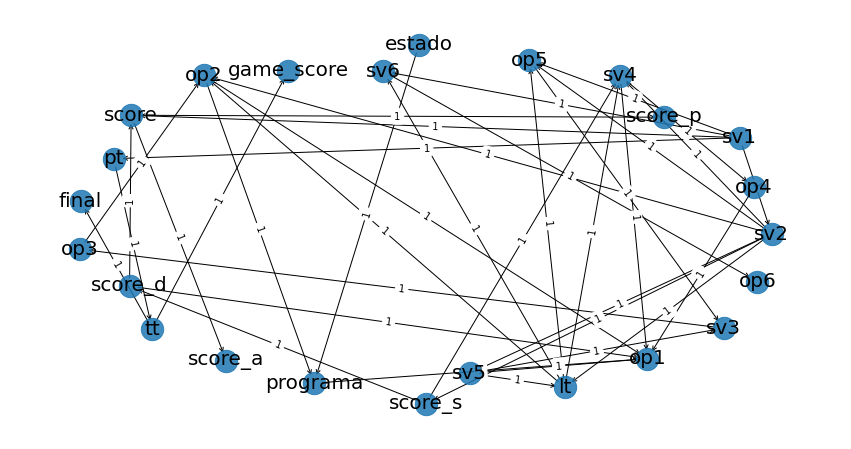

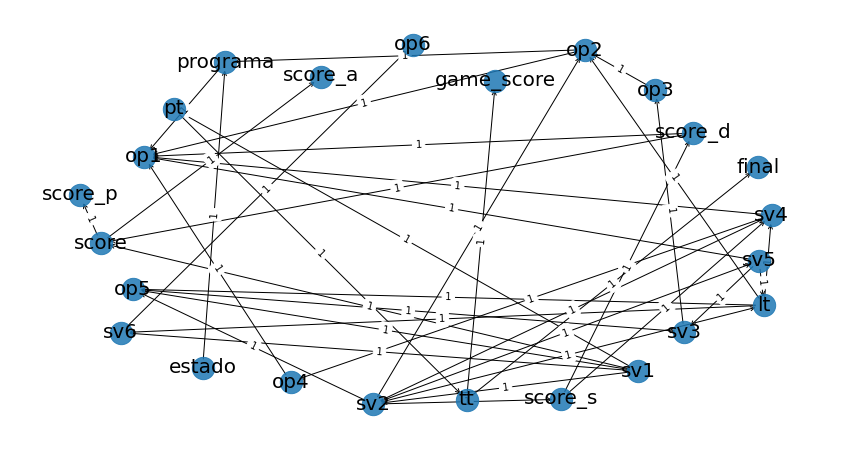

0it [00:00, ?it/s]

FILA N°: 2 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 12 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5133 |
+-----------+---------------+
| estado(1) |        0.4867 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5133 |
+-----------+---------------+
| estado(1) |        0.4867 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "fina

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":4.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 75 -> P("Estado" | [{"lt":4.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 79 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":3, "score_p":0, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":0, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":3.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 155 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5133 |
+-----------+---------------+
| estado(1) |        0.4867 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 248 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "fin


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4834 |
+-----------+---------------+
| estado(1) |        0.5166 |
+-----------+---------------+
FILA N°: 287 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 290 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5463 |
+-----------+---------------+
| estado(1) |        0.4537 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:03, ?it/s]
Finding Elimination Order: : : 0it [00:03, ?it/s]
Finding Elimination Order: : : 0it [00:02, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:01, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5279 |
+-----------+---------------+
| estado(1) |        0.4721 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":0, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":3.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5230 |
+-----------+---------------+
| estado(1) |        0.4770 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5562 |
+-----------+---------------+
| estado(1) |        0.4438 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5543 |
+-----------+---------------+
| estado(1) |        0.4457 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5279 |
+-----------+---------------+
| estado(1) |        0.4721 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5839 |
+-----------+---------------+
| estado(1) |        0.4161 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5450 |
+-----------+---------------+
| estado(1) |        0.4550 |
+-----------+---------------+
RESULTADOS DEL ENTRENAMIENTO:
(TEST) Fold 4 Accuracy          : 0.8924731182795699
(TEST) Fold 4 Balanced Accuracy : 0.7147058823529412
(TEST) Fold 4 Precision Score   : 0.9043399404067884
(TEST) Fold 4 Recall Score      : 0.8924731182795699
(TEST) Fold 4 ROC AUC     

Finding Elimination Order: : : 0it [00:00, ?it/s]


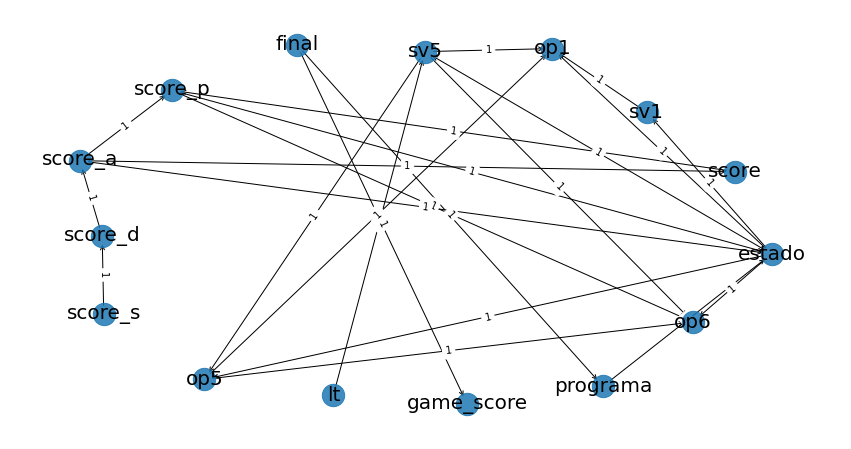

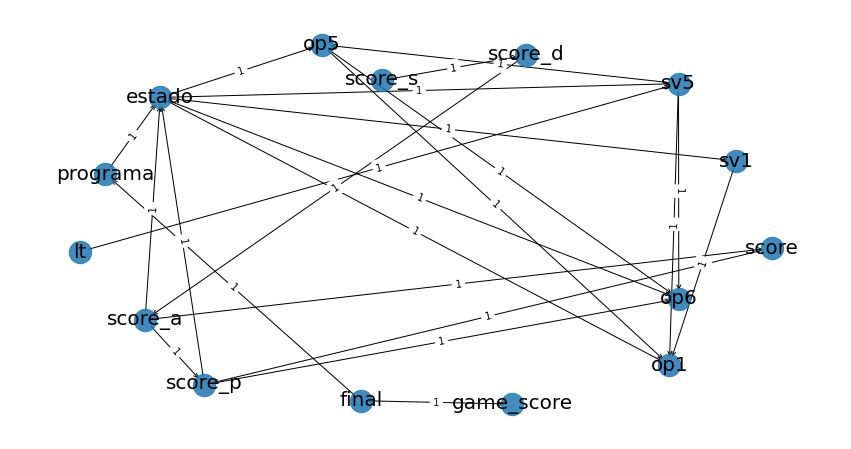

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 1 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1890 |
+-----------+---------------+
| estado(1) |        0.8110 |
+-----------+---------------+
FILA N°: 2 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6674 |
+-----------+---------------+
| estado(1) |        0.3326 |
+-----------+---------------+
FILA N°: 3 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2528 |
+-----------+---------------+
| estado(1) |        0.7472 |
+-----------+---------------+
FILA N°: 4 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4934 |
+-----------+---------------+
| estado(1) |        0.5066 |
+-----------+---------------+
FILA N°: 5 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3704 |
+-----------+---------------+
| estado(1) |        0.6296 |
+-----------+---------------+

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



FILA N°: 6 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6233 |
+-----------+---------------+
| estado(1) |        0.3767 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5349 |
+-----------+---------------+
| estado(1) |        0.4651 |
+-----------+---------------+
FILA N°: 8 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1396 |
+-----------+---------------+
| estado(1) |        0.8604 |
+-----------+---------------+
FILA N°: 9 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 10 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2785 |
+-----------+---------------+
| estado(1) |        0.7215 |
+-----------+---------------+
FILA N°: 11 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0946 |
+---



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0823 |
+-----------+---------------+
| estado(1) |        0.9177 |
+-----------+---------------+
FILA N°: 13 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1673 |
+-----------+---------------+
| estado(1) |        0.8327 |
+-----------+---------------+
FILA N°: 14 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4306 |
+-----------+---------------+
| estado(1) |        0.5694 |
+-----------+---------------+
FILA N°: 15 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1027 |
+-----------+---------------+
| estado(1) |        0.8973 |
+-----------+---------------+
FILA N°: 16 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2476 |
+-----------+---------------+
| estado(1) |        0.7524 |
+-----------+---------------+
FILA N°: 17 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2934 |
+-----------+---------------+
| estado(1) |        0.7066 |
+-----------+---------------+
FILA N°: 18 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3065 |
+-----------+---------------+
| estado(1) |        0.6935 |
+-----------+---------------+
FILA N°: 19 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6374 |
+-----------+---------------+
| estado(1) |        0.3626 |
+-----------+---------------+
FILA N°: 20 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4942 |
+-----------+---------------+
| estado(1) |        0.5058 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0936 |
+-----------+---------------+
| estado(1) |        0.9064 |
+-----------+---------------+
FILA N°: 22 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1703 |
+-----------+---------------+
| estado(1) |        0.8297 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0840 |
+-----------+---------------+
| estado(1) |        0.9160 |
+-----------+---------------+
FILA N°: 24 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6901 |
+-----------+---------------+
| estado(1) |        0.3099 |
+-----------+---------------+
FILA N°: 25 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4401 |
+-----------+---------------+
| estado(1) |        0.5599 |
+-----------+---------------+
FILA N°: 26 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1851 |
+-----------+---------------+
| estado(1) |        0.8149 |
+-----------+---------------+
FILA N°: 27 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1562 |
+-----------+---------------+
| estado(1) |        0.8438 |
+-----------+---------------+
FILA N°: 28 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5435 |
+-----------+---------------+
| estado(1) |        0.4565 |
+-----------+---------------+
FILA N°: 29 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4625 |
+-----------+---------------+
| estado(1) |        0.5375 |
+-----------+---------------+
FILA N°: 30 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1025 |
+-----------+---------------+
| estado(1) |        0.8975 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 32 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7487 |
+-----------+---------------+
| estado(1) |        0.2513 |
+-----------+---------------+
FILA N°: 33 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1789 |
+-----------+---------------+
| estado(1) |        0.8211 |
+-----------+---------------+
FILA N°: 34 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2255 |
+-----------+---------------+
| estado(1) |        0.7745 |
+-----------+---------------+
FILA N°: 35 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0529 |
+-----------+---------------+
| estado(1) |        0.9471 |
+-----------+---------------+
FILA N°: 36 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0347 |
+-----------+---------------+
| estado(1) |        0.9653 |
+-----------+---------------+
FILA N°: 37 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3943 |
+-----------+---------------+
| estado(1) |        0.6057 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3733 |
+-----------+---------------+
| estado(1) |        0.6267 |
+-----------+---------------+
FILA N°: 39 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1009 |
+-----------+---------------+
| estado(1) |        0.8991 |
+-----------+---------------+
FILA N°: 40 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..

















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 41 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2785 |
+-----------+---------------+
| estado(1) |        0.7215 |
+-----------+---------------+
FILA N°: 42 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8672 |
+-----------+---------------+
| estado(1) |        0.1328 |
+-----------+---------------+
FILA N°: 43 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..



















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7288 |
+-----------+---------------+
| estado(1) |        0.2712 |
+-----------+---------------+
FILA N°: 44 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4430 |
+-----------+---------------+
| estado(1) |        0.5570 |
+-----------+---------------+
FILA N°: 45 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4879 |
+-----------+---------------+
| estado(1) |        0.5121 |
+-----------+---------------+
FILA N°: 46 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7803 |
+-----------+---------------+
| estado(1) |        0.2197 |
+-----------+---------------+
FILA N°: 47 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3779 |
+-----------+---------------+
| estado(1) |        0.6221 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6683 |
+-----------+---------------+
| estado(1) |        0.3317 |
+-----------+---------------+
FILA N°: 49 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2584 |
+-----------+---------------+
| estado(1) |        0.7416 |
+-----------+---------------+
FILA N°: 50 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9047 |
+-----------+---------------+
| estado(1) |        0.0953 |
+-----------+---------------+
FILA N°: 51 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9387 |
+-----------+---------------+
| estado(1) |        0.0613 |
+-----------+---------------+
FILA N°: 52 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8131 |
+-----------+---------------+
| estado(1) |        0.1869 |
+-----------+---------------+
FILA N°: 53 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





















+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2474 |
+-----------+---------------+
| estado(1) |        0.7526 |
+-----------+---------------+
FILA N°: 54 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2895 |
+-----------+---------------+
| estado(1) |        0.7105 |
+-----------+---------------+
FILA N°: 55 -> P("Estado" | [{"lt":0.0, "game_score":4.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9050 |
+-----------+---------------+
| estado(1) |        0.0950 |
+-----------+---------------+
FILA N°: 56 -> P("Estado" | [{"lt":4.0, "game_score":4.0, "op1":0, "op5":0, "op6":0, "sv1":0, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8207 |
+-----------+---------------+
| estado(1) |        0.1793 |
+-----------+---------------+
FILA N°: 57 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7875 |
+-----------+---------------+
| estado(1) |        0.2125 |
+-----------+---------------+
FILA N°: 58 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7523 |
+-----------+---------------+
| estado(1) |        0.2477 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9647 |
+-----------+---------------+
| estado(1) |        0.0353 |
+-----------+---------------+
FILA N°: 60 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4940 |
+-----------+---------------+
| estado(1) |        0.5060 |
+-----------+---------------+
FILA N°: 61 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3858 |
+-----------+---------------+
| estado(1) |        0.6142 |
+-----------+---------------+
FILA N°: 62 -> P("Estado" | [{"lt":4.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6762 |
+-----------+---------------+
| estado(1) |        0.3238 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6128 |
+-----------+---------------+
| estado(1) |        0.3872 |
+-----------+---------------+
FILA N°: 64 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4505 |
+-----------+---------------+
| estado(1) |        0.5495 |
+-----------+---------------+
FILA N°: 65 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7487 |
+-----------+---------------+
| estado(1) |        0.2513 |
+-----------+---------------+
FILA N°: 66 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5740 |
+-----------+---------------+
| estado(1) |        0.4260 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6708 |
+-----------+---------------+
| estado(1) |        0.3292 |
+-----------+---------------+
FILA N°: 68 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..






















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6650 |
+-----------+---------------+
| estado(1) |        0.3350 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":2.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "sv1":0, "sv5":1, "score":3, "score_a":3, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7350 |
+-----------+---------------+
| estado(1) |        0.2650 |
+-----------+---------------+
FILA N°: 70 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [03:28, ?it/s][A

Finding Elimination Order: : : 0it [03:48, ?it/s]
Finding Elimination Order: : : 0it [03:58, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [04:18, ?it/s]
Finding Elimination Order: : : 0it [04:28, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [05:17, ?it/s]
Finding Elimination Order: : : 0it [05:27, ?it/s]


Finding Elimination Order: : : 0it [06:07, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [06:27, ?it/s]
Finding Elimination Order: : : 0it [06:17, ?it/s]


Finding Elimination Order: : : 0it [06:56, ?it/s]


Finding Elimination Order: : : 0it [00:20, ?it/s]


Finding Elimination Order: : : 0it [08:06, ?it/s]
Finding El

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9082 |
+-----------+---------------+
| estado(1) |        0.0918 |
+-----------+---------------+
FILA N°: 71 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":7, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5736 |
+-----------+---------------+
| estado(1) |        0.4264 |
+-----------+---------------+
FILA N°: 72 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0840 |
+---

0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [11:10, ?it/s]
Finding Elimination Order: : : 0it [08:50, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [07:30, ?it/s]
Finding Elimination Order: : : 0it [05:20, ?it/s]


Finding Elimination Order: : : 0it [03:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:40, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4598 |
+-----------+---------------+
| estado(1) |        0.5402 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8886 |
+-----------+---------------+
| estado(1) |        0.1114 |
+-----------+---------------+
FILA N°: 78 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7249 |
+---




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9392 |
+-----------+---------------+
| estado(1) |        0.0608 |
+-----------+---------------+
FILA N°: 81 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7469 |
+-----------+---------------+
| estado(1) |        0.2531 |
+-----------+---------------+
FILA N°: 82 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7875 |
+-----------+---------------+
| estado(1) |        0.2125 |
+-----------+---------------+
FILA N°: 83 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8661 |
+-----------+---------------+
| estado(1) |        0.1339 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7619 |
+-----------+---------------+
| estado(1) |        0.2381 |
+-----------+---------------+
FILA N°: 85 -> P("Estado" | [{"lt":1.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9494 |
+-----------+---------------+
| estado(1) |        0.0506 |
+-----------+---------------+
FILA N°: 86 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8803 |
+-----------+---------------+
| estado(1) |        0.1197 |
+-----------+---------------+
FILA N°: 87 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9168 |
+-----------+---------------+
| estado(1) |        0.0832 |
+-----------+---------------+
FILA N°: 88 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8599 |
+-----------+---------------+
| estado(1) |        0.1401 |
+-----------+---------------+
FILA N°: 89 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5447 |
+-----------+---------------+
| estado(1) |        0.4553 |
+-----------+---------------+
FILA N°: 90 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7123 |
+-----------+---------------+
| estado(1) |        0.2877 |
+-----------+---------------+
FILA N°: 91 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7620 |
+-----------+---------------+
| estado(1) |        0.2380 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":3.0, "game_score":3.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5588 |
+-----------+---------------+
| estado(1) |        0.4412 |
+-----------+---------------+
FILA N°: 93 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6939 |
+-----------+---------------+
| estado(1) |        0.3061 |
+-----------+---------------+
FILA N°: 94 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5767 |
+-----------+---------------+
| estado(1) |        0.4233 |
+-----------+---------------+
FILA N°: 95 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5675 |
+-----------+---------------+
| estado(1) |        0.4325 |
+-----------+---------------+
FILA N°: 96 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6374 |
+-----------+---------------+
| estado(1) |        0.3626 |
+-----------+---------------+
FILA N°: 97 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7969 |
+-----------+---------------+
| estado(1) |        0.2031 |
+-----------+---------------+
FILA N°: 98 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..

















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4823 |
+-----------+---------------+
| estado(1) |        0.5177 |
+-----------+---------------+
FILA N°: 99 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":0, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8166 |
+-----------+---------------+
| estado(1) |        0.1834 |
+-----------+---------------+
FILA N°: 100 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7831 |
+-----------+---------------+
| estado(1) |        0.2169 |
+-----------+---------------+
FILA N°: 101 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":0, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1590 |
+-----------+---------------+
| estado(1) |        0.8410 |
+-----------+---------------+
FILA N°: 102 -> P("Estado" | [{"lt":1.0, "game_score":3.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8765 |
+-----------+---------------+
| estado(1) |        0.1235 |
+-----------+---------------+
FILA N°: 103 -> P("Estado" | [{"lt":3.0, "game_score":4.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6040 |
+-----------+---------------+
| estado(1) |        0.3960 |
+-----------+---------------+
FILA N°: 104 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9365 |
+-----------+---------------+
| estado(1) |        0.0635 |
+-----------+---------------+
FILA N°: 105 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8045 |
+-----------+---------------+
| estado(1) |        0.1955 |
+-----------+---------------+
FILA N°: 106 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":4, "score_d":1, "score_s":0, "programa":1, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5937 |
+-----------+---------------+
| estado(1) |        0.4063 |
+-----------+---------------+
FILA N°: 107 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5429 |
+-----------+---------------+
| estado(1) |        0.4571 |
+-----------+---------------+
FILA N°: 108 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6799 |
+-----------+---------------+
| estado(1) |        0.3201 |
+-----------+---------------+
FILA N°: 109 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9272 |
+-----------+---------------+
| estado(1) |        0.0728 |
+-----------+---------------+
FILA N°: 110 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9345 |
+-----------+---------------+
| estado(1) |        0.0655 |
+-----------+---------------+
FILA N°: 111 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8659 |
+-----------+---------------+
| estado(1) |        0.1341 |
+-----------+---------------+
FILA N°: 112 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":10, "score_a":7, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0762 |
+-----------+---------------+
| estado(1) |        0.9238 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8413 |
+-----------+---------------+
| estado(1) |        0.1587 |
+-----------+---------------+
FILA N°: 114 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8746 |
+-----------+---------------+
| estado(1) |        0.1254 |
+-----------+---------------+
FILA N°: 115 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8348 |
+-----------+---------------+
| estado(1) |        0.1652 |
+-----------+---------------+
FILA N°: 116 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":1, "score_a":1, "score_p":0, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7895 |
+-----------+---------------+
| estado(1) |        0.2105 |
+-----------+---------------+
FILA N°: 117 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8746 |
+-----------+---------------+
| estado(1) |        0.1254 |
+-----------+---------------+
FILA N°: 118 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9204 |
+-----------+---------------+
| estado(1) |        0.0796 |
+-----------+---------------+
FILA N°: 119 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":7, "score_p":1, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2781 |
+-----------+---------------+
| estado(1) |        0.7219 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7632 |
+-----------+---------------+
| estado(1) |        0.2368 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3903 |
+-----------+---------------+
| estado(1) |        0.6097 |
+-----------+---------------+
FILA N°: 122 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7620 |
+-----------+---------------+
| estado(1) |        0.2380 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8502 |
+-----------+---------------+
| estado(1) |        0.1498 |
+-----------+---------------+
FILA N°: 124 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8502 |
+-----------+---------------+
| estado(1) |        0.1498 |
+-----------+---------------+
FILA N°: 125 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8554 |
+-----------+---------------+
| estado(1) |        0.1446 |
+-----------+---------------+
FILA N°: 126 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9226 |
+-----------+---------------+
| estado(1) |        0.0774 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8426 |
+-----------+---------------+
| estado(1) |        0.1574 |
+-----------+---------------+
FILA N°: 128 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":2, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8928 |
+-----------+---------------+
| estado(1) |        0.1072 |
+-----------+---------------+
FILA N°: 129 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7681 |
+-----------+---------------+
| estado(1) |        0.2319 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":1.0, "game_score":3.0, "op1":0, "op5":1, "op6":1, "sv1":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4925 |
+-----------+---------------+
| estado(1) |        0.5075 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":2, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5830 |
+-----------+---------------+
| estado(1) |        0.4170 |
+-----------+---------------+
FILA N°: 132 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6473 |
+-----------+---------------+
| estado(1) |        0.3527 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8117 |
+-----------+---------------+
| estado(1) |        0.1883 |
+-----------+---------------+
FILA N°: 134 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4501 |
+-




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3762 |
+-----------+---------------+
| estado(1) |        0.6238 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":2.0, "game_score":3.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7940 |
+-----------+---------------+
| estado(1) |        0.2060 |
+-----------+---------------+
FILA N°: 137 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":2, "score_a":2, "score_p":1, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [19:38, ?it/s]
Finding Elimination Order: : : 0it [03:08, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:46, ?it/s]
Finding Elimination Order: : : 0it [02:46, ?it/s]
Finding Elimination Order: : : 0it [02:46, ?it/s]
Finding Elimination Order: : : 0it [02:46, ?it/s]
Finding Elimination Order: : : 0it [02:46, ?it/s]
Finding Elimination Order: : : 0it [02:25, ?it/s]
Finding Elimination Order: : : 0it [02:25, ?it/s]
Finding Elimination Order: : : 0it [02:05, ?it/s]
Finding Elimination Order: : : 0it [02:05, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8654 |
+-----------+---------------+
| estado(1) |        0.1346 |
+-----------+---------------+
FILA N°: 138 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8161 |
+-----------+---------------+
| estado(1) |        0.1839 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8190 |
+-----------+---------------+
| estado(1) |        0.1810 |
+-----------+---------------+
FILA N°: 140 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6652 |
+-----------+---------------+
| estado(1) |        0.3348 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9411 |
+-----------+---------------+
| estado(1) |        0.0589 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8143 |
+-----------+---------------+
| estado(1) |        0.1857 |
+-----------+---------------+
FILA N°: 143 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":4, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8104 |
+-----------+---------------+
| estado(1) |        0.1896 |
+-----------+---------------+
FILA N°: 144 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7864 |
+-----------+---------------+
| estado(1) |        0.2136 |
+-----------+---------------+
FILA N°: 145 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8737 |
+-----------+---------------+
| estado(1) |        0.1263 |
+-----------+---------------+
FILA N°: 146 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2107 |
+-----------+---------------+
| estado(1) |        0.7893 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7969 |
+-----------+---------------+
| estado(1) |        0.2031 |
+-----------+---------------+
FILA N°: 148 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4839 |
+-----------+---------------+
| estado(1) |        0.5161 |
+-----------+---------------+
FILA N°: 149 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1204 |
+-----------+---------------+
| estado(1) |        0.8796 |
+-----------+---------------+
FILA N°: 150 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":5, "score_p":1, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4981 |
+-----------+---------------+
| estado(1) |        0.5019 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6158 |
+-----------+---------------+
| estado(1) |        0.3842 |
+-----------+---------------+
FILA N°: 152 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7303 |
+-----------+---------------+
| estado(1) |        0.2697 |
+-----------+---------------+
FILA N°: 153 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7710 |
+-----------+---------------+
| estado(1) |        0.2290 |
+-----------+---------------+
FILA N°: 154 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":6, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8313 |
+-----------+---------------+
| estado(1) |        0.1687 |
+-----------+---------------+
FILA N°: 155 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8554 |
+-----------+---------------+
| estado(1) |        0.1446 |
+-----------+---------------+
FILA N°: 156 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6606 |
+-----------+---------------+
| estado(1) |        0.3394 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8911 |
+-----------+---------------+
| estado(1) |        0.1089 |
+-----------+---------------+
FILA N°: 158 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8843 |
+-----------+---------------+
| estado(1) |        0.1157 |
+-----------+---------------+
FILA N°: 159 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":5, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9255 |
+-----------+---------------+
| estado(1) |        0.0745 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":2, "score_a":1, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8958 |
+-----------+---------------+
| estado(1) |        0.1042 |
+-----------+---------------+
FILA N°: 161 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4848 |
+-----------+---------------+
| estado(1) |        0.5152 |
+-----------+---------------+
FILA N°: 162 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":2, "score_a":2, "score_p":0, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7264 |
+-



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5429 |
+-----------+---------------+
| estado(1) |        0.4571 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1474 |
+-----------+---------------+
| estado(1) |        0.8526 |
+-----------+---------------+
FILA N°: 165 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":1, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6442 |
+-



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7032 |
+-----------+---------------+
| estado(1) |        0.2968 |
+-----------+---------------+
FILA N°: 167 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5359 |
+-----------+---------------+
| estado(1) |        0.4641 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":5, "score_d":0, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5946 |
+-




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8666 |
+-----------+---------------+
| estado(1) |        0.1334 |
+-----------+---------------+
FILA N°: 170 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":4, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8316 |
+-----------+---------------+
| estado(1) |        0.1684 |
+-----------+---------------+
FILA N°: 171 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9411 |
+





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9241 |
+-----------+---------------+
| estado(1) |        0.0759 |
+-----------+---------------+
FILA N°: 173 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8567 |
+-----------+---------------+
| estado(1) |        0.1433 |
+-----------+---------------+
FILA N°: 174 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6505 |
+-----------+---------------+
| estado(1) |        0.3495 |
+-----------+---------------+
FILA N°: 175 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5209 |
+-----------+---------------+
| estado(1) |        0.4791 |
+-----------+---------------+
FILA N°: 176 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2659 |
+-----------+---------------+
| estado(1) |        0.7341 |
+-----------+---------------+
FILA N°: 177 -> P("Estado" | [{"lt":3.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7001 |
+-----------+---------------+
| estado(1) |        0.2999 |
+-----------+---------------+
FILA N°: 178 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9710 |
+-----------+---------------+
| estado(1) |        0.0290 |
+-----------+---------------+
FILA N°: 179 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8552 |
+-----------+---------------+
| estado(1) |        0.1448 |
+-----------+---------------+
FILA N°: 180 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7977 |
+-----------+---------------+
| estado(1) |        0.2023 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":1, "score_a":1, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5156 |
+-----------+---------------+
| estado(1) |        0.4844 |
+-----------+---------------+
FILA N°: 182 -> P("Estado" | [{"lt":1.0, "game_score":3.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":5, "score_p":1, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8399 |
+-














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7607 |
+-----------+---------------+
| estado(1) |        0.2393 |
+-----------+---------------+
FILA N°: 184 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6585 |
+-----------+---------------+
| estado(1) |        0.3415 |
+-----------+---------------+
FILA N°: 185 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5887 |
+















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2991 |
+-----------+---------------+
| estado(1) |        0.7009 |
+-----------+---------------+
FILA N°: 187 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6891 |
+-----------+---------------+
| estado(1) |        0.3109 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8911 |
+-----------+---------------+
| estado(1) |        0.1089 |
+-----------+---------------+
FILA N°: 189 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9710 |
+-----------+---------------+
| estado(1) |        0.0290 |
+-----------+---------------+
FILA N°: 190 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:10, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8749 |
+-----------+---------------+
| estado(1) |        0.1251 |
+-----------+---------------+
FILA N°: 191 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9409 |
+-----------+---------------+
| estado(1) |        0.0591 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3665 |
+-




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5903 |
+-----------+---------------+
| estado(1) |        0.4097 |
+-----------+---------------+
FILA N°: 194 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6962 |
+-----------+---------------+
| estado(1) |        0.3038 |
+-----------+---------------+
FILA N°: 195 -> P("Estado" | [{"lt":1.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8155 |
+-----------+---------------+
| estado(1) |        0.1845 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8348 |
+-----------+---------------+
| estado(1) |        0.1652 |
+-----------+---------------+
FILA N°: 197 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6237 |
+-




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8109 |
+-----------+---------------+
| estado(1) |        0.1891 |
+-----------+---------------+
FILA N°: 199 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8934 |
+-----------+---------------+
| estado(1) |        0.1066 |
+-----------+---------------+
FILA N°: 200 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5931 |
+-----------+---------------+
| estado(1) |        0.4069 |
+-----------+---------------+
FILA N°: 201 -> P("Estado" | [{"lt":3.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":2, "score_p":3, "score_d":3, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2283 |
+-----------+---------------+
| estado(1) |        0.7717 |
+-----------+---------------+
FILA N°: 202 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9684 |
+-----------+---------------+
| estado(1) |        0.0316 |
+-----------+---------------+
FILA N°: 203 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8502 |
+-----------+---------------+
| estado(1) |        0.1498 |
+-----------+---------------+
FILA N°: 204 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8694 |
+-----------+---------------+
| estado(1) |        0.1306 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9710 |
+-----------+---------------+
| estado(1) |        0.0290 |
+-----------+---------------+
FILA N°: 206 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4424 |
+-----------+---------------+
| estado(1) |        0.5576 |
+-----------+---------------+
FILA N°: 207 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9187 |
+-----------+---------------+
| estado(1) |        0.0813 |
+-----------+---------------+
FILA N°: 208 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4659 |
+-----------+---------------+
| estado(1) |        0.5341 |
+-----------+---------------+
FILA N°: 209 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6099 |
+-----------+---------------+
| estado(1) |        0.3901 |
+-----------+---------------+
FILA N°: 210 -> P("Estado" | [{"lt":1.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3785 |
+-




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [03:06, ?it/s]
Finding Elimination Order: : : 0it [02:46, ?it/s]
Finding Elimination Order: : : 0it [02:25, ?it/s]
Finding Elimination Order: : : 0it [02:05, ?it/s]
Finding Elimination Order: : : 0it [02:05, ?it/s]
Finding Elimination Order: : : 0it [02:05, ?it/s]
Finding Elimination Order: : : 0it [02:05, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [01:43, ?it/s]
Finding Elimination Order: : : 0it [01:23, ?it/s]
Finding Elimination Order: : : 0it [01:23, ?it/s]
Finding Elimination Order: : : 0it [01:23, ?it/s]
Finding Elimination Order: : : 0it [01:23, ?it/s]
Finding Elimination Order: : :

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8287 |
+-----------+---------------+
| estado(1) |        0.1713 |
+-----------+---------------+
FILA N°: 212 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7275 |
+-----------+---------------+
| estado(1) |        0.2725 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9247 |
+-----------+---------------+
| estado(1) |        0.0753 |
+-----------+---------------+
FILA N°: 214 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7632 |
+-----------+---------------+
| estado(1) |        0.2368 |
+-----------+---------------+
FILA N°: 215 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5155 |
+-----------+---------------+
| estado(1) |        0.4845 |
+-----------+---------------+
FILA N°: 216 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1170 |
+-----------+---------------+
| estado(1) |        0.8830 |
+-----------+---------------+
FILA N°: 217 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5470 |
+-----------+---------------+
| estado(1) |        0.4530 |
+-----------+---------------+
FILA N°: 218 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6714 |
+-----------+---------------+
| estado(1) |        0.3286 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":4.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":0, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8244 |
+-----------+---------------+
| estado(1) |        0.1756 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4693 |
+-----------+---------------+
| estado(1) |        0.5307 |
+-----------+---------------+
FILA N°: 221 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7539 |
+-----------+---------------+
| estado(1) |        0.2461 |
+-----------+---------------+
FILA N°: 222 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6903 |
+-----------+---------------+
| estado(1) |        0.3097 |
+-----------+---------------+
FILA N°: 223 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7046 |
+-----------+---------------+
| estado(1) |        0.2954 |
+-----------+---------------+
FILA N°: 224 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3458 |
+-----------+---------------+
| estado(1) |        0.6542 |
+-----------+---------------+
FILA N°: 225 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9098 |
+-




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6610 |
+-----------+---------------+
| estado(1) |        0.3390 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5396 |
+-----------+---------------+
| estado(1) |        0.4604 |
+-----------+---------------+
FILA N°: 228 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5472 |
+-----------+---------------+
| estado(1) |        0.4528 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8956 |
+-----------+---------------+
| estado(1) |        0.1044 |
+-----------+---------------+
FILA N°: 230 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":0, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8023 |
+-----------+---------------+
| estado(1) |        0.1977 |
+-----------+---------------+
FILA N°: 231 -> P("Estado" | [{"lt":2.0, "game_score":4.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9272 |
+-----------+---------------+
| estado(1) |        0.0728 |
+-----------+---------------+
FILA N°: 232 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5520 |
+-----------+---------------+
| estado(1) |        0.4480 |
+-----------+---------------+
FILA N°: 233 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6652 |
+-----------+---------------+
| estado(1) |        0.3348 |
+-----------+---------------+
FILA N°: 234 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7806 |
+-











0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3600 |
+-----------+---------------+
| estado(1) |        0.6400 |
+-----------+---------------+
FILA N°: 236 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6626 |
+-----------+---------------+
| estado(1) |        0.3374 |
+-----------+---------------+
FILA N°: 237 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9050 |
+-----------+---------------+
| estado(1) |        0.0950 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":6, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8378 |
+-----------+---------------+
| estado(1) |        0.1622 |
+-----------+---------------+
FILA N°: 239 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9296 |
+-----------+---------------+
| estado(1) |        0.0704 |
+-----------+---------------+
FILA N°: 240 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7461 |
+-----------+---------------+
| estado(1) |        0.2539 |
+-----------+---------------+
FILA N°: 241 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7529 |
+-----------+---------------+
| estado(1) |        0.2471 |
+-----------+---------------+
FILA N°: 242 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7998 |
+-----------+---------------+
| estado(1) |        0.2002 |
+-----------+---------------+
FILA N°: 243 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7693 |
+-----------+---------------+
| estado(1) |        0.2307 |
+-----------+---------------+
FILA N°: 244 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8420 |
+-----------+---------------+
| estado(1) |        0.1580 |
+-----------+---------------+
FILA N°: 245 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":7, "score_p":3, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5155 |
+-----------+---------------+
| estado(1) |        0.4845 |
+-----------+---------------+
FILA N°: 246 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6683 |
+-----------+---------------+
| estado(1) |        0.3317 |
+-----------+---------------+
FILA N°: 247 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4528 |
+-




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9345 |
+-----------+---------------+
| estado(1) |        0.0655 |
+-----------+---------------+
FILA N°: 249 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9532 |
+-----------+---------------+
| estado(1) |        0.0468 |
+-----------+---------------+
FILA N°: 250 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":1, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7972 |
+




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4528 |
+-----------+---------------+
| estado(1) |        0.5472 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7063 |
+-----------+---------------+
| estado(1) |        0.2937 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3431 |
+-----------+---------------+
| estado(1) |        0.6569 |
+-----------+---------------+
FILA N°: 254 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":3, "score_a":2, "score_p":0, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4208 |
+-----------+---------------+
| estado(1) |        0.5792 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8040 |
+-----------+---------------+
| estado(1) |        0.1960 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4683 |
+-----------+---------------+
| estado(1) |        0.5317 |
+-----------+---------------+
FILA N°: 257 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6606 |
+-----------+---------------+
| estado(1) |        0.3394 |
+-----------+---------------+
FILA N°: 258 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7998 |
+-----------+---------------+
| estado(1) |        0.2002 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":2, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6526 |
+-----------+---------------+
| estado(1) |        0.3474 |
+-----------+---------------+
FILA N°: 260 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":0, "sv5":0, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4184 |
+-----------+---------------+
| estado(1) |        0.5816 |
+-----------+---------------+
FILA N°: 261 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":1, "score_p":2, "score_d":1, "score_s":1, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [01:25, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8023 |
+-----------+---------------+
| estado(1) |        0.1977 |
+-----------+---------------+
FILA N°: 262 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [01:25, ?it/s]
Finding Elimination Order: : : 0it [01:05, ?it/s]
Finding Elimination Order: : : 0it [01:05, ?it/s]
Finding Elimination Order: : : 0it [01:05, ?it/s]
Finding Elimination Order: : : 0it [01:04, ?it/s]
Finding Elimination Order: : : 0it [01:04, ?it/s]
Finding Elimination Order: : : 0it [01:04, ?it/s]
Finding Elimination Order: : : 0it [01:04, ?it/s]
Finding Elimination Order: : : 0it [00:44, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:43, ?it/s]
Finding Elimination Order: : : 0it [00:42, ?it/s]
Finding Elimination Order: : : 0it [00:42, ?it/s]
Finding Elimination Order: : : 0it [00:42, ?it/s]
Finding Elimination Order: : : 0it [00:22, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4934 |
+-----------+---------------+
| estado(1) |        0.5066 |
+-----------+---------------+
FILA N°: 263 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7443 |
+-----------+---------------+
| estado(1) |        0.2557 |
+-----------+---------------+
FILA N°: 264 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6643 |
+-----------+---------------+
| estado(1) |        0.3357 |
+-----------+---------------+
FILA N°: 265 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8040 |
+-----------+---------------+
| estado(1) |        0.1960 |
+-----------+---------------+
FILA N°: 266 -> P("Estado" | [{"lt":3.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2241 |
+-----------+---------------+
| estado(1) |        0.7759 |
+-----------+---------------+
FILA N°: 267 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8959 |
+-----------+---------------+
| estado(1) |        0.1041 |
+-----------+---------------+
FILA N°: 268 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":4, "score_d":2, "score_s":0, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3964 |
+-----------+---------------+
| estado(1) |        0.6036 |
+-----------+---------------+
FILA N°: 269 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3515 |
+-----------+---------------+
| estado(1) |        0.6485 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7635 |
+-----------+---------------+
| estado(1) |        0.2365 |
+-----------+---------------+
FILA N°: 271 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":7, "score_p":2, "score_d":3, "score_s":4, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5736 |
+-----------+---------------+
| estado(1) |        0.4264 |
+-----------+---------------+
FILA N°: 272 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6579 |
+-----------+---------------+
| estado(1) |        0.3421 |
+-----------+---------------+
FILA N°: 273 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8554 |
+-----------+---------------+
| estado(1) |        0.1446 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9188 |
+-----------+---------------+
| estado(1) |        0.0812 |
+-----------+---------------+
FILA N°: 275 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7619 |
+-----------+---------------+
| estado(1) |        0.2381 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8225 |
+-----------+---------------+
| estado(1) |        0.1775 |
+-----------+---------------+
FILA N°: 277 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8166 |
+-----------+---------------+
| estado(1) |        0.1834 |
+-----------+---------------+
FILA N°: 278 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8899 |
+-----------+---------------+
| estado(1) |        0.1101 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5922 |
+-----------+---------------+
| estado(1) |        0.4078 |
+-----------+---------------+
FILA N°: 280 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7701 |
+-----------+---------------+
| estado(1) |        0.2299 |
+-----------+---------------+
FILA N°: 281 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7124 |
+-----------+---------------+
| estado(1) |        0.2876 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8956 |
+-----------+---------------+
| estado(1) |        0.1044 |
+-----------+---------------+
FILA N°: 283 -> P("Estado" | [{"lt":2.0, "game_score":3.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9477 |
+-----------+---------------+
| estado(1) |        0.0523 |
+-----------+---------------+
FILA N°: 284 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":4, "score_s":4, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8420 |
+-----------+---------------+
| estado(1) |        0.1580 |
+-----------+---------------+
FILA N°: 285 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3943 |
+-----------+---------------+
| estado(1) |        0.6057 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7607 |
+-















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5727 |
+-----------+---------------+
| estado(1) |        0.4273 |
+-----------+---------------+
FILA N°: 288 -> P("Estado" | [{"lt":0.0, "game_score":4.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5341 |
+-----------+---------------+
| estado(1) |        0.4659 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3228 |
+-
















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5864 |
+-----------+---------------+
| estado(1) |        0.4136 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":5, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8981 |
+-----------+---------------+
| estado(1) |        0.1019 |
+-----------+---------------+
FILA N°: 292 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..



















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6141 |
+-----------+---------------+
| estado(1) |        0.3859 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8340 |
+-----------+---------------+
| estado(1) |        0.1660 |
+-----------+---------------+
FILA N°: 294 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7499 |
+-



















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:10, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7303 |
+-----------+---------------+
| estado(1) |        0.2697 |
+-----------+---------------+
FILA N°: 296 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9248 |
+-----------+---------------+
| estado(1) |        0.0752 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6239 |
+




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


FILA N°: 298 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6574 |
+-----------+---------------+
| estado(1) |        0.3426 |
+-----------+---------------+
FILA N°: 299 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7701 |
+-----------+---------------+
| estado(1) |        0.2299 |
+-----------+---------------+
FILA N°: 300 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9072 |
+-----------+---------------+
| estado(1) |        0.0928 |
+-----------+---------------+
FILA N°: 301 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1373 |
+-----------+---------------+
| estado(1) |        0.8627 |
+-----------+---------------+
FILA N°: 302 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7689 |
+-----------+---------------+
| estado(1) |        0.2311 |
+-----------+---------------+
FILA N°: 303 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6093 |
+-----------+---------------+
| estado(1) |        0.3907 |
+-----------+---------------+
FILA N°: 304 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8045 |
+-----------+---------------+
| estado(1) |        0.1955 |
+-----------+---------------+
FILA N°: 305 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":0, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5735 |
+-----------+---------------+
| estado(1) |        0.4265 |
+-----------+---------------+
FILA N°: 306 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8042 |
+-----------+---------------+
| estado(1) |        0.1958 |
+-----------+---------------+
FILA N°: 307 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":1, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9256 |
+-----------+---------------+
| estado(1) |        0.0744 |
+-----------+---------------+
FILA N°: 308 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5410 |
+-----------+---------------+
| estado(1) |        0.4590 |
+-----------+---------------+
FILA N°: 309 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8179 |
+-




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8016 |
+-----------+---------------+
| estado(1) |        0.1984 |
+-----------+---------------+
FILA N°: 311 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7676 |
+-----------+---------------+
| estado(1) |        0.2324 |
+-----------+---------------+
FILA N°: 312 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7851 |
+-----------+---------------+
| estado(1) |        0.2149 |
+-----------+---------------+
FILA N°: 313 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0936 |
+-----------+---------------+
| estado(1) |        0.9064 |
+-----------+---------------+
FILA N°: 314 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9140 |
+-----------+---------------+
| estado(1) |        0.0860 |
+-----------+---------------+
FILA N°: 315 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3076 |
+-----------+---------------+
| estado(1) |        0.6924 |
+-----------+---------------+
FILA N°: 316 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..






















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3992 |
+-----------+---------------+
| estado(1) |        0.6008 |
+-----------+---------------+
FILA N°: 317 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8824 |
+-----------+---------------+
| estado(1) |        0.1176 |
+-----------+---------------+
FILA N°: 318 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9411 |
+-----------+---------------+
| estado(1) |        0.0589 |
+-----------+---------------+
FILA N°: 319 -> P("Estado" | [{"lt":2.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9025 |
+-----------+---------------+
| estado(1) |        0.0975 |
+-----------+---------------+
FILA N°: 320 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8251 |
+-----------+---------------+
| estado(1) |        0.1749 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":5, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8749 |
+-----------+---------------+
| estado(1) |        0.1251 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [03:27, ?it/s]
Finding Elimination Order: : : 0it [03:27, ?it/s]
Finding Elimination Order: : : 0it [03:26, ?it/s]
Finding Elimination Order: : : 0it [03:26, ?it/s]
Finding Elimination Order: : : 0it [03:26, ?it/s]
Finding Elimination Order: : : 0it [03:26, ?it/s]
Finding Elimination Order: : : 0it [03:26, ?it/s]
Finding Elimination Order: : : 0it [03:05, ?it/s]
Finding Elimination Order: : : 0it [03:05, ?it/s]
Finding Elimination Order: : : 0it [03:05, ?it/s]
Finding Elimination Order: : : 0it [03:05, ?it/s]
Finding Elimination Order: : : 0it [03:05, ?it/s]
Finding Elimination Order: : : 0it [03:05, ?it/s]
Finding Elimination Order: : : 0it [02:44, ?it/s]
Finding Elimination Order: : : 0it [02:24, ?it/s]
Finding Elimination Order: : : 0it [02:24, ?it/s]
Finding Elimination Order: : :

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8661 |
+-----------+---------------+
| estado(1) |        0.1339 |
+-----------+---------------+
FILA N°: 323 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4682 |
+-----------+---------------+
| estado(1) |        0.5318 |
+-----------+---------------+
FILA N°: 324 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8903 |
+-----------+---------------+
| estado(1) |        0.1097 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1225 |
+-----------+---------------+
| estado(1) |        0.8775 |
+-----------+---------------+
FILA N°: 326 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8300 |
+-----------+---------------+
| estado(1) |        0.1700 |
+-----------+---------------+
FILA N°: 327 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":12, "score_a":8, "score_p":5, "score_d":4, "score_s":4, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5223 |
+-----------+---------------+
| estado(1) |        0.4777 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3707 |
+-----------+---------------+
| estado(1) |        0.6293 |
+-----------+---------------+
FILA N°: 329 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5845 |
+-----------+---------------+
| estado(1) |        0.4155 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8702 |
+-----------+---------------+
| estado(1) |        0.1298 |
+-----------+---------------+
FILA N°: 331 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5767 |
+-----------+---------------+
| estado(1) |        0.4233 |
+-----------+---------------+
FILA N°: 332 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5027 |
+-----------+---------------+
| estado(1) |        0.4973 |
+-----------+---------------+
FILA N°: 333 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4556 |
+-----------+---------------+
| estado(1) |        0.5444 |
+-----------+---------------+
FILA N°: 334 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6591 |
+-----------+---------------+
| estado(1) |        0.3409 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8899 |
+-----------+---------------+
| estado(1) |        0.1101 |
+-----------+---------------+
FILA N°: 336 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7303 |
+-----------+---------------+
| estado(1) |        0.2697 |
+-----------+---------------+
FILA N°: 337 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6295 |
+-----------+---------------+
| estado(1) |        0.3705 |
+-----------+---------------+
FILA N°: 338 -> P("Estado" | [{"lt":2.0, "game_score":3.0, "op1":0, "op5":1, "op6":0, "sv1":0, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9557 |
+-----------+---------------+
| estado(1) |        0.0443 |
+-----------+---------------+
FILA N°: 339 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8348 |
+-----------+---------------+
| estado(1) |        0.1652 |
+-----------+---------------+
FILA N°: 340 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9072 |
+-----------+---------------+
| estado(1) |        0.0928 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":0, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8554 |
+-----------+---------------+
| estado(1) |        0.1446 |
+-----------+---------------+
FILA N°: 342 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9345 |
+-----------+---------------+
| estado(1) |        0.0655 |
+-----------+---------------+
FILA N°: 343 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7693 |
+-----------+---------------+
| estado(1) |        0.2307 |
+-----------+---------------+
FILA N°: 344 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9392 |
+-----------+---------------+
| estado(1) |        0.0608 |
+-----------+---------------+
FILA N°: 345 -> P("Estado" | [{"lt":3.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":1, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7990 |
+-----------+---------------+
| estado(1) |        0.2010 |
+-----------+---------------+
FILA N°: 346 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7972 |
+-----------+---------------+
| estado(1) |        0.2028 |
+-----------+---------------+
FILA N°: 347 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7992 |
+-----------+---------------+
| estado(1) |        0.2008 |
+-----------+---------------+
FILA N°: 348 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8843 |
+-----------+---------------+
| estado(1) |        0.1157 |
+-----------+---------------+
FILA N°: 349 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7203 |
+-----------+---------------+
| estado(1) |        0.2797 |
+-----------+---------------+
FILA N°: 350 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1671 |
+-----------+---------------+
| estado(1) |        0.8329 |
+-----------+---------------+
FILA N°: 351 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4850 |
+-----------+---------------+
| estado(1) |        0.5150 |
+-----------+---------------+
FILA N°: 352 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":1, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8171 |
+-----------+---------------+
| estado(1) |        0.1829 |
+-----------+---------------+
FILA N°: 353 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7972 |
+-----------+---------------+
| estado(1) |        0.2028 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5957 |
+-----------+---------------+
| estado(1) |        0.4043 |
+-----------+---------------+
FILA N°: 355 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9517 |
+-----------+---------------+
| estado(1) |        0.0483 |
+-----------+---------------+
FILA N°: 356 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8811 |
+-----------+---------------+
| estado(1) |        0.1189 |
+-----------+---------------+
FILA N°: 357 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7607 |
+-----------+---------------+
| estado(1) |        0.2393 |
+-----------+---------------+
FILA N°: 358 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6084 |
+-----------+---------------+
| estado(1) |        0.3916 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9570 |
+-----------+---------------+
| estado(1) |        0.0430 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7254 |
+-----------+---------------+
| estado(1) |        0.2746 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9517 |
+-----------+---------------+
| estado(1) |        0.0483 |
+-----------+---------------+
FILA N°: 362 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9710 |
+-----------+---------------+
| estado(1) |        0.0290 |
+-----------+---------------+
FILA N°: 363 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9747 |
+-----------+---------------+
| estado(1) |        0.0253 |
+-----------+---------------+
FILA N°: 364 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8154 |
+-----------+---------------+
| estado(1) |        0.1846 |
+-----------+---------------+
FILA N°: 365 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8700 |
+-----------+---------------+
| estado(1) |        0.1300 |
+-----------+---------------+
FILA N°: 366 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8382 |
+-----------+---------------+
| estado(1) |        0.1618 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8502 |
+-----------+---------------+
| estado(1) |        0.1498 |
+-----------+---------------+
FILA N°: 368 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9034 |
+-----------+---------------+
| estado(1) |        0.0966 |
+-----------+---------------+
FILA N°: 369 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8843 |
+-----------+---------------+
| estado(1) |        0.1157 |
+-----------+---------------+
FILA N°: 370 -> P("Estado" | [{"lt":0.0, "game_score":3.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.9062 |
+-----------+---------------+
| estado(1) |        0.0938 |
+-----------+---------------+
FILA N°: 371 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2808 |
+-----------+---------------+
| estado(1) |        0.7192 |
+-----------+---------------+
FILA N°: 372 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4013 |
+-----------+---------------+
| estado(1) |        0.5987 |
+-----------+---------------+
FILA N°: 373 -> P("Estado" | [{"lt":1.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5531 |
+-----------+---------------+
| estado(1) |        0.4469 |
+-----------+---------------+
FILA N°: 374 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.8899 |
+-----------+---------------+
| estado(1) |        0.1101 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":1.4243607355364776, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2629 |
+-----------+---------------+
| estado(1) |        0.7371 |
+-----------+---------------+
FILA N°: 376 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0262 |
+-----------+---------------+
| estado(1) |        0.9738 |
+-----------+---------------+
FILA N°: 377 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4887 |
+-----------+---------------+
| estado(1) |        0.5113 |
+-----------+---------------+
FILA N°: 378 -> P("Estado" | [{"lt":0.0, "game_score":0.18163960705401294, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.18163960705401294}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2546 |
+-----------+---------------+
| estado(1) |        0.7454 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":0.1861626953654918, "game_score":0.1861626953654918, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":0.1861626953654918}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1870 |
+-----------+---------------+
| estado(1) |        0.8130 |
+-----------+---------------+
FILA N°: 380 -> P("Estado" | [{"lt":0.3340682265881407, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2131 |
+-----------+---------------+
| estado(1) |        0.7869 |
+-----------+---------------+
FILA N°: 381 -> P("Estado" | [{"lt":1.8690921690216449, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1225 |
+-----------+---------------+
| estado(1) |        0.8775 |
+-----------+---------------+
FILA N°: 382 -> P("Estado" | [{"lt":0.2705751188836857, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 383 -> P("Estado" | [{"lt":0.0, "game_score":0.4223410262217645, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.4223410262217645}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 384 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 385 -> P("Estado" | [{"lt":0.0, "game_score":0.03197902111454487, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.03197902111454487}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2624 |
+-----------+---------------+
| estado(1) |        0.7376 |
+-----------+---------------+
FILA N°: 386 -> P("Estado" | [{"lt":0.0, "game_score":1.864188779629052, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.864188779629052}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1972 |
+-----------+---------------+
| estado(1) |        0.8028 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1868 |
+-----------+---------------+
| estado(1) |        0.8132 |
+-----------+---------------+
FILA N°: 389 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1703 |
+-----------+---------------+
| estado(1) |        0.8297 |
+-----------+---------------+
FILA N°: 390 -> P("Estado" | [{"lt":0.579654270720195, "game_score":0.579654270720195, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":0.579654270720195}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1975 |
+-----------+---------------+
| estado(1) |        0.8025 |
+-----------+---------------+
FILA N°: 391 -> P("Estado" | [{"lt":0.0, "game_score":0.374441888079343, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.374441888079343}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1821 |
+-----------+---------------+
| estado(1) |        0.8179 |
+-----------+---------------+
FILA N°: 392 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 393 -> P("Estado" | [{"lt":1.5972108805482803, "game_score":1.79860544027414, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.79860544027414}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1047 |
+-----------+---------------+
| estado(1) |        0.8953 |
+-----------+---------------+
FILA N°: 394 -> P("Estado" | [{"lt":0.0, "game_score":1.1430344849205683, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":5, "final":1.1430344849205683}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6233 |
+-----------+---------------+
| estado(1) |        0.3767 |
+-----------+---------------+
FILA N°: 395 -> P("Estado" | [{"lt":0.756844579194053, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1778 |
+-----------+---------------+
| estado(1) |        0.8222 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"lt":0.0, "game_score":0.6220060788046099, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":2, "score_s":1, "programa":2, "final":0.6220060788046099}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1818 |
+-----------+---------------+
| estado(1) |        0.8182 |
+-----------+---------------+
FILA N°: 397 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 398 -> P("Estado" | [{"lt":0.28583573865866096, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0700 |
+-----------+---------------+
| estado(1) |        0.9300 |
+-----------+---------------+
FILA N°: 399 -> P("Estado" | [{"lt":0.1320926031528754, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5464 |
+-----------+---------------+
| estado(1) |        0.4536 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1140 |
+-----------+---------------+
| estado(1) |        0.8860 |
+-----------+---------------+
FILA N°: 401 -> P("Estado" | [{"lt":0.10106636910277367, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2496 |
+-----------+---------------+
| estado(1) |        0.7504 |
+-----------+---------------+
FILA N°: 402 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0697 |
+-----------+---------------+
| estado(1) |        0.9303 |
+-----------+---------------+
FILA N°: 403 -> P("Estado" | [{"lt":0.892056599685054, "game_score":1.446028299842527, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":3, "final":1.446028299842527}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1124 |
+-----------+---------------+
| estado(1) |        0.8876 |
+-----------+---------------+
FILA N°: 404 -> P("Estado" | [{"lt":0.0, "game_score":1.008549577724078, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":1.008549577724078}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1537 |
+-----------+---------------+
| estado(1) |        0.8463 |
+-----------+---------------+
FILA N°: 405 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0946 |
+-----------+---------------+
| estado(1) |        0.9054 |
+-----------+---------------+
FILA N°: 406 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0946 |
+-----------+---------------+
| estado(1) |        0.9054 |
+-----------+---------------+
FILA N°: 407 -> P("Estado" | [{"lt":0.0, "game_score":1.2303407587750481, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":3, "programa":4, "final":1.2303407587750481}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0823 |
+-----------+---------------+
| estado(1) |        0.9177 |
+-----------+---------------+
FILA N°: 408 -> P("Estado" | [{"lt":0.0, "game_score":0.8221837707160633, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.8221837707160633}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1821 |
+-----------+---------------+
| estado(1) |        0.8179 |
+-----------+---------------+
FILA N°: 409 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 410 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0697 |
+-----------+---------------+
| estado(1) |        0.9303 |
+-----------+---------------+
FILA N°: 411 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0311 |
+-----------+---------------+
| estado(1) |        0.9689 |
+-----------+---------------+
FILA N°: 412 -> P("Estado" | [{"lt":0.7464266744175463, "game_score":0.7464266744175463, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":0.7464266744175463}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1407 |
+-----------+---------------+
| estado(1) |        0.8593 |
+-----------+---------------+
FILA N°: 413 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0840 |
+-----------+---------------+
| estado(1) |        0.9160 |
+-----------+---------------+
FILA N°: 414 -> P("Estado" | [{"lt":1.4158095358512255, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 415 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0262 |
+-----------+---------------+
| estado(1) |        0.9738 |
+-----------+---------------+
FILA N°: 416 -> P("Estado" | [{"lt":0.7817054280332948, "game_score":0.7817054280332948, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":0.7817054280332948}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1407 |
+-----------+---------------+
| estado(1) |        0.8593 |
+-----------+---------------+
FILA N°: 417 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":2, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4160 |
+-----------+---------------+
| estado(1) |        0.5840 |
+-----------+---------------+
FILA N°: 418 -> P("Estado" | [{"lt":0.5617175413611146, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1749 |
+-----------+---------------+
| estado(1) |        0.8251 |
+-----------+---------------+
FILA N°: 419 -> P("Estado" | [{"lt":1.2902410076628592, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0700 |
+-----------+---------------+
| estado(1) |        0.9300 |
+-----------+---------------+
FILA N°: 420 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 421 -> P("Estado" | [{"lt":0.0, "game_score":1.139698581508111, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.139698581508111}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":0.0, "game_score":0.23027489127780387, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.23027489127780387}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1537 |
+-----------+---------------+
| estado(1) |        0.8463 |
+-----------+---------------+
FILA N°: 423 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1027 |
+-----------+---------------+
| estado(1) |        0.8973 |
+-----------+---------------+
FILA N°: 424 -> P("Estado" | [{"lt":1.3505924062571417, "game_score":1.3505924062571417, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":1.3505924062571417}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2274 |
+-----------+---------------+
| estado(1) |        0.7726 |
+-----------+---------------+
FILA N°: 425 -> P("Estado" | [{"lt":0.0, "game_score":2.9098481380406445, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":2.9098481380406445}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1198 |
+-----------+---------------+
| estado(1) |        0.8802 |
+-----------+---------------+
FILA N°: 426 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1140 |
+-----------+---------------+
| estado(1) |        0.8860 |
+-----------+---------------+
FILA N°: 427 -> P("Estado" | [{"lt":0.8817551617550748, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |   






0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0262 |
+-----------+---------------+
| estado(1) |        0.9738 |
+-----------+---------------+
FILA N°: 429 -> P("Estado" | [{"lt":0.4325030503167183, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2131 |
+-----------+---------------+
| estado(1) |        0.7869 |
+-----------+---------------+
FILA N°: 430 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3041 |
+-----------+---------------+
| estado(1) |        0.6959 |
+-----------+---------------+
FILA N°: 431 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 432 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0936 |
+-----------+---------------+
| estado(1) |        0.9064 |
+-----------+---------------+
FILA N°: 433 -> P("Estado" | [{"lt":0.3019691266266046, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4327 |
+-----------+---------------+
| estado(1) |        0.5673 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":0.0, "game_score":1.6677743383533665, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.6677743383533665}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2174 |
+-----------+---------------+
| estado(1) |        0.7826 |
+-----------+---------------+
FILA N°: 435 -> P("Estado" | [{"lt":0.5592710068995254, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3870 |
+-----------+---------------+
| estado(1) |        0.6130 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0262 |
+-----------+---------------+
| estado(1) |        0.9738 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.06330384922246801, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2496 |
+-----------+---------------+
| estado(1) |        0.7504 |
+-----------+---------------+
FILA N°: 438 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4024 |
+-----------+---------------+
| estado(1) |        0.5976 |
+-----------+---------------+
FILA N°: 439 -> P("Estado" | [{"lt":0.0, "game_score":1.350127774366534, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.350127774366534}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2062 |
+-----------+---------------+
| estado(1) |        0.7938 |
+-----------+---------------+
FILA N°: 440 -> P("Estado" | [{"lt":0.0, "game_score":0.5418827909815567, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.5418827909815567}]
[bnlearn] >Variable Elimination..













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1821 |
+-----------+---------------+
| estado(1) |        0.8179 |
+-----------+---------------+
FILA N°: 441 -> P("Estado" | [{"lt":0.038792048172542115, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 442 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1868 |
+-----------+---------------+
| estado(1) |        0.8132 |
+-----------+---------------+
FILA N°: 443 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 444 -> P("Estado" | [{"lt":0.4448576299261636, "game_score":0.4448576299261636, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":0, "programa":3, "final":0.4448576299261636}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1975 |
+-----------+---------------+
| estado(1) |        0.8025 |
+-----------+---------------+
FILA N°: 445 -> P("Estado" | [{"lt":0.0, "game_score":1.2820379329964666, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.2820379329964666}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2377 |
+-----------+---------------+
| estado(1) |        0.7623 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.4843794538657532, "game_score":1.515620546134247, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.515620546134247}]
[bnlearn] >Variable Elimination..

















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1817 |
+-----------+---------------+
| estado(1) |        0.8183 |
+-----------+---------------+
FILA N°: 447 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0311 |
+-----------+---------------+
| estado(1) |        0.9689 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.6859551736243569, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..



















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3640 |
+-----------+---------------+
| estado(1) |        0.6360 |
+-----------+---------------+
FILA N°: 449 -> P("Estado" | [{"lt":0.8755413790172547, "game_score":0.8755413790172547, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":0.8755413790172547}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1462 |
+-----------+---------------+
| estado(1) |        0.8538 |
+-----------+---------------+
FILA N°: 450 -> P("Estado" | [{"lt":0.006438732251525692, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1158 |
+-----------+---------------+
| estado(1) |        0.8842 |
+-----------+---------------+
FILA N°: 451 -> P("Estado" | [{"lt":0.9051423546378161, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3930 |
+-----------+---------------+
| estado(1) |        0.6070 |
+-----------+---------------+
FILA N°: 452 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":1, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1396 |
+-----------+---------------+
| estado(1) |        0.8604 |
+-----------+---------------+
FILA N°: 453 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1140 |
+-----------+---------------+
| estado(1) |        0.8860 |
+-----------+---------------+
FILA N°: 454 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 455 -> P("Estado" | [{"lt":0.16070288854307913, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1749 |
+-----------+---------------+
| estado(1) |        0.8251 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.0, "game_score":1.795571335510889, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.795571335510889}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 457 -> P("Estado" | [{"lt":1.4985146744290203, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1225 |
+-----------+---------------+
| estado(1) |        0.8775 |
+-----------+---------------+
FILA N°: 458 -> P("Estado" | [{"lt":0.31469686585198064, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3930 |
+-----------+---------------+
| estado(1) |        0.6070 |
+-----------+---------------+
FILA N°: 459 -> P("Estado" | [{"lt":1.8476472068796093, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1778 |
+-----------+---------------+
| estado(1) |        0.8222 |
+-----------+---------------+
FILA N°: 460 -> P("Estado" | [{"lt":0.4395969093164044, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 461 -> P("Estado" | [{"lt":1.9078759556626488, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2298 |
+-----------+---------------+
| estado(1) |        0.7702 |
+-----------+---------------+
FILA N°: 462 -> P("Estado" | [{"lt":0.44467504994877927, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 463 -> P("Estado" | [{"lt":0.0, "game_score":1.1831968919813156, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.1831968919813156}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 464 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3779 |
+-----------+---------------+
| estado(1) |        0.6221 |
+-----------+---------------+
FILA N°: 465 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1027 |
+-----------+---------------+
| estado(1) |        0.8973 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":1.7944676369848307, "game_score":1.7944676369848307, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":1.7944676369848307}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 467 -> P("Estado" | [{"lt":0.21979395918361888, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2517 |
+-----------+---------------+
| estado(1) |        0.7483 |
+-----------+---------------+
FILA N°: 468 -> P("Estado" | [{"lt":0.41806556356891467, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 470 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2136 |
+-----------+---------------+
| estado(1) |        0.7864 |
+-----------+---------------+
FILA N°: 471 -> P("Estado" | [{"lt":0.0, "game_score":0.9338440762869877, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":0.9338440762869877}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1537 |
+-----------+---------------+
| estado(1) |        0.8463 |
+-----------+---------------+
FILA N°: 472 -> P("Estado" | [{"lt":0.9944155493860131, "game_score":1.9944155493860132, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":1.9944155493860132}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1434 |
+-----------+---------------+
| estado(1) |        0.8566 |
+-----------+---------------+
FILA N°: 473 -> P("Estado" | [{"lt":0.6215820959655294, "game_score":0.6215820959655294, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":0.6215820959655294}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1462 |
+-----------+---------------+
| estado(1) |        0.8538 |
+-----------+---------------+
FILA N°: 474 -> P("Estado" | [{"lt":0.9873712127557706, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5073 |
+-----------+---------------+
| estado(1) |        0.4927 |
+-----------+---------------+
FILA N°: 475 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..






















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2116 |
+-----------+---------------+
| estado(1) |        0.7884 |
+-----------+---------------+
FILA N°: 476 -> P("Estado" | [{"lt":0.13464346555409845, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2517 |
+-----------+---------------+
| estado(1) |        0.7483 |
+-----------+---------------+
FILA N°: 477 -> P("Estado" | [{"lt":0.9074987954051252, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..






















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [03:08, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:47, ?it/s]
Finding Elimination Order: : : 0it [02:27, ?it/s]
Finding Elimination Order: : : 0it [02:26, ?it/s]
Finding Elimination Order: : : 0it [02:06, ?it/s]
Finding Elimination Order: : : 0it [02:06, ?it/s]
Finding Elimination Order: : : 0it [01:46, ?it/s]
Finding Elimination Order: : : 0it [01:45, ?it/s]
Finding Elimination Order: : : 0it [01:25, ?it/s]
Finding Elimination Order: : : 0it [01:25, ?it/s]
Finding Elimination Order: : : 0it [01:05, ?it/s]
Finding Elimination Order: : : 0it [01:04, ?it/s]
Finding Elimination Order: : : 0it [01:04, ?it/s]
Finding Elimination Order: : : 0it [01:04, ?it/s]
Finding Elimination Order: : 

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2131 |
+-----------+---------------+
| estado(1) |        0.7869 |
+-----------+---------------+
FILA N°: 478 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0747 |
+-----------+---------------+
| estado(1) |        0.9253 |
+-----------+---------------+
FILA N°: 479 -> P("Estado" | [{"lt":0.0, "game_score":0.7533872310413915, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":0.7533872310413915}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1781 |
+-----------+---------------+
| estado(1) |        0.8219 |
+-----------+---------------+
FILA N°: 480 -> P("Estado" | [{"lt":0.0, "game_score":1.6442882662013305, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":1.6442882662013305}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+=

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2107 |
+-----------+---------------+
| estado(1) |        0.7893 |
+-----------+---------------+
FILA N°: 482 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0553 |
+-----------+---------------+
| estado(1) |        0.9447 |
+-----------+---------------+
FILA N°: 483 -> P("Estado" | [{"lt":1.3993034441491743, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0700 |
+-----------+---------------+
| estado(1) |        0.9300 |
+-----------+---------------+
FILA N°: 484 -> P("Estado" | [{"lt":0.0, "game_score":0.8465482681172427, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.8465482681172427}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 485 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1868 |
+-----------+---------------+
| estado(1) |        0.8132 |
+-----------+---------------+
FILA N°: 486 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5068 |
+-----------+---------------+
| estado(1) |        0.4932 |
+-----------+---------------+
FILA N°: 487 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2107 |
+-----------+---------------+
| estado(1) |        0.7893 |
+-----------+---------------+
FILA N°: 488 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0936 |
+-----------+---------------+
| estado(1) |        0.9064 |
+-----------+---------------+
FILA N°: 489 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2704 |
+-




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2131 |
+-----------+---------------+
| estado(1) |        0.7869 |
+-----------+---------------+
FILA N°: 491 -> P("Estado" | [{"lt":0.0, "game_score":2.037199938845511, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":2.037199938845511}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1919 |
+-----------+---------------+
| estado(1) |        0.8081 |
+-----------+---------------+
FILA N°: 492 -> P("Estado" | [{"lt":0.9747224632449856, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+======





0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1100 |
+-----------+---------------+
| estado(1) |        0.8900 |
+-----------+---------------+
FILA N°: 494 -> P("Estado" | [{"lt":0.0, "game_score":0.8233206362112239, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":0.8233206362112239}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1781 |
+-----------+---------------+
| estado(1) |        0.8219 |
+-----------+---------------+
FILA N°: 495 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| 






0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1868 |
+-----------+---------------+
| estado(1) |        0.8132 |
+-----------+---------------+
FILA N°: 497 -> P("Estado" | [{"lt":0.24929312460437647, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":9, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2131 |
+-----------+---------------+
| estado(1) |        0.7869 |
+-----------+---------------+
FILA N°: 498 -> P("Estado" | [{"lt":1.4466695453586509, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
|







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1002 |
+-----------+---------------+
| estado(1) |        0.8998 |
+-----------+---------------+
FILA N°: 500 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 501 -> P("Estado" | [{"lt":0.3086743221684328, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 502 -> P("Estado" | [{"lt":0.19412317264244716, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2367 |
+-----------+---------------+
| estado(1) |        0.7633 |
+-----------+---------------+
FILA N°: 503 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1597 |
+-----------+---------------+
| estado(1) |        0.8403 |
+-----------+---------------+
FILA N°: 504 -> P("Estado" | [{"lt":0.0, "game_score":0.3657227379846577, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.3657227379846577}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6790 |
+-----------+---------------+
| estado(1) |        0.3210 |
+-----------+---------------+
FILA N°: 505 -> P("Estado" | [{"lt":0.0, "game_score":1.6535032261798044, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":1.6535032261798044}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 506 -> P("Estado" | [{"lt":1.8789346593613714, "game_score":1.8789346593613714, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":3, "score_d":0, "score_s":0, "programa":3, "final":1.8789346593613714}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2959 |
+-----------+---------------+
| estado(1) |        0.7041 |
+-----------+---------------+
FILA N°: 507 -> P("Estado" | [{"lt":0.0, "game_score":1.0089121104991503, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0089121104991503}]
[bnlearn] >Variable Elimination..













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 508 -> P("Estado" | [{"lt":1.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1684 |
+-----------+---------------+
| estado(1) |        0.8316 |
+-----------+---------------+
FILA N°: 509 -> P("Estado" | [{"lt":0.31629680712240393, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 510 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1703 |
+-----------+---------------+
| estado(1) |        0.8297 |
+-----------+---------------+
FILA N°: 511 -> P("Estado" | [{"lt":0.8202428482420117, "game_score":0.8202428482420117, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":2, "score_d":0, "score_s":0, "programa":4, "final":0.8202428482420117}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1407 |
+-----------+---------------+
| estado(1) |        0.8593 |
+-----------+---------------+
FILA N°: 512 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3082 |
+-----------+---------------+
| estado(1) |        0.6918 |
+-----------+---------------+
FILA N°: 513 -> P("Estado" | [{"lt":0.7223353960035546, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1111 |
+-----------+---------------+
| estado(1) |        0.8889 |
+-----------+---------------+
FILA N°: 514 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4887 |
+-----------+---------------+
| estado(1) |        0.5113 |
+-----------+---------------+
FILA N°: 515 -> P("Estado" | [{"lt":0.0, "game_score":1.6439921472724919, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.6439921472724919}]
[bnlearn] >Variable Elimination..



















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 516 -> P("Estado" | [{"lt":0.0, "game_score":2.340626562129664, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":2.340626562129664}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1919 |
+-----------+---------------+
| estado(1) |        0.8081 |
+-----------+---------------+
FILA N°: 517 -> P("Estado" | [{"lt":0.0, "game_score":0.7507855169338763, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":0.7507855169338763}]
[bnlearn] >Variable Elimination..




















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4501 |
+-----------+---------------+
| estado(1) |        0.5499 |
+-----------+---------------+
FILA N°: 518 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0946 |
+-----------+---------------+
| estado(1) |        0.9054 |
+-----------+---------------+
FILA N°: 519 -> P("Estado" | [{"lt":0.0, "game_score":0.7035278461136184, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.7035278461136184}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3516 |
+-----------+---------------+
| estado(1) |        0.6484 |
+-----------+---------------+
FILA N°: 520 -> P("Estado" | [{"lt":0.43583436239877293, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1111 |
+-----------+---------------+
| estado(1) |        0.8889 |
+-----------+---------------+
FILA N°: 521 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |   




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0946 |
+-----------+---------------+
| estado(1) |        0.9054 |
+-----------+---------------+
FILA N°: 523 -> P("Estado" | [{"lt":1.9591876167356643, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2298 |
+-----------+---------------+
| estado(1) |        0.7702 |
+-----------+---------------+
FILA N°: 524 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0747 |
+-----------+---------------+
| estado(1) |        0.9253 |
+-----------+---------------+
FILA N°: 525 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2099 |
+-----------+---------------+
| estado(1) |        0.7901 |
+-----------+---------------+
FILA N°: 526 -> P("Estado" | [{"lt":0.0, "game_score":0.9124433576536908, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.9124433576536908}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4395 |
+-----------+---------------+
| estado(1) |        0.5605 |
+-----------+---------------+
FILA N°: 527 -> P("Estado" | [{"lt":0.6906705533403966, "game_score":1.3093294466596035, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.3093294466596035}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1817 |
+-----------+---------------+
| estado(1) |        0.8183 |
+-----------+---------------+
FILA N°: 528 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 529 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 530 -> P("Estado" | [{"lt":0.1002291387489136, "game_score":1.0501145693744567, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0501145693744567}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1047 |
+-----------+---------------+
| estado(1) |        0.8953 |
+-----------+---------------+
FILA N°: 531 -> P("Estado" | [{"lt":1.5244976113857776, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0700 |
+-----------+---------------+
| estado(1) |        0.9300 |
+-----------+---------------+
FILA N°: 532 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1703 |
+-----------+---------------+
| estado(1) |        0.8297 |
+-----------+---------------+
FILA N°: 533 -> P("Estado" | [{"lt":0.2327920052494652, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2517 |
+-----------+---------------+
| estado(1) |        0.7483 |
+-----------+---------------+
FILA N°: 534 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |   




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1665 |
+-----------+---------------+
| estado(1) |        0.8335 |
+-----------+---------------+
FILA N°: 536 -> P("Estado" | [{"lt":0.33627391379518434, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 537 -> P("Estado" | [{"lt":0.0, "game_score":0.9662633021088161, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":0.9662633021088161}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===

Finding Elimination Order: : : 0it [03:46, ?it/s]
Finding Elimination Order: : : 0it [03:46, ?it/s]
Finding Elimination Order: : : 0it [03:26, ?it/s]
Finding Elimination Order: : : 0it [03:06, ?it/s]
Finding Elimination Order: : : 0it [02:45, ?it/s]
Finding Elimination Order: : : 0it [02:25, ?it/s]
Finding Elimination Order: : : 0it [02:25, ?it/s]
Finding Elimination Order: : : 0it [02:25, ?it/s]
Finding Elimination Order: : : 0it [02:24, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [02:04, ?it/s]
Finding Elimination Order: : : 0it [01:44, ?it/s]
Finding Elimination Order: : : 0it [01:43, ?it/s]
Finding Elimination Order: : : 0it [01:43, ?it/s]
Finding Elimination Order: : : 0it [01:43, ?it/s]
Finding Elimination Order: : : 0it [01:43, ?it/s]
Finding Elimination Order: : : 0it [01:43, ?it/s]
Finding Elimination Order: : : 0it [01:22, ?it/s]
Finding Elimination Order: : : 0it [01:22, ?it/s]
Finding Elimination Order: : : 0it [01:22, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 539 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1972 |
+-----------+---------------+
| estado(1) |        0.8028 |
+-----------+---------------+
FILA N°: 540 -> P("Estado" | [{"lt":0.9318818085410969, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5464 |
+-----------+---------------+
| estado(1) |        0.4536 |
+-----------+---------------+
FILA N°: 541 -> P("Estado" | [{"lt":0.304488412269871, "game_score":0.8477557938650645, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":0.8477557938650645}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3221 |
+-----------+---------------+
| estado(1) |        0.6779 |
+-----------+---------------+
FILA N°: 542 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1789 |
+-----------+---------------+
| estado(1) |        0.8211 |
+-----------+---------------+
FILA N°: 543 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0553 |
+-----------+---------------+
| estado(1) |        0.9447 |
+-----------+---------------+
FILA N°: 544 -> P("Estado" | [{"lt":0.0, "game_score":0.7472135179794221, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":0.7472135179794221}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1781 |
+-----------+---------------+
| estado(1) |        0.8219 |
+-----------+---------------+
FILA N°: 545 -> P("Estado" | [{"lt":1.9030858096788865, "game_score":1.9030858096788865, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":2, "score_d":0, "score_s":0, "programa":3, "final":1.9030858096788865}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 546 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2822 |
+-----------+---------------+
| estado(1) |        0.7178 |
+-----------+---------------+
FILA N°: 547 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0500 |
+-----------+---------------+
| estado(1) |        0.9500 |
+-----------+---------------+
FILA N°: 548 -> P("Estado" | [{"lt":0.38017817027475975, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1421 |
+-----------+---------------+
| estado(1) |        0.8579 |
+-----------+---------------+
FILA N°: 549 -> P("Estado" | [{"lt":0.0, "game_score":0.11578004276406395, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":2, "final":0.11578004276406395}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1430 |
+-----------+---------------+
| estado(1) |        0.8570 |
+-----------+---------------+
FILA N°: 550 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4024 |
+-----------+---------------+
| estado(1) |        0.5976 |
+-----------+---------------+
FILA N°: 551 -> P("Estado" | [{"lt":0.4817156571579414, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":0, "score_d":1, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1434 |
+-----------+---------------+
| estado(1) |        0.8566 |
+-----------+---------------+
FILA N°: 552 -> P("Estado" | [{"lt":0.1926540440849891, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":2, "final":0.0}]




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1421 |
+-----------+---------------+
| estado(1) |        0.8579 |
+-----------+---------------+
FILA N°: 553 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 554 -> P("Estado" | [{"lt":1.9611832324375322, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1316 |
+-----------+---------------+
| estado(1) |        0.8684 |
+-----------+---------------+
FILA N°: 555 -> P("Estado" | [{"lt":0.9801358137196261, "game_score":1.490067906859813, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.490067906859813}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1047 |
+-----------+---------------+
| estado(1) |        0.8953 |
+-----------+---------------+
FILA N°: 556 -> P("Estado" | [{"lt":0.0, "game_score":0.9856637844101633, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.9856637844101633}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1832 |
+-----------+---------------+
| estado(1) |        0.8168 |
+-----------+---------------+
FILA N°: 557 -> P("Estado" | [{"lt":0.9137381806717184, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3870 |
+-----------+---------------+
| estado(1) |        0.6130 |
+-----------+---------------+
FILA N°: 558 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1027 |
+-----------+---------------+
| estado(1) |        0.8973 |
+-----------+---------------+
FILA N°: 559 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4887 |
+-----------+---------------+
| estado(1) |        0.5113 |
+-----------+---------------+
FILA N°: 560 -> P("Estado" | [{"lt":1.1934210783474117, "game_score":0.8065789216525883, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":0.8065789216525883}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4217 |
+-----------+---------------+
| estado(1) |        0.5783 |
+-----------+---------------+
FILA N°: 561 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":7, "score_a":5, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2318 |
+-----------+---------------+
| estado(1) |        0.7682 |
+-----------+---------------+
FILA N°: 562 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7468 |
+-----------+---------------+
| estado(1) |        0.2532 |
+-----------+---------------+
FILA N°: 563 -> P("Estado" | [{"lt":0.25343346909188136, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0}]
[bnlearn] >Variable Elimination..











0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2424 |
+-----------+---------------+
| estado(1) |        0.7576 |
+-----------+---------------+
FILA N°: 564 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 565 -> P("Estado" | [{"lt":1.4075365906936317, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1002 |
+-----------+---------------+
| estado(1) |        0.8998 |
+-----------+---------------+
FILA N°: 566 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3082 |
+-----------+---------------+
| estado(1) |        0.6918 |
+-----------+---------------+
FILA N°: 567 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5002 |
+-----------+---------------+
| estado(1) |        0.4998 |
+-----------+---------------+
FILA N°: 568 -> P("Estado" | [{"lt":0.0, "game_score":0.5909969016484303, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.5909969016484303}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1523 |
+-----------+---------------+
| estado(1) |        0.8477 |
+-----------+---------------+
FILA N°: 569 -> P("Estado" | [{"lt":0.0, "game_score":0.4826026322771214, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":3, "final":0.4826026322771214}]
[bnlearn] >Variable Elimination..















0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0840 |
+-----------+---------------+
| estado(1) |        0.9160 |
+-----------+---------------+
FILA N°: 570 -> P("Estado" | [{"lt":1.2168340351291507, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1002 |
+-----------+---------------+
| estado(1) |        0.8998 |
+-----------+---------------+
FILA N°: 571 -> P("Estado" | [{"lt":0.0, "game_score":0.12387954521051459, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.12387954521051459}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 572 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 573 -> P("Estado" | [{"lt":0.0, "game_score":1.440865273116128, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":1.440865273116128}]
[bnlearn] >Variable Elimination..


















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1665 |
+-----------+---------------+
| estado(1) |        0.8335 |
+-----------+---------------+
FILA N°: 574 -> P("Estado" | [{"lt":0.0, "game_score":0.8841508923574564, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.8841508923574564}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4395 |
+-----------+---------------+
| estado(1) |        0.5605 |
+-----------+---------------+
FILA N°: 575 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| 


















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1111 |
+-----------+---------------+
| estado(1) |        0.8889 |
+-----------+---------------+
FILA N°: 577 -> P("Estado" | [{"lt":0.8850757827988709, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 578 -> P("Estado" | [{"lt":0.2378077517252175, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| 



















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:10, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    
Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1778 |
+-----------+---------------+
| estado(1) |        0.8222 |
+-----------+---------------+
FILA N°: 580 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1789 |
+-----------+---------------+
| estado(1) |        0.8211 |
+-----------+---------------+
FILA N°: 581 -> P("Estado" | [{"lt":0.2513152407942354, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |    




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1870 |
+-----------+---------------+
| estado(1) |        0.8130 |
+-----------+---------------+
FILA N°: 583 -> P("Estado" | [{"lt":0.0, "game_score":1.046423644252744, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":1.046423644252744}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0811 |
+-----------+---------------+
| estado(1) |        0.9189 |
+-----------+---------------+
FILA N°: 584 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2287 |
+-----------+---------------+
| estado(1) |        0.7713 |
+-----------+---------------+
FILA N°: 585 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3082 |
+-----------+---------------+
| estado(1) |        0.6918 |
+-----------+---------------+
FILA N°: 586 -> P("Estado" | [{"lt":1.165098896416346, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1002 |
+-----------+---------------+
| estado(1) |        0.8998 |
+-----------+---------------+
FILA N°: 587 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0752 |
+-----------+---------------+
| estado(1) |        0.9248 |
+-----------+---------------+
FILA N°: 588 -> P("Estado" | [{"lt":0.0, "game_score":0.20115972125660675, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.20115972125660675}]




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4306 |
+-----------+---------------+
| estado(1) |        0.5694 |
+-----------+---------------+
FILA N°: 589 -> P("Estado" | [{"lt":1.126548087371436, "game_score":2.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":4, "score_p":1, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1778 |
+-----------+---------------+
| estado(1) |        0.8222 |
+-----------+---------------+
FILA N°: 590 -> P("Estado" | [{"lt":1.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":0, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0697 |
+-----------+---------------+
| estado(1) |        0.9303 |
+-----------+---------------+
FILA N°: 591 -> P("Estado" | [{"lt":0.0, "game_score":0.47518088717767504, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.47518088717767504}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5002 |
+-----------+---------------+
| estado(1) |        0.4998 |
+-----------+---------------+
FILA N°: 592 -> P("Estado" | [{"lt":0.0, "game_score":0.662332428198194, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":0.662332428198194}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1331 |
+-----------+---------------+
| estado(1) |        0.8669 |
+-----------+---------------+
FILA N°: 593 -> P("Estado" | [{"lt":0.3165880824598801, "game_score":0.8417059587700599, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":0.8417059587700599}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3221 |
+-----------+---------------+
| estado(1) |        0.6779 |
+-----------+---------------+
FILA N°: 594 -> P("Estado" | [{"lt":0.0, "game_score":0.4262295820742962, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.4262295820742962}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 595 -> P("Estado" | [{"lt":1.399873197386711, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1225 |
+-----------+---------------+
| estado(1) |        0.8775 |
+-----------+---------------+
FILA N°: 596 -> P("Estado" | [{"lt":0.0, "game_score":1.2105492678950038, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.2105492678950038}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















Finding Elimination Order: : : 0it [04:26, ?it/s][A

Finding Elimination Order: : : 0it [05:06, ?it/s]
Finding Elimination Order: : : 0it [04:56, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [04:35, ?it/s]
Finding Elimination Order: : : 0it [04:45, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [05:35, ?it/s]


Finding Elimination Order: : : 0it [06:15, ?it/s]
Finding Elimination Order: : : 0it [06:25, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [06:44, ?it/s]
Finding Elimination Order: : : 0it [06:34, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [07:44, ?it/s]
Finding Elimination Order: : : 0it [07:54, ?it/s]



Finding Elimination Order: : : 0it [08:34, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Or

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 597 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 598 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4887 |
+-







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [13:00, ?it/s]
Finding Elimination Order: : : 0it [10:40, ?it/s]

Finding Elimination Order: : : 0it [08:50, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [06:40, ?it/s]
Finding Elimination Order: : : 0it [04:20, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [03:00, ?it/s]


0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0747 |
+-----------+---------------+
| estado(1) |        0.9253 |
+-----------+---------------+
FILA N°: 604 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0878 |
+-----------+---------------+
| estado(1) |        0.9122 |
+-----------+---------------+
FILA N°: 605 -> P("Estado" | [{"lt":0.30589028555757136, "game_score":0.6941097144424286, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":5, "score_d":3, "score_s":3, "programa":5, "final":0.6941097144424286}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



FILA N°: 606 -> P("Estado" | [{"lt":0.0, "game_score":1.0935178387551354, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.0935178387551354}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2377 |
+-----------+---------------+
| estado(1) |        0.7623 |
+-----------+---------------+
FILA N°: 607 -> P("Estado" | [{"lt":0.0, "game_score":0.09888689465469425, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":0.09888689465469425}]
[bnlearn] >Variable Elimination..





0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 608 -> P("Estado" | [{"lt":0.0, "game_score":0.9187531980975008, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.9187531980975008}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1821 |
+-----------+---------------+
| estado(1) |        0.8179 |
+-----------+---------------+
FILA N°: 609 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]





0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 610 -> P("Estado" | [{"lt":0.0, "game_score":1.2579978695367382, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.2579978695367382}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2062 |
+-----------+---------------+
| estado(1) |        0.7938 |
+-----------+---------------+
FILA N°: 611 -> P("Estado" | [{"lt":0.0, "game_score":2.4078754681740913, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":2.4078754681740913}]
[bnlearn] >Variable Elimination..








0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5856 |
+-----------+---------------+
| estado(1) |        0.4144 |
+-----------+---------------+
FILA N°: 612 -> P("Estado" | [{"lt":0.8222722285819895, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4327 |
+-----------+---------------+
| estado(1) |        0.5673 |
+-----------+---------------+
FILA N°: 613 -> P("Estado" | [{"lt":0.0, "game_score":1.072788670046842, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":1, "score_s":2, "programa":3, "final":1.072788670046842}]
[bnlearn] >Variable Elimination..









0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1537 |
+-----------+---------------+
| estado(1) |        0.8463 |
+-----------+---------------+
FILA N°: 614 -> P("Estado" | [{"lt":0.841364980817662, "game_score":1.420682490408831, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":2, "programa":2, "final":1.420682490408831}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1047 |
+-----------+---------------+
| estado(1) |        0.8953 |
+-----------+---------------+
FILA N°: 615 -> P("Estado" | [{"lt":0.0, "game_score":2.762924624450751, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":2.762924624450751}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1198 |
+-----------+---------------+
| estado(1) |        0.8802 |
+-----------+---------------+
FILA N°: 616 -> P("Estado" | [{"lt":1.9291662014249646, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":11, "score_a":7, "score_p":5, "score_d":4, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1316 |
+-----------+---------------+
| estado(1) |        0.8684 |
+-----------+---------------+
FILA N°: 617 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..












0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]











0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2287 |
+-----------+---------------+
| estado(1) |        0.7713 |
+-----------+---------------+
FILA N°: 618 -> P("Estado" | [{"lt":0.0, "game_score":2.3025045431603646, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":2.3025045431603646}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1198 |
+-----------+---------------+
| estado(1) |        0.8802 |
+-----------+---------------+
FILA N°: 619 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4528 |
+-----------+---------------+
| estado(1) |        0.5472 |
+-----------+---------------+
FILA N°: 620 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1972 |
+-----------+---------------+
| estado(1) |        0.8028 |
+-----------+---------------+
FILA N°: 621 -> P("Estado" | [{"lt":0.0, "game_score":1.3245974812022363, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.3245974812022363}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| 














0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]












Finding Elimination Order: : : 0it [00:00, ?it/s]













0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1832 |
+-----------+---------------+
| estado(1) |        0.8168 |
+-----------+---------------+
FILA N°: 623 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1789 |
+-----------+---------------+
| estado(1) |        0.8211 |
+-----------+---------------+
FILA N°: 624 -> P("Estado" | [{"lt":1.8675576175169868, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |   















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


FILA N°: 625 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1140 |
+-----------+---------------+
| estado(1) |        0.8860 |
+-----------+---------------+
FILA N°: 626 -> P("Estado" | [{"lt":2.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
















0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]













Finding Elimination Order: : : 0it [00:00, ?it/s]














0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0347 |
+-----------+---------------+
| estado(1) |        0.9653 |
+-----------+---------------+
FILA N°: 627 -> P("Estado" | [{"lt":0.0, "game_score":0.8504952510799871, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":0.8504952510799871}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1523 |
+-----------+---------------+
| estado(1) |        0.8477 |
+-----------+---------------+
FILA N°: 628 -> P("Estado" | [{"lt":0.6932670313196514, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..

















0it [00:00, ?it/s]














Finding Elimination Order: : : 0it [00:00, ?it/s]















0it [00:00, ?it/s]
















0it [00:00, ?it/s]















Finding Elimination Order: : : 0it [00:00, ?it/s]
















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1990 |
+-----------+---------------+
| estado(1) |        0.8010 |
+-----------+---------------+
FILA N°: 629 -> P("Estado" | [{"lt":0.4773831253573092, "game_score":1.522616874642691, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":1.522616874642691}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1817 |
+-----------+---------------+
| estado(1) |        0.8183 |
+-----------+---------------+
FILA N°: 630 -> P("Estado" | [{"lt":0.0, "game_score":1.698565269638447, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.698565269638447}]
[bnlearn] >Variable Elimination..



















0it [00:00, ?it/s]
















Finding Elimination Order: : : 0it [00:00, ?it/s]

















0it [00:00, ?it/s]


















0it [00:00, ?it/s]

















Finding Elimination Order: : : 0it [00:00, ?it/s]


















0it [00:00, ?it/s]    


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0945 |
+-----------+---------------+
| estado(1) |        0.9055 |
+-----------+---------------+
FILA N°: 631 -> P("Estado" | [{"lt":0.0, "game_score":0.10344029320830928, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.10344029320830928}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2238 |
+-----------+---------------+
| estado(1) |        0.7762 |
+-----------+---------------+
FILA N°: 632 -> P("Estado" | [{"lt":0.0, "game_score":0.9348324553981969, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":4, "score_d":1, "score_s":2, "programa":3, "final":0.9348324553981969}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 633 -> P("Estado" | [{"lt":1.3216150621655745, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":0, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1048 |
+-----------+---------------+
| estado(1) |        0.8952 |
+-----------+---------------+
FILA N°: 634 -> P("Estado" | [{"lt":0.4971610050462939, "game_score":0.4971610050462939, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.4971610050462939}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1100 |
+-----------+---------------+
| estado(1) |        0.8900 |
+-----------+---------------+
FILA N°: 635 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1027 |
+-----------+---------------+
| estado(1) |        0.8973 |
+-----------+---------------+
FILA N°: 636 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3082 |
+-----------+---------------+
| estado(1) |        0.6918 |
+-----------+---------------+
FILA N°: 637 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2099 |
+-----------+---------------+
| estado(1) |        0.7901 |
+-----------+---------------+
FILA N°: 638 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1789 |
+-----------+---------------+
| estado(1) |        0.8211 |
+-----------+---------------+
FILA N°: 639 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1116 |
+-----------+---------------+
| estado(1) |        0.8884 |
+-----------+---------------+
FILA N°: 640 -> P("Estado" | [{"lt":0.0, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1140 |
+-----------+---------------+
| estado(1) |        0.8860 |
+-----------+---------------+
FILA N°: 641 -> P("Estado" | [{"lt":0.0, "game_score":0.007449513180780465, "op1":0, "op5":1, "op6":1, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":2, "score_s":1, "programa":2, "final":0.007449513180780465}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1821 |
+-----------+---------------+
| estado(1) |        0.8179 |
+-----------+---------------+
FILA N°: 642 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":1, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1703 |
+-----------+---------------+
| estado(1) |        0.8297 |
+-----------+---------------+
FILA N°: 643 -> P("Estado" | [{"lt":0.7116785488932235, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3640 |
+-----------+---------------+
| estado(1) |        0.6360 |
+-----------+---------------+
FILA N°: 644 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1789 |
+-----------+---------------+
| estado(1) |        0.8211 |
+-----------+---------------+
FILA N°: 645 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0752 |
+-----------+---------------+
| estado(1) |        0.9248 |
+-----------+---------------+
FILA N°: 646 -> P("Estado" | [{"lt":0.815683851529385, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2157 |
+-----------+---------------+
| estado(1) |        0.7843 |
+-----------+---------------+
FILA N°: 647 -> P("Estado" | [{"lt":0.0, "game_score":0.5359527226942984, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":4, "final":0.5359527226942984}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2624 |
+-----------+---------------+
| estado(1) |        0.7376 |
+-----------+---------------+
FILA N°: 648 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 649 -> P("Estado" | [{"lt":0.0, "game_score":0.5804061833100831, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":0.5804061833100831}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2099 |
+-----------+---------------+
| estado(1) |        0.7901 |
+-----------+---------------+
FILA N°: 650 -> P("Estado" | [{"lt":2.0, "game_score":2.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":6, "score_a":4, "score_p":3, "score_d":1, "score_s":1, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0262 |
+-----------+---------------+
| estado(1) |        0.9738 |
+-----------+---------------+
FILA N°: 651 -> P("Estado" | [{"lt":0.0, "game_score":1.3360918839097269, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":1.3360918839097269}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4395 |
+-----------+---------------+
| estado(1) |        0.5605 |
+-----------+---------------+
FILA N°: 652 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":5, "score_a":2, "score_p":2, "score_d":1, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1597 |
+-----------+---------------+
| estado(1) |        0.8403 |
+-----------+---------------+
FILA N°: 653 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1027 |
+-----------+---------------+
| estado(1) |        0.8973 |
+-----------+---------------+
FILA N°: 654 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0953 |
+-----------+---------------+
| estado(1) |        0.9047 |
+-----------+---------------+
FILA N°: 655 -> P("Estado" | [{"lt":0.6298875049147952, "game_score":1.0, "op1":0, "op5":0, "op6":1, "sv1":1, "sv5":1, "score":3, "score_a":2, "score_p":1, "score_d":0, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5464 |
+-----------+---------------+
| estado(1) |        0.4536 |
+-----------+---------------+
FILA N°: 656 -> P("Estado" | [{"lt":0.14649615600846344, "game_score":1.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
|




















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.0311 |
+-----------+---------------+
| estado(1) |        0.9689 |
+-----------+---------------+
FILA N°: 658 -> P("Estado" | [{"lt":0.7352724212713595, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2806 |
+-----------+---------------+
| estado(1) |        0.7194 |
+-----------+---------------+
FILA N°: 659 -> P("Estado" | [{"lt":0.0, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5002 |
+-----------+---------------+
| estado(1) |        0.4998 |
+-----------+---------------+
FILA N°: 660 -> P("Estado" | [{"lt":0.4714258291720903, "game_score":0.0, "op1":0, "op5":0, "op6":0, "sv1":1, "sv5":0, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4327 |
+-----------+---------------+
| estado(1) |        0.5673 |
+-----------+---------------+
FILA N°: 661 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":6, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..





















 ... (more hidden) ...


















 ... (more hidden) ...


















0it [00:00, ?it/s]



















 ... (more hidden) ...


















 ... (more hidden) ...




















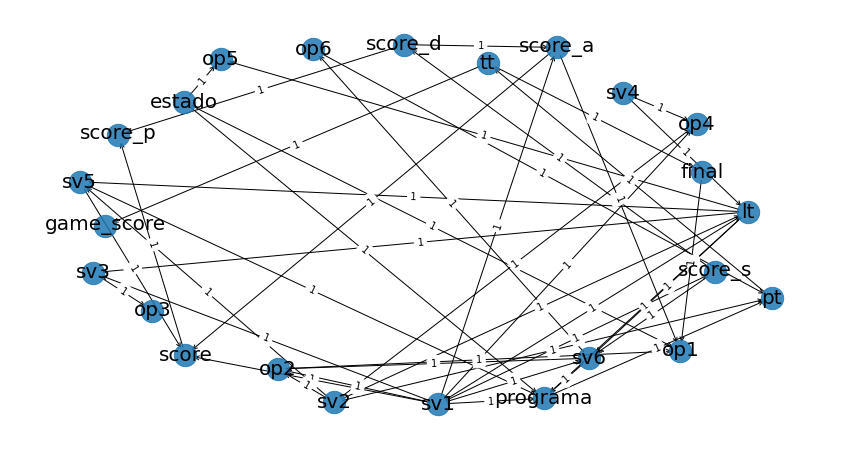

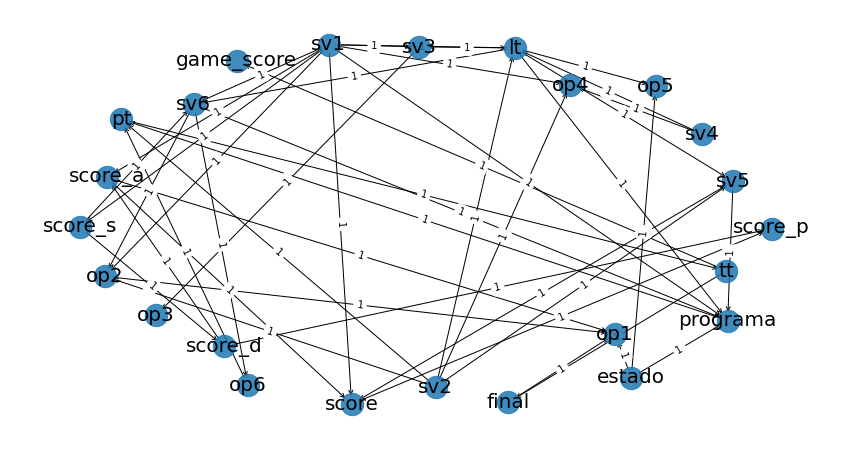

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [21:18, ?it/s]
Finding Elimination Order: : : 0it [03:58, ?it/s]
Finding Elimination Order: : : 0it [03:37, ?it/s]

Finding Elimination Order: : : 0it [03:57, ?it/s]
Finding Elimination Order: : : 0it [04:07, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [04:27, ?it/s]
Finding Elimination Order: : : 0it [04:37, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [05:26, ?it/s]


Finding Elimination Order: : : 0it [06:06, ?it/s]
Finding Elimination Order: : : 0it [06:16, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [06:36, ?it/s]
Finding Elimination Order: : : 0it [06:46, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [07:35, ?it/s]
Finding Elimination Order: : : 0it [07:25, ?it/s]



Finding Elimination Order: : : 0it [07:45, ?it/s]
Finding Elimination Order: : : 0it [07:55, ?it/s]
0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [08:15, ?it/s]
Finding Elimination Order:

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3041 |
+-----------+---------------+
| estado(1) |        0.6959 |
+-----------+---------------+
FILA N°: 662 -> P("Estado" | [{"lt":0.0, "game_score":2.0, "op1":0, "op5":1, "op6":0, "sv1":1, "sv5":1, "score":8, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.1027 |
+-----------+---------------+
| estado(1) |        0.8973 |
+-----------+---------------+
FILA N°: 663 -> P("Estado" | [{"lt":0.32603034165156797, "game_score":0.0, "op1":1, "op5":0, "op6":0, "sv1":1, "sv5":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |  


Finding Elimination Order: : : 0it [15:22, ?it/s]
Finding Elimination Order: : : 0it [15:12, ?it/s]
Finding Elimination Order: : : 0it [15:22, ?it/s]
Finding Elimination Order: : : 0it [15:32, ?it/s]
Finding Elimination Order: : : 0it [15:42, ?it/s]
Finding Elimination Order: : : 0it [15:52, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [16:41, ?it/s]
Finding Elimination Order: : : 0it [16:51, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [17:41, ?it/s]
Finding Elimination Order: : : 0it [17:51, ?it/s]







0it [00:00, ?it/s]






Finding Elimination Order: : : 0it [19:01, ?it/s]
Finding Elimination Order: : : 0it [19:11, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [20:00, ?it/s]
Finding Elimination Order: : : 0it [20:01, ?it/s]
Finding Elimination Order: : : 0it [17:50, ?it/s]

Finding Elimination Order: : : 0it [16:00, ?it/s]
Finding Elimination Order: : : 0it [13:30, ?it/s]
0it [00:20, ?it/s]
Finding Elimin

FILA N°: 4 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5037 |
+-----------+---------------+
| estado(1) |        0.4963 |
+-----------+---------------+
FILA N°: 7 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":2, "score_p":2, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4859 |
+-----------+---------------+
| estado(1) |       


Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [04:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5195 |
+-----------+---------------+
| estado(1) |        0.4805 |
+-----------+---------------+
FILA N°: 21 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.2411 |
+-----------+---------------+
| estado(1) |        0.7589 |
+-----------+---------------+
FILA N°: 23 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":3, "score_d":0, "score_s":1, "programa":4, "final


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]




+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3854 |
+-----------+---------------+
| estado(1) |        0.6146 |
+-----------+---------------+
FILA N°: 31 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]





+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3854 |
+-----------+---------------+
| estado(1) |        0.6146 |
+-----------+---------------+
FILA N°: 38 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3757 |
+-----------+---------------+
| estado(1) |        0.6243 |
+-----------+---------------+
FILA N°: 48 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..



0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4287 |
+-----------+---------------+
| estado(1) |        0.5713 |
+-----------+---------------+
FILA N°: 59 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":9, "score_a":5, "score_p":4, "score_d":4, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6525 |
+-----------+---------------+
| estado(1) |        0.3475 |
+-----------+---------------+
FILA N°: 63 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7348 |
+-----------+---------------+
| estado(1) |        0.2652 |
+-----------+---------------+
FILA N°: 67 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":3, "programa":5, "final



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]






+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7294 |
+-----------+---------------+
| estado(1) |        0.2706 |
+-----------+---------------+
FILA N°: 69 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":2, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]
0it [00:20, ?it/s]



+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 77 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":3, "score_a":2, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6374 |
+-----------+---------------+
| estado(1) |        0.3626 |
+-----------+---------------+
FILA N°: 84 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6319 |
+-----------+---------------+
| estado(1) |        0.3681 |
+-----------+---------------+
FILA N°: 92 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3587 |
+-----------+---------------+
| estado(1) |        0.6413 |
+-----------+---------------+
FILA N°: 113 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":2, "score_p":3, "score_d":1, "score_s":1, "programa":5, "fina



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7346 |
+-----------+---------------+
| estado(1) |        0.2654 |
+-----------+---------------+
FILA N°: 120 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":4, "score_d":1, "score_s":1, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4597 |
+-----------+---------------+
| estado(1) |        0.5403 |
+-----------+---------------+
FILA N°: 121 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5425 |
+-----------+---------------+
| estado(1) |        0.4575 |
+-----------+---------------+
FILA N°: 123 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":9, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4603 |
+-----------+---------------+
| estado(1) |        0.5397 |
+-----------+---------------+
FILA N°: 127 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5224 |
+-----------+---------------+
| estado(1) |        0.4776 |
+-----------+---------------+
FILA N°: 130 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:10, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7514 |
+-----------+---------------+
| estado(1) |        0.2486 |
+-----------+---------------+
FILA N°: 131 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":3, "score_s":3, "programa":3, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7076 |
+-----------+---------------+
| estado(1) |        0.2924 |
+-----------+---------------+
FILA N°: 133 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fin



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [06:33, ?it/s]
Finding Elimination Order: : : 0it [06:13, ?it/s]
Finding Elimination Order: : : 0it [05:02, ?it/s]
0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [03:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6306 |
+-----------+---------------+
| estado(1) |        0.3694 |
+-----------+---------------+
FILA N°: 136 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":4, "score_d":3, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6282 |
+-----------+---------------+
| estado(1) |        0.3718 |
+-----------+---------------+
FILA N°: 139 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4597 |
+-----------+---------------+
| estado(1) |        0.5403 |
+-----------+---------------+
FILA N°: 141 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6549 |
+-----------+---------------+
| estado(1) |        0.3451 |
+-----------+---------------+
FILA N°: 142 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7299 |
+-----------+---------------+
| estado(1) |        0.2701 |
+-----------+---------------+
FILA N°: 147 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":5, "score_p":1, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]



0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7036 |
+-----------+---------------+
| estado(1) |        0.2964 |
+-----------+---------------+
FILA N°: 151 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6911 |
+-----------+---------------+
| estado(1) |        0.3089 |
+-----------+---------------+
FILA N°: 157 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5115 |
+-----------+---------------+
| estado(1) |        0.4885 |
+-----------+---------------+
FILA N°: 160 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6705 |
+-----------+---------------+
| estado(1) |        0.3295 |
+-----------+---------------+
FILA N°: 164 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4158 |
+-----------+---------------+
| estado(1) |        0.5842 |
+-----------+---------------+
FILA N°: 168 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":2, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5683 |
+-----------+---------------+
| estado(1) |        0.4317 |
+-----------+---------------+






0it [00:00, ?it/s]



Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [01:00, ?it/s]
0it [00:00, ?it/s]


FILA N°: 175 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":4, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7299 |
+-----------+---------------+
| estado(1) |        0.2701 |
+-----------+---------------+
FILA N°: 181 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5683 |
+-----------+---------------+
| estado(1) |        0.4317 |
+-----------+---------------+
FILA N°: 188 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":2, "score_d":4, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6282 |
+-----------+---------------+
| estado(1) |        0.3718 |
+-----------+---------------+
FILA N°: 192 -> P("Estado" | [{"lt":0.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":3, "final":4.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6579 |
+-----------+---------------+
| estado(1) |        0.3421 |
+-----------+---------------+
FILA N°: 196 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6875 |
+-----------+---------------+
| estado(1) |        0.3125 |
+-----------+---------------+
FILA N°: 205 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6574 |
+-----------+---------------+
| estado(1) |        0.3426 |
+-----------+---------------+
FILA N°: 211 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":2, "score_s":0, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..




0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]




0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6283 |
+-----------+---------------+
| estado(1) |        0.3717 |
+-----------+---------------+
FILA N°: 213 -> P("Estado" | [{"lt":2.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":2, "score_d":2, "score_s":1, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..







0it [00:00, ?it/s]




Finding Elimination Order: : : 0it [00:40, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6230 |
+-----------+---------------+
| estado(1) |        0.3770 |
+-----------+---------------+
FILA N°: 219 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":0, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":4, "score_a":1, "score_p":3, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]




+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6183 |
+-----------+---------------+
| estado(1) |        0.3817 |
+-----------+---------------+
FILA N°: 220 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":4, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5169 |
+-----------+---------------+
| estado(1) |        0.4831 |
+-----------+---------------+
FILA N°: 227 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":3, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7299 |
+-----------+---------------+
| estado(1) |        0.2701 |
+-----------+---------------+
FILA N°: 229 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":3, "score_a":1, "score_p":1, "score_d":2, "score_s":1, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4481 |
+-----------+---------------+
| estado(1) |        0.5519 |
+-----------+---------------+
FILA N°: 238 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":3, "score_p":1, "score_d":1, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [01:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5909 |
+-----------+---------------+
| estado(1) |        0.4091 |
+-----------+---------------+
FILA N°: 252 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":0, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7298 |
+-----------+---------------+
| estado(1) |        0.2702 |
+-----------+---------------+
FILA N°: 253 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]








+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5431 |
+-----------+---------------+
| estado(1) |        0.4569 |
+-----------+---------------+
FILA N°: 255 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":3, "score_d":2, "score_s":2, "programa":5, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6324 |
+-----------+---------------+
| estado(1) |        0.3676 |
+-----------+---------------+
FILA N°: 256 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":6, "score_a":4, "score_p":2, "score_d":2, "score_s":3, "programa":5, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]







+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+
FILA N°: 259 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":5, "score_a":3, "score_p":4, "score_d":0, "score_s":1, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5961 |
+-----------+---------------+
| estado(1) |        0.4039 |
+-----------+---------------+
FILA N°: 270 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":3, "score_s":4, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..









Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6989 |
+-----------+---------------+
| estado(1) |        0.3011 |
+-----------+---------------+
FILA N°: 274 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5850 |
+-----------+---------------+
| estado(1) |        0.4150 |
+-----------+---------------+
FILA N°: 276 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":7, "score_a":5, "score_p":2, "score_d":3, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7191 |
+-----------+---------------+
| estado(1) |        0.2809 |
+-----------+---------------+
FILA N°: 279 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "fi







0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]





Finding Elimination Order: : : 0it [00:00, ?it/s]









+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6220 |
+-----------+---------------+
| estado(1) |        0.3780 |
+-----------+---------------+
FILA N°: 282 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5525 |
+-----------+---------------+
| estado(1) |        0.4475 |
+-----------+---------------+
FILA N°: 286 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":4, "score_d":2, "score_s":3, "programa":4, "fin

0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4603 |
+-----------+---------------+
| estado(1) |        0.5397 |
+-----------+---------------+
FILA N°: 289 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":2, "score_d":0, "score_s":0, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7346 |
+-----------+---------------+
| estado(1) |        0.2654 |
+-----------+---------------+
FILA N°: 291 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":3, "score_d":3, "score_s":3, "programa":3, "fin

Finding Elimination Order: : : 0it [00:20, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6519 |
+-----------+---------------+
| estado(1) |        0.3481 |
+-----------+---------------+
FILA N°: 293 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":1, "op3":0, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":8, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7346 |
+-----------+---------------+
| estado(1) |        0.2654 |
+-----------+---------------+
FILA N°: 297 -> P("Estado" | [{"lt":1.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":2, "score_d":3, "score_s":3, "programa":3, "fi

Finding Elimination Order: : : 0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4906 |
+-----------+---------------+
| estado(1) |        0.5094 |
+-----------+---------------+
FILA N°: 321 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":6, "score_p":4, "score_d":2, "score_s":2, "programa":4, "final":2.0}]
[bnlearn] >Variable Elimination..








Finding Elimination Order: : : 0it [00:30, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6341 |
+-----------+---------------+
| estado(1) |        0.3659 |
+-----------+---------------+
FILA N°: 322 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":5, "score_p":3, "score_d":3, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.4064 |
+-----------+---------------+
| estado(1) |        0.5936 |
+-----------+---------------+
FILA N°: 325 -> P("Estado" | [{"lt":2.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":0, "score":5, "score_a":1, "score_p":3, "score_d":1, "score_s":2, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6585 |
+-----------+---------------+
| estado(1) |        0.3415 |
+-----------+---------------+
FILA N°: 328 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":3, "score_s":3, "programa":5, "fin


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7403 |
+-----------+---------------+
| estado(1) |        0.2597 |
+-----------+---------------+
FILA N°: 330 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":2, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6627 |
+-----------+---------------+
| estado(1) |        0.3373 |
+-----------+---------------+
FILA N°: 335 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":6, "score_a":2, "score_p":4, "score_d":1, "score_s":2, "programa":5, "fin










0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
Finding Elimination Order: : : 0it [00:30, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7171 |
+-----------+---------------+
| estado(1) |        0.2829 |
+-----------+---------------+
FILA N°: 341 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":3, "score_p":4, "score_d":2, "score_s":3, "programa":4, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5412 |
+-----------+---------------+
| estado(1) |        0.4588 |
+-----------+---------------+
FILA N°: 354 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..










0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6057 |
+-----------+---------------+
| estado(1) |        0.3943 |
+-----------+---------------+
FILA N°: 359 -> P("Estado" | [{"lt":1.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":2, "programa":2, "final":2.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+
FILA N°: 360 -> P("Estado" | [{"lt":0.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":2, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.3548 |
+-----------+---------------+
| estado(1) |        0.6452 |
+-----------+---------------+
FILA N°: 361 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":0, "op2":0, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":0, "score":8, "score_a":5, "score_p":5, "score_d":1, "score_s":1, "programa":4, "fi









0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]








0it [00:00, ?it/s]









0it [00:00, ?it/s]








Finding Elimination Order: : : 0it [00:30, ?it/s]
Finding Elimination Order: : : 0it [00:50, ?it/s]
0it [00:10, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6965 |
+-----------+---------------+
| estado(1) |        0.3035 |
+-----------+---------------+
FILA N°: 367 -> P("Estado" | [{"lt":1.0, "tt":3.0, "pt":3.0, "game_score":3.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":2, "score_a":1, "score_p":1, "score_d":0, "score_s":1, "programa":3, "final":3.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]

FILA N°: 369 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":4, "score_p":5, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7514 |
+-----------+---------------+
| estado(1) |        0.2486 |
+-----------+---------------+
FILA N°: 375 -> P("Estado" | [{"lt":2.0, "tt":4.0, "pt":4.0, "game_score":4.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":0, "sv3":0, "sv4":1, "sv5":0, "sv6":0, "score":5, "score_a":4, "score_p":2, "score_d":1, "score_s":2, "programa":4, "final":4.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6585 |
+-----------+---------------+
| estado(1) |        0.3415 |
+-----------+---------------+
FILA N°: 379 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":5, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6640 |
+-----------+---------------+
| estado(1) |        0.3360 |
+-----------+---------------+
FILA N°: 387 -> P("Estado" | [{"lt":0.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":3, "fi


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]










+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6378 |
+-----------+---------------+
| estado(1) |        0.3622 |
+-----------+---------------+
FILA N°: 388 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":8, "score_a":6, "score_p":2, "score_d":4, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]









Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6628 |
+-----------+---------------+
| estado(1) |        0.3372 |
+-----------+---------------+
FILA N°: 396 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":0, "score":4, "score_a":2, "score_p":2, "score_d":1, "score_s":2, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7060 |
+-----------+---------------+
| estado(1) |        0.2940 |
+-----------+---------------+
FILA N°: 400 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7036 |
+-----------+---------------+
| estado(1) |        0.2964 |
+-----------+---------------+










0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

FILA N°: 408 -> P("Estado" | [{"lt":2.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.5958 |
+-----------+---------------+
| estado(1) |        0.4042 |
+-----------+---------------+
FILA N°: 422 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":0, "sv6":1, "score":4, "score_a":4, "score_p":1, "score_d":1, "score_s":1, "programa":4, "final":1.0}]
[bnlearn] >Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]










0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6554 |
+-----------+---------------+
| estado(1) |        0.3446 |
+-----------+---------------+
FILA N°: 428 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":0, "sv6":1, "score":5, "score_a":2, "score_p":3, "score_d":1, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6076 |
+-----------+---------------+
| estado(1) |        0.3924 |
+-----------+---------------+
FILA N°: 434 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":1, "op4":0, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":1, "programa":5, "fin













0it [00:00, ?it/s]










Finding Elimination Order: : : 0it [01:00, ?it/s]
Finding Elimination Order: : : 0it [01:20, ?it/s]
0it [00:10, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7086 |
+-----------+---------------+
| estado(1) |        0.2914 |
+-----------+---------------+
FILA N°: 436 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":5, "score_p":3, "score_d":2, "score_s":3, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]










+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7389 |
+-----------+---------------+
| estado(1) |        0.2611 |
+-----------+---------------+
FILA N°: 437 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":0, "op3":0, "op4":1, "op5":0, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":11, "score_a":7, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6173 |
+-----------+---------------+
| estado(1) |        0.3827 |
+-----------+---------------+
FILA N°: 446 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":4, "score_d":2, "score_s":1, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]











0it [00:00, ?it/s]


+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7727 |
+-----------+---------------+
| estado(1) |        0.2273 |
+-----------+---------------+
FILA N°: 448 -> P("Estado" | [{"lt":0.0, "tt":0.0, "pt":0.0, "game_score":0.0, "op1":0, "op2":1, "op3":0, "op4":0, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":0, "sv4":0, "sv5":1, "sv6":1, "score":10, "score_a":6, "score_p":5, "score_d":3, "score_s":3, "programa":3, "final":0.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6628 |
+-----------+---------------+
| estado(1) |        0.3372 |
+-----------+---------------+














0it [00:00, ?it/s]











Finding Elimination Order: : : 0it [00:20, ?it/s]
Finding Elimination Order: : : 0it [00:40, ?it/s]


FILA N°: 454 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":1, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":5, "score_a":4, "score_p":1, "score_d":2, "score_s":2, "programa":5, "final":1.0}]
[bnlearn] >Variable Elimination..


0it [00:10, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]

+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7727 |
+-----------+---------------+
| estado(1) |        0.2273 |
+-----------+---------------+
FILA N°: 456 -> P("Estado" | [{"lt":0.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":1, "op2":1, "op3":1, "op4":1, "op5":1, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":1, "sv5":1, "sv6":1, "score":7, "score_a":4, "score_p":3, "score_d":2, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7025 |
+-----------+---------------+
| estado(1) |        0.2975 |
+-----------+---------------+











0it [00:00, ?it/s]







Finding Elimination Order: : : 0it [00:00, ?it/s]












0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]







0it [00:00, ?it/s]

FILA N°: 465 -> P("Estado" | [{"lt":1.0, "tt":1.0, "pt":1.0, "game_score":1.0, "op1":0, "op2":0, "op3":1, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":1, "sv4":0, "sv5":1, "sv6":1, "score":9, "score_a":6, "score_p":3, "score_d":4, "score_s":3, "programa":3, "final":1.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.6268 |
+-----------+---------------+
| estado(1) |        0.3732 |
+-----------+---------------+
FILA N°: 466 -> P("Estado" | [{"lt":2.0, "tt":2.0, "pt":2.0, "game_score":2.0, "op1":1, "op2":1, "op3":0, "op4":0, "op5":0, "op6":0, "sv1":1, "sv2":1, "sv3":0, "sv4":1, "sv5":1, "sv6":0, "score":10, "score_a":7, "score_p":4, "score_d":4, "score_s":3, "programa":5, "final":2.0}]
[bnlearn] >Variable Elimination..
+-----------+---------------+
| estado    |   phi(estado) |
+===========+===============+
| estado(0) |        0.7060 |
+-----------+---------------+
| estado(1) |  

FIN DE SECCION DE PRUEBAS, FOLD:  5
Elapsed time: 8089.2074372768 seconds.


In [8]:
#indica cual va a ser el muestreo estratificado usando la clase "estado"
#cada fold mantiene la proporcion orignal de clases
#n_splits = el numero de experimentos a realizar
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
target = df.loc[:, 'estado'] #todas las filas de la columna "estado"

fold_no = 1
for train_index, test_index in skf.split(df, target):
    #Start counting.
    start_time = time()    
    #---------------------------------------------------------------------------
    #INICIO: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como entrenamiento
    train = df.loc[train_index,:] #todas las columnas de la fila "train_index"
    
    #Balanceando la clase 
    oversample = SMOTE()
    X_trainOversample, y_trainOversample = oversample.fit_resample(train, train.loc[:, 'estado'])
    
    #Aplicando selección de variables univariate
    X_univariate = SelectKBest(f_classif, k=15).fit(X_trainOversample, y_trainOversample)   
    selectK_mask = X_univariate.get_support()
    X_reduced = X_trainOversample[X_trainOversample.columns[selectK_mask]]

    #aprendiendo la estructura y los parametros de la porción de datos entrenados "sobre muestrados"
    modelo = bl.Aprendizaje(X_reduced, fold_no, "TRAIN")
    
    #transformando el modelo aprendido en un dataset que pueda ser inferido
    newModel = bl.modelToDataFrame(modelo, X_reduced)

    #realizando la inferencia de los datos de entrenamiento
    probTrain = bl.probabilidadConjunta(modelo, newModel, fold_no, "TRAIN")
            
    i = 0 #columna que queremos obtener
    lista_train = [fila[i] for fila in probTrain]

    #Metricas finales TRAIN
    bl.getMetrics(lista_train, y_trainOversample, y_trainOversample, 'TRAIN', fold_no)
    
    print("FIN DE SECCION DE ENTRENAMIENTO, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE ENTRENAMIENTO
    #---------------------------------------------------------------------------

    #---------------------------------------------------------------------------
    #INICIO: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------
    print("INICIO DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    
    #entrega la porción de datos que serán usados como pruebas
    test = df.loc[test_index,:] #todas las columnas de la fila "test_index"
        
    #aprendiendo la estructura y los parametros de la porción de datos de pruebas
    modelo = bl.Aprendizaje(test, fold_no, "TEST")

    #transformando el modelo aprendido en un dataset que pueda ser inferido
    newModel = bl.modelToDataFrame(modelo, test)
    
    #realizando la inferencia de los datos de prueba
    probTest = bl.probabilidadConjunta(modelo, newModel, fold_no, "TEST")
    
    ##i = 0 #columna que queremos obtener
    lista_test = [fila[i] for fila in probTest]
    
    #Metricas finales TEST
    bl.getMetrics(lista_test, test.loc[:, 'estado'], test['estado'], 'TEST', fold_no)

    print("FIN DE SECCION DE PRUEBAS, FOLD: ", str(fold_no))
    #---------------------------------------------------------------------------
    #FIN: SECCION DE PRUEBAS
    #---------------------------------------------------------------------------
    
    # Calculate the elapsed time.
    elapsed_time = time() - start_time
    print("Elapsed time: %0.10f seconds." % elapsed_time)
    
    #Cambiando de fold
    fold_no += 1